In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ta
import pandas_ta as pta
from finta import TA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
high = pd.read_csv('data_updated/high.csv')
low = pd.read_csv('data_updated/low.csv')
close= pd.read_csv('data_updated/close.csv')
open = pd.read_csv('data_updated/open.csv')
volume = pd.read_csv('data_updated/volume.csv')
adj_close = pd.read_csv('data_updated/adj_close.csv')
high

Date   ADA-USD   ATOM-USD   AVAX-USD    AXS-USD       BTC-USD  \
0     2017-05-09       NaN        NaN        NaN        NaN   1833.489990   
1     2017-05-10       NaN        NaN        NaN        NaN   1788.439941   
2     2017-05-11       NaN        NaN        NaN        NaN   1873.930054   
3     2017-05-12       NaN        NaN        NaN        NaN   1856.150024   
4     2017-05-13       NaN        NaN        NaN        NaN   1812.989990   
...          ...       ...        ...        ...        ...           ...   
1821  2022-05-04  0.897661  19.987272  67.282066  33.633900  39902.949219   
1822  2022-05-05  0.904111  20.270138  69.349014  34.753601  39789.281250   
1823  2022-05-06  0.798315  17.950396  59.306812  29.047382  36624.359375   
1824  2022-05-07  0.785116  17.680393  57.439198  29.423031  36129.925781   
1825  2022-05-08  0.763704  16.511841  55.253357  31.376856  35477.484375   

          ETH-USD   LINK-USD  LUNA1-USD  MATIC-USD    SOL-USD  
0             NaN        NaN        NaN        NaN        NaN  
1             NaN        NaN        NaN        NaN        NaN  
2             NaN        NaN        NaN        NaN        NaN  
3             NaN        NaN        NaN        NaN        NaN  
4             NaN        NaN        NaN        NaN        NaN  
...           ...        ...        ...        ...        ...  
1821  2956.686768  12.146651  87.956352   1.171143  92.937195  
1822  2948.960693  12.239243  87.777588   1.185085  95.032822  
1823  2754.837646  10.992021  82.936325   1.075262  84.646935  
1824  2696.652832  10.817171  77.494347   1.064007  82.180786  
1825  2637.854004  10.344585  68.271729   1.026015  79.194817  

[1826 rows x 11 columns]

In [3]:
ada = open[['Date']]
ada['Open'] = open[['ADA-USD']]
ada['High'] = high[['ADA-USD']]
ada['Low'] = low[['ADA-USD']]
ada['Close'] = close[['ADA-USD']]
ada['Adj Close'] = adj_close[['ADA-USD']]
ada['Volume'] =volume[['ADA-USD']]
ada=ada.dropna()
ada

Date      Open      High       Low     Close  Adj Close  \
184   2017-11-09  0.025160  0.035060  0.025006  0.032053   0.032053   
185   2017-11-10  0.032219  0.033348  0.026451  0.027119   0.027119   
186   2017-11-11  0.026891  0.029659  0.025684  0.027437   0.027437   
187   2017-11-12  0.027480  0.027952  0.022591  0.023977   0.023977   
188   2017-11-13  0.024364  0.026300  0.023495  0.025808   0.025808   
...          ...       ...       ...       ...       ...        ...   
1821  2022-05-04  0.771107  0.897661  0.769638  0.896942   0.896942   
1822  2022-05-05  0.897061  0.904111  0.778141  0.791152   0.791152   
1823  2022-05-06  0.791065  0.798315  0.765742  0.783359   0.783359   
1824  2022-05-07  0.783352  0.785116  0.750657  0.761882   0.761882   
1825  2022-05-08  0.761689  0.763704  0.731738  0.744362   0.744362   

            Volume  
184   1.871620e+07  
185   6.766780e+06  
186   5.532220e+06  
187   7.280250e+06  
188   4.419440e+06  
...            ...  
1821  1.516023e+09  
1822  1.802129e+09  
1823  1.312284e+09  
1824  8.015589e+08  
1825  1.092425e+09  

[1642 rows x 7 columns]

In [4]:
atom = open[['Date']]
atom['Open'] = open[['ATOM-USD']]
atom['High'] = high[['ATOM-USD']]
atom['Low'] = low[['ATOM-USD']]
atom['Close'] = close[['ATOM-USD']]
atom['Adj Close'] = adj_close[['ATOM-USD']]
atom['Volume'] =volume[['ATOM-USD']]
atom = atom.dropna()
atom

Date       Open       High        Low      Close  Adj Close  \
674   2019-03-14   6.439715   6.639943   6.353963   6.526642   6.526642   
675   2019-03-15   6.633174   7.715249   6.432468   7.504351   7.504351   
676   2019-03-16   7.507990   8.305615   6.694531   7.383882   7.383882   
677   2019-03-17   7.357443   7.357443   4.727895   4.776164   4.776164   
678   2019-03-18   4.828242   5.229982   4.828242   5.110341   5.110341   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  17.593870  19.987272  17.563868  19.876862  19.876862   
1822  2022-05-05  19.871162  20.270138  17.410774  17.853285  17.853285   
1823  2022-05-06  17.853285  17.950396  17.255348  17.674110  17.674110   
1824  2022-05-07  17.676107  17.680393  16.186054  16.475998  16.475998   
1825  2022-05-08  16.511841  16.511841  15.677500  15.785578  15.785578   

           Volume  
674     7318172.0  
675     6057301.0  
676     3477393.0  
677     2653565.0  
678     2567201.0  
...           ...  
1821  549565214.0  
1822  614325972.0  
1823  447936108.0  
1824  455478758.0  
1825  412976512.0  

[1152 rows x 7 columns]

In [5]:
avax = open[['Date']]
avax['Open'] = open[['AVAX-USD']]
avax['High'] = high[['AVAX-USD']]
avax['Low'] = low[['AVAX-USD']]
avax['Close'] = close[['AVAX-USD']]
avax['Adj Close'] = adj_close[['AVAX-USD']]
avax['Volume'] =volume[['AVAX-USD']]
avax = avax.dropna()
avax

Date       Open       High        Low      Close  Adj Close  \
1161  2020-07-13   4.613968   4.915115   4.481499   4.896294   4.896294   
1162  2020-07-14   4.909865   5.229564   4.762068   4.986754   4.986754   
1232  2020-09-22   4.986754  11.463443   4.125380   5.234632   5.234632   
1233  2020-09-23   5.321654   5.329310   3.982604   4.118469   4.118469   
1234  2020-09-24   3.817925   4.751878   3.539887   4.566561   4.566561   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  59.658340  67.282066  59.498161  67.086105  67.086105   
1822  2022-05-05  67.076157  69.349014  57.024452  59.127441  59.127441   
1823  2022-05-06  59.121109  59.306812  55.412495  57.034325  57.034325   
1824  2022-05-07  57.035454  57.439198  53.625706  55.156693  55.156693   
1825  2022-05-08  55.153175  55.253357  50.975513  51.730221  51.730221   

            Volume  
1161  2.834000e+04  
1162  3.957000e+03  
1232  2.880988e+08  
1233  1.730912e+08  
1234  9.611096e+07  
...            ...  
1821  8.757237e+08  
1822  1.259826e+09  
1823  8.872802e+08  
1824  5.551183e+08  
1825  8.406972e+08  

[596 rows x 7 columns]

In [6]:
axs = open[['Date']]
axs['Open'] = open[['AXS-USD']]
axs['High'] = high[['AXS-USD']]
axs['Low'] = low[['AXS-USD']]
axs['Close'] = close[['AXS-USD']]
axs['Adj Close'] = adj_close[['AXS-USD']]
axs['Volume'] =volume[['AXS-USD']]
axs = axs.dropna()
axs

Date       Open       High        Low      Close  Adj Close  \
1275  2020-11-04   0.179801   0.191121   0.141809   0.145949   0.145949   
1276  2020-11-05   0.145951   0.150565   0.126469   0.135104   0.135104   
1277  2020-11-06   0.135104   0.149547   0.123431   0.143164   0.143164   
1278  2020-11-07   0.143189   0.168470   0.134455   0.141056   0.141056   
1279  2020-11-08   0.141021   0.239455   0.139401   0.198251   0.198251   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  29.114498  33.633900  28.171825  33.363853  33.363853   
1822  2022-05-05  33.362663  34.753601  28.156942  28.984409  28.984409   
1823  2022-05-06  28.982380  29.047382  27.466135  28.462557  28.462557   
1824  2022-05-07  28.464800  29.423031  27.502634  28.750196  28.750196   
1825  2022-05-08  28.747194  31.376856  27.879026  30.405958  30.405958   

           Volume  
1275   16344570.0  
1276    4948417.0  
1277    3148629.0  
1278    1987416.0  
1279    9484360.0  
...           ...  
1821  379974515.0  
1822  488287918.0  
1823  279097266.0  
1824  233434007.0  
1825  509740576.0  

[551 rows x 7 columns]

In [7]:
btc = open[['Date']]
btc['Open'] = open[['BTC-USD']]
btc['High'] = high[['BTC-USD']]
btc['Low'] = low[['BTC-USD']]
btc['Close'] = close[['BTC-USD']]
btc['Adj Close'] = adj_close[['BTC-USD']]
btc['Volume'] =volume[['BTC-USD']]
btc=btc.dropna()
btc

Date          Open          High           Low         Close  \
0     2017-05-09   1723.890015   1833.489990   1716.300049   1755.359985   
1     2017-05-10   1756.520020   1788.439941   1719.099976   1787.130005   
2     2017-05-11   1780.369995   1873.930054   1755.349976   1848.569946   
3     2017-05-12   1845.760010   1856.150024   1694.010010   1724.239990   
4     2017-05-13   1723.119995   1812.989990   1651.079956   1804.910034   
...          ...           ...           ...           ...           ...   
1821  2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
1822  2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
1823  2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
1824  2022-05-07  36042.503906  36129.925781  34940.824219  35501.953125   
1825  2022-05-08  35473.250000  35477.484375  33913.957031  34226.796875   

         Adj Close       Volume  
0      1755.359985   1167920000  
1      1787.130005    915723008  
2      1848.569946    799489984  
3      1724.239990    740984000  
4      1804.910034    579635008  
...            ...          ...  
1821  39698.371094  36754404490  
1822  36575.140625  43106256317  
1823  36040.921875  37795577489  
1824  35501.953125  24375896406  
1825  34226.796875  36945944576  

[1826 rows x 7 columns]

In [8]:
eth = open[['Date']]
eth['Open'] = open[['ETH-USD']]
eth['High'] = high[['ETH-USD']]
eth['Low'] = low[['ETH-USD']]
eth['Close'] = close[['ETH-USD']]
eth['Adj Close'] = adj_close[['ETH-USD']]
eth['Volume'] =volume[['ETH-USD']]
eth=eth.dropna()
eth

Date         Open         High          Low        Close  \
184   2017-11-09   308.644989   329.451996   307.056000   320.884003   
185   2017-11-10   320.670990   324.717987   294.541992   299.252991   
186   2017-11-11   298.585999   319.453003   298.191986   314.681000   
187   2017-11-12   314.690002   319.153015   298.513000   307.907990   
188   2017-11-13   307.024994   328.415009   307.024994   316.716003   
...          ...          ...          ...          ...          ...   
1821  2022-05-04  2783.131104  2956.686768  2779.273682  2940.644775   
1822  2022-05-05  2940.226562  2948.960693  2704.916260  2749.213135   
1823  2022-05-06  2748.931641  2754.837646  2645.335205  2694.979736   
1824  2022-05-07  2694.991943  2696.652832  2599.523438  2636.093018   
1825  2022-05-08  2637.407227  2637.854004  2504.324707  2532.283691   

        Adj Close        Volume  
184    320.884003  8.932500e+08  
185    299.252991  8.859860e+08  
186    314.681000  8.423010e+08  
187    307.907990  1.613480e+09  
188    316.716003  1.041890e+09  
...           ...           ...  
1821  2940.644775  1.818675e+10  
1822  2749.213135  2.264293e+10  
1823  2694.979736  2.102760e+10  
1824  2636.093018  1.336928e+10  
1825  2532.283691  2.095508e+10  

[1642 rows x 7 columns]

In [9]:
link = open[['Date']]
link['Open'] = open[['LINK-USD']]
link['High'] = high[['LINK-USD']]
link['Low'] = low[['LINK-USD']]
link['Close'] = close[['LINK-USD']]
link['Adj Close'] = adj_close[['LINK-USD']]
link['Volume'] =volume[['LINK-USD']]
link=link.dropna()
link

Date       Open       High        Low      Close  Adj Close  \
184   2017-11-09   0.216713   0.248233   0.195411   0.223969   0.223969   
185   2017-11-10   0.224700   0.231280   0.180161   0.187602   0.187602   
186   2017-11-11   0.186398   0.197687   0.166026   0.179770   0.179770   
187   2017-11-12   0.179667   0.198376   0.145948   0.170898   0.170898   
188   2017-11-13   0.169117   0.205014   0.168743   0.183071   0.183071   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  11.121224  12.146651  11.113729  12.145610  12.145610   
1822  2022-05-05  12.153832  12.239243  10.738750  10.917400  10.917400   
1823  2022-05-06  10.916577  10.992021  10.499268  10.799844  10.799844   
1824  2022-05-07  10.799866  10.817171  10.100428  10.239905  10.239905   
1825  2022-05-08  10.254740  10.344585   9.925760  10.044308  10.044308   

           Volume  
184     3347920.0  
185     2125460.0  
186     2238980.0  
187     5455200.0  
188     2992650.0  
...           ...  
1821  501855323.0  
1822  560835165.0  
1823  507557055.0  
1824  354478668.0  
1825  430948928.0  

[1642 rows x 7 columns]

In [10]:
luna1 = open[['Date']]
luna1['Open'] = open[['LUNA1-USD']]
luna1['High'] = high[['LUNA1-USD']]
luna1['Low'] = low[['LUNA1-USD']]
luna1['Close'] = close[['LUNA1-USD']]
luna1['Adj Close'] = adj_close[['LUNA1-USD']]
luna1['Volume'] =volume[['LUNA1-USD']]
luna1=luna1.dropna()
luna1

Date       Open       High        Low      Close  Adj Close  \
808   2019-07-26   1.704222   1.833167   1.261695   1.327436   1.327436   
809   2019-07-27   1.327436   1.402898   1.221938   1.310566   1.310566   
810   2019-07-28   1.310566   1.368595   1.236858   1.272989   1.272989   
811   2019-07-29   1.262270   1.375941   1.175443   1.294661   1.294661   
812   2019-07-30   1.294435   1.374333   1.266484   1.294193   1.294193   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  82.584396  87.956352  82.267265  86.172264  86.172264   
1822  2022-05-05  86.159637  87.777588  79.330872  82.580406  82.580406   
1823  2022-05-06  82.551933  82.936325  77.432007  77.464806  77.464806   
1824  2022-05-07  77.465630  77.494347  63.838245  68.249123  68.249123   
1825  2022-05-08  68.271729  68.271729  59.578342  64.176682  64.176682   

            Volume  
808   1.208858e+07  
809   6.033446e+06  
810   1.643709e+06  
811   3.966802e+06  
812   1.820705e+06  
...            ...  
1821  1.941975e+09  
1822  2.276428e+09  
1823  2.178574e+09  
1824  3.054300e+09  
1825  5.255014e+09  

[1018 rows x 7 columns]

In [11]:
matic = open[['Date']]
matic['Open'] = open[['MATIC-USD']]
matic['High'] = high[['MATIC-USD']]
matic['Low'] = low[['MATIC-USD']]
matic['Close'] = close[['MATIC-USD']]
matic['Adj Close'] = adj_close[['MATIC-USD']]
matic['Volume'] =volume[['MATIC-USD']]
matic=matic.dropna()
matic

Date      Open      High       Low     Close  Adj Close  \
719   2019-04-28  0.004521  0.004545  0.004317  0.004421   0.004421   
720   2019-04-29  0.004418  0.004492  0.003471  0.003471   0.003471   
721   2019-04-30  0.003462  0.005078  0.003458  0.004478   0.004478   
722   2019-05-01  0.004440  0.004673  0.004071  0.004374   0.004374   
723   2019-05-02  0.004366  0.004700  0.004096  0.004198   0.004198   
...          ...       ...       ...       ...       ...        ...   
1821  2022-05-04  1.075928  1.171143  1.073876  1.171032   1.171032   
1822  2022-05-05  1.170986  1.185085  1.035494  1.064691   1.064691   
1823  2022-05-06  1.064479  1.075262  1.022339  1.044133   1.044133   
1824  2022-05-07  1.044149  1.064007  1.000354  1.021204   1.021204   
1825  2022-05-08  1.024481  1.026015  0.966227  0.979784   0.979784   

           Volume  
719     8408136.0  
720     8267044.0  
721    25072706.0  
722    10567352.0  
723     6714908.0  
...           ...  
1821  742971942.0  
1822  759187845.0  
1823  704670768.0  
1824  618880005.0  
1825  576489152.0  

[1107 rows x 7 columns]

In [12]:
sol = open[['Date']]
sol['Open'] = open[['SOL-USD']]
sol['High'] = high[['SOL-USD']]
sol['Low'] = low[['SOL-USD']]
sol['Close'] = close[['SOL-USD']]
sol['Adj Close'] = adj_close[['SOL-USD']]
sol['Volume'] =volume[['SOL-USD']]
sol=sol.dropna()
sol

Date       Open       High        Low      Close  Adj Close  \
1067  2020-04-10   0.832005   1.313487   0.694187   0.951054   0.951054   
1068  2020-04-11   0.951054   1.049073   0.765020   0.776819   0.776819   
1069  2020-04-12   0.785448   0.956670   0.762426   0.882507   0.882507   
1070  2020-04-13   0.890760   0.891603   0.773976   0.777832   0.777832   
1071  2020-04-14   0.777832   0.796472   0.628169   0.661925   0.661925   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  85.841728  92.937195  85.728065  92.770851  92.770851   
1822  2022-05-05  92.769791  95.032822  81.834869  84.596024  84.596024   
1823  2022-05-06  84.588493  84.646935  80.468613  81.764107  81.764107   
1824  2022-05-07  81.766670  82.180786  77.883232  78.983421  78.983421   
1825  2022-05-08  79.022034  79.194817  74.570267  75.536499  75.536499   

            Volume  
1067  8.736428e+07  
1068  4.386244e+07  
1069  3.873690e+07  
1070  1.821128e+07  
1071  1.674761e+07  
...            ...  
1821  1.428455e+09  
1822  1.805979e+09  
1823  1.585082e+09  
1824  1.139093e+09  
1825  1.447528e+09  

[759 rows x 7 columns]

In [13]:
from IPython.display import display
df_list = [ada,atom,avax,axs,btc,eth,link,luna1,matic,sol]
for i in df_list:
    display(i)

Date      Open      High       Low     Close  Adj Close  \
184   2017-11-09  0.025160  0.035060  0.025006  0.032053   0.032053   
185   2017-11-10  0.032219  0.033348  0.026451  0.027119   0.027119   
186   2017-11-11  0.026891  0.029659  0.025684  0.027437   0.027437   
187   2017-11-12  0.027480  0.027952  0.022591  0.023977   0.023977   
188   2017-11-13  0.024364  0.026300  0.023495  0.025808   0.025808   
...          ...       ...       ...       ...       ...        ...   
1821  2022-05-04  0.771107  0.897661  0.769638  0.896942   0.896942   
1822  2022-05-05  0.897061  0.904111  0.778141  0.791152   0.791152   
1823  2022-05-06  0.791065  0.798315  0.765742  0.783359   0.783359   
1824  2022-05-07  0.783352  0.785116  0.750657  0.761882   0.761882   
1825  2022-05-08  0.761689  0.763704  0.731738  0.744362   0.744362   

            Volume  
184   1.871620e+07  
185   6.766780e+06  
186   5.532220e+06  
187   7.280250e+06  
188   4.419440e+06  
...            ...  
1821  1.516023e+09  
1822  1.802129e+09  
1823  1.312284e+09  
1824  8.015589e+08  
1825  1.092425e+09  

[1642 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
674   2019-03-14   6.439715   6.639943   6.353963   6.526642   6.526642   
675   2019-03-15   6.633174   7.715249   6.432468   7.504351   7.504351   
676   2019-03-16   7.507990   8.305615   6.694531   7.383882   7.383882   
677   2019-03-17   7.357443   7.357443   4.727895   4.776164   4.776164   
678   2019-03-18   4.828242   5.229982   4.828242   5.110341   5.110341   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  17.593870  19.987272  17.563868  19.876862  19.876862   
1822  2022-05-05  19.871162  20.270138  17.410774  17.853285  17.853285   
1823  2022-05-06  17.853285  17.950396  17.255348  17.674110  17.674110   
1824  2022-05-07  17.676107  17.680393  16.186054  16.475998  16.475998   
1825  2022-05-08  16.511841  16.511841  15.677500  15.785578  15.785578   

           Volume  
674     7318172.0  
675     6057301.0  
676     3477393.0  
677     2653565.0  
678     2567201.0  
...           ...  
1821  549565214.0  
1822  614325972.0  
1823  447936108.0  
1824  455478758.0  
1825  412976512.0  

[1152 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
1161  2020-07-13   4.613968   4.915115   4.481499   4.896294   4.896294   
1162  2020-07-14   4.909865   5.229564   4.762068   4.986754   4.986754   
1232  2020-09-22   4.986754  11.463443   4.125380   5.234632   5.234632   
1233  2020-09-23   5.321654   5.329310   3.982604   4.118469   4.118469   
1234  2020-09-24   3.817925   4.751878   3.539887   4.566561   4.566561   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  59.658340  67.282066  59.498161  67.086105  67.086105   
1822  2022-05-05  67.076157  69.349014  57.024452  59.127441  59.127441   
1823  2022-05-06  59.121109  59.306812  55.412495  57.034325  57.034325   
1824  2022-05-07  57.035454  57.439198  53.625706  55.156693  55.156693   
1825  2022-05-08  55.153175  55.253357  50.975513  51.730221  51.730221   

            Volume  
1161  2.834000e+04  
1162  3.957000e+03  
1232  2.880988e+08  
1233  1.730912e+08  
1234  9.611096e+07  
...            ...  
1821  8.757237e+08  
1822  1.259826e+09  
1823  8.872802e+08  
1824  5.551183e+08  
1825  8.406972e+08  

[596 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
1275  2020-11-04   0.179801   0.191121   0.141809   0.145949   0.145949   
1276  2020-11-05   0.145951   0.150565   0.126469   0.135104   0.135104   
1277  2020-11-06   0.135104   0.149547   0.123431   0.143164   0.143164   
1278  2020-11-07   0.143189   0.168470   0.134455   0.141056   0.141056   
1279  2020-11-08   0.141021   0.239455   0.139401   0.198251   0.198251   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  29.114498  33.633900  28.171825  33.363853  33.363853   
1822  2022-05-05  33.362663  34.753601  28.156942  28.984409  28.984409   
1823  2022-05-06  28.982380  29.047382  27.466135  28.462557  28.462557   
1824  2022-05-07  28.464800  29.423031  27.502634  28.750196  28.750196   
1825  2022-05-08  28.747194  31.376856  27.879026  30.405958  30.405958   

           Volume  
1275   16344570.0  
1276    4948417.0  
1277    3148629.0  
1278    1987416.0  
1279    9484360.0  
...           ...  
1821  379974515.0  
1822  488287918.0  
1823  279097266.0  
1824  233434007.0  
1825  509740576.0  

[551 rows x 7 columns]

Date          Open          High           Low         Close  \
0     2017-05-09   1723.890015   1833.489990   1716.300049   1755.359985   
1     2017-05-10   1756.520020   1788.439941   1719.099976   1787.130005   
2     2017-05-11   1780.369995   1873.930054   1755.349976   1848.569946   
3     2017-05-12   1845.760010   1856.150024   1694.010010   1724.239990   
4     2017-05-13   1723.119995   1812.989990   1651.079956   1804.910034   
...          ...           ...           ...           ...           ...   
1821  2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
1822  2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
1823  2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
1824  2022-05-07  36042.503906  36129.925781  34940.824219  35501.953125   
1825  2022-05-08  35473.250000  35477.484375  33913.957031  34226.796875   

         Adj Close       Volume  
0      1755.359985   1167920000  
1      1787.130005    915723008  
2      1848.569946    799489984  
3      1724.239990    740984000  
4      1804.910034    579635008  
...            ...          ...  
1821  39698.371094  36754404490  
1822  36575.140625  43106256317  
1823  36040.921875  37795577489  
1824  35501.953125  24375896406  
1825  34226.796875  36945944576  

[1826 rows x 7 columns]

Date         Open         High          Low        Close  \
184   2017-11-09   308.644989   329.451996   307.056000   320.884003   
185   2017-11-10   320.670990   324.717987   294.541992   299.252991   
186   2017-11-11   298.585999   319.453003   298.191986   314.681000   
187   2017-11-12   314.690002   319.153015   298.513000   307.907990   
188   2017-11-13   307.024994   328.415009   307.024994   316.716003   
...          ...          ...          ...          ...          ...   
1821  2022-05-04  2783.131104  2956.686768  2779.273682  2940.644775   
1822  2022-05-05  2940.226562  2948.960693  2704.916260  2749.213135   
1823  2022-05-06  2748.931641  2754.837646  2645.335205  2694.979736   
1824  2022-05-07  2694.991943  2696.652832  2599.523438  2636.093018   
1825  2022-05-08  2637.407227  2637.854004  2504.324707  2532.283691   

        Adj Close        Volume  
184    320.884003  8.932500e+08  
185    299.252991  8.859860e+08  
186    314.681000  8.423010e+08  
187    307.907990  1.613480e+09  
188    316.716003  1.041890e+09  
...           ...           ...  
1821  2940.644775  1.818675e+10  
1822  2749.213135  2.264293e+10  
1823  2694.979736  2.102760e+10  
1824  2636.093018  1.336928e+10  
1825  2532.283691  2.095508e+10  

[1642 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
184   2017-11-09   0.216713   0.248233   0.195411   0.223969   0.223969   
185   2017-11-10   0.224700   0.231280   0.180161   0.187602   0.187602   
186   2017-11-11   0.186398   0.197687   0.166026   0.179770   0.179770   
187   2017-11-12   0.179667   0.198376   0.145948   0.170898   0.170898   
188   2017-11-13   0.169117   0.205014   0.168743   0.183071   0.183071   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  11.121224  12.146651  11.113729  12.145610  12.145610   
1822  2022-05-05  12.153832  12.239243  10.738750  10.917400  10.917400   
1823  2022-05-06  10.916577  10.992021  10.499268  10.799844  10.799844   
1824  2022-05-07  10.799866  10.817171  10.100428  10.239905  10.239905   
1825  2022-05-08  10.254740  10.344585   9.925760  10.044308  10.044308   

           Volume  
184     3347920.0  
185     2125460.0  
186     2238980.0  
187     5455200.0  
188     2992650.0  
...           ...  
1821  501855323.0  
1822  560835165.0  
1823  507557055.0  
1824  354478668.0  
1825  430948928.0  

[1642 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
808   2019-07-26   1.704222   1.833167   1.261695   1.327436   1.327436   
809   2019-07-27   1.327436   1.402898   1.221938   1.310566   1.310566   
810   2019-07-28   1.310566   1.368595   1.236858   1.272989   1.272989   
811   2019-07-29   1.262270   1.375941   1.175443   1.294661   1.294661   
812   2019-07-30   1.294435   1.374333   1.266484   1.294193   1.294193   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  82.584396  87.956352  82.267265  86.172264  86.172264   
1822  2022-05-05  86.159637  87.777588  79.330872  82.580406  82.580406   
1823  2022-05-06  82.551933  82.936325  77.432007  77.464806  77.464806   
1824  2022-05-07  77.465630  77.494347  63.838245  68.249123  68.249123   
1825  2022-05-08  68.271729  68.271729  59.578342  64.176682  64.176682   

            Volume  
808   1.208858e+07  
809   6.033446e+06  
810   1.643709e+06  
811   3.966802e+06  
812   1.820705e+06  
...            ...  
1821  1.941975e+09  
1822  2.276428e+09  
1823  2.178574e+09  
1824  3.054300e+09  
1825  5.255014e+09  

[1018 rows x 7 columns]

Date      Open      High       Low     Close  Adj Close  \
719   2019-04-28  0.004521  0.004545  0.004317  0.004421   0.004421   
720   2019-04-29  0.004418  0.004492  0.003471  0.003471   0.003471   
721   2019-04-30  0.003462  0.005078  0.003458  0.004478   0.004478   
722   2019-05-01  0.004440  0.004673  0.004071  0.004374   0.004374   
723   2019-05-02  0.004366  0.004700  0.004096  0.004198   0.004198   
...          ...       ...       ...       ...       ...        ...   
1821  2022-05-04  1.075928  1.171143  1.073876  1.171032   1.171032   
1822  2022-05-05  1.170986  1.185085  1.035494  1.064691   1.064691   
1823  2022-05-06  1.064479  1.075262  1.022339  1.044133   1.044133   
1824  2022-05-07  1.044149  1.064007  1.000354  1.021204   1.021204   
1825  2022-05-08  1.024481  1.026015  0.966227  0.979784   0.979784   

           Volume  
719     8408136.0  
720     8267044.0  
721    25072706.0  
722    10567352.0  
723     6714908.0  
...           ...  
1821  742971942.0  
1822  759187845.0  
1823  704670768.0  
1824  618880005.0  
1825  576489152.0  

[1107 rows x 7 columns]

Date       Open       High        Low      Close  Adj Close  \
1067  2020-04-10   0.832005   1.313487   0.694187   0.951054   0.951054   
1068  2020-04-11   0.951054   1.049073   0.765020   0.776819   0.776819   
1069  2020-04-12   0.785448   0.956670   0.762426   0.882507   0.882507   
1070  2020-04-13   0.890760   0.891603   0.773976   0.777832   0.777832   
1071  2020-04-14   0.777832   0.796472   0.628169   0.661925   0.661925   
...          ...        ...        ...        ...        ...        ...   
1821  2022-05-04  85.841728  92.937195  85.728065  92.770851  92.770851   
1822  2022-05-05  92.769791  95.032822  81.834869  84.596024  84.596024   
1823  2022-05-06  84.588493  84.646935  80.468613  81.764107  81.764107   
1824  2022-05-07  81.766670  82.180786  77.883232  78.983421  78.983421   
1825  2022-05-08  79.022034  79.194817  74.570267  75.536499  75.536499   

            Volume  
1067  8.736428e+07  
1068  4.386244e+07  
1069  3.873690e+07  
1070  1.821128e+07  
1071  1.674761e+07  
...            ...  
1821  1.428455e+09  
1822  1.805979e+09  
1823  1.585082e+09  
1824  1.139093e+09  
1825  1.447528e+09  

[759 rows x 7 columns]

# Autoregression (AR)

### ADA

In [14]:
ada_AR = ada.set_index("Date")
ada_AR

Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2017-11-09  0.025160  0.035060  0.025006  0.032053   0.032053  1.871620e+07
2017-11-10  0.032219  0.033348  0.026451  0.027119   0.027119  6.766780e+06
2017-11-11  0.026891  0.029659  0.025684  0.027437   0.027437  5.532220e+06
2017-11-12  0.027480  0.027952  0.022591  0.023977   0.023977  7.280250e+06
2017-11-13  0.024364  0.026300  0.023495  0.025808   0.025808  4.419440e+06
...              ...       ...       ...       ...        ...           ...
2022-05-04  0.771107  0.897661  0.769638  0.896942   0.896942  1.516023e+09
2022-05-05  0.897061  0.904111  0.778141  0.791152   0.791152  1.802129e+09
2022-05-06  0.791065  0.798315  0.765742  0.783359   0.783359  1.312284e+09
2022-05-07  0.783352  0.785116  0.750657  0.761882   0.761882  8.015589e+08
2022-05-08  0.761689  0.763704  0.731738  0.744362   0.744362  1.092425e+09

[1642 rows x 6 columns]

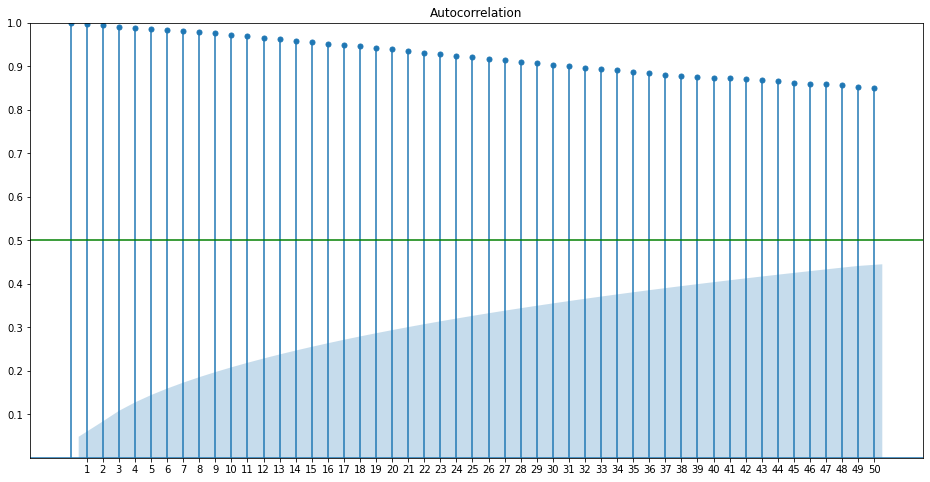

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(ada_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [16]:
#Splitting the dataset
ada_train = ada_AR['Close'].iloc[:-50]
ada_test = ada_AR['Close'].iloc[-50:]

In [17]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(ada_train, lags=50).fit()

In [18]:
forecasts = model.forecast(50).tolist()
test_values = ada_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

0.91504844401372 0.8770920038223267 0.037956440191393326
0.9264930450094988 0.916782021522522 0.009711023486976833
0.92912755355096 0.9764400124549866 -0.04731245890402658
0.9187083911229005 1.1074819564819336 -0.1887735653590331
0.90695725260422 1.130010962486267 -0.2230537098820471
0.9084458587926378 1.0978879928588867 -0.18944213406624888
0.9086258921862752 1.1505939960479736 -0.24196810386169842
0.9037790861020787 1.182147979736328 -0.2783688936342492
0.9213148296662576 1.1701840162277222 -0.24886918656146462
0.9382852213726309 1.191112041473389 -0.25282682010075797
0.9408758525327673 1.1903849840164185 -0.24950913148365117
0.9428757845018187 1.1418509483337402 -0.1989751638319215
0.9380613482073135 1.165424942970276 -0.22736359476296264
0.9408225162886531 1.1560070514678955 -0.2151845351792424
0.9404525035423906 1.1859409809112549 -0.24548847736886426
0.9404164786291392 1.2129449844360352 -0.2725285058068959
0.9377338848705005 1.170801043510437 -0.23306715863993654
0.9322945862724

In [19]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

0.14111674184619685


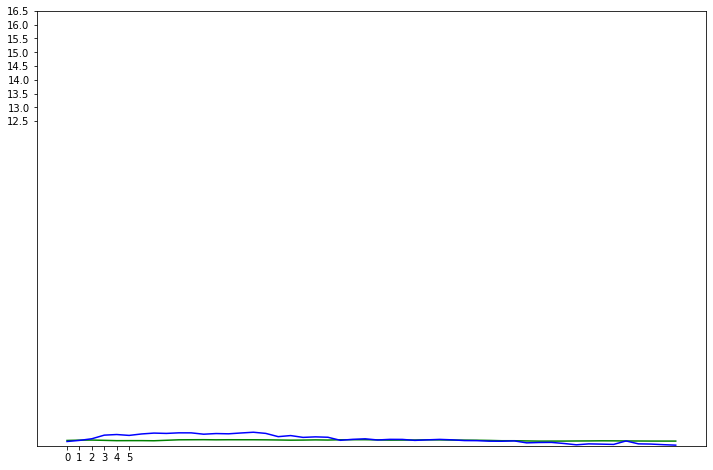

In [20]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### ATOM

In [21]:
atom_AR = atom.set_index("Date")
atom_AR

Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2019-03-14   6.439715   6.639943   6.353963   6.526642   6.526642    7318172.0
2019-03-15   6.633174   7.715249   6.432468   7.504351   7.504351    6057301.0
2019-03-16   7.507990   8.305615   6.694531   7.383882   7.383882    3477393.0
2019-03-17   7.357443   7.357443   4.727895   4.776164   4.776164    2653565.0
2019-03-18   4.828242   5.229982   4.828242   5.110341   5.110341    2567201.0
...               ...        ...        ...        ...        ...          ...
2022-05-04  17.593870  19.987272  17.563868  19.876862  19.876862  549565214.0
2022-05-05  19.871162  20.270138  17.410774  17.853285  17.853285  614325972.0
2022-05-06  17.853285  17.950396  17.255348  17.674110  17.674110  447936108.0
2022-05-07  17.676107  17.680393  16.186054  16.475998  16.475998  455478758.0
2022-05-08  16.511841  16.511841  15.677500  15.785578  15.785578  412976512.0

[1152 rows x 6 columns]

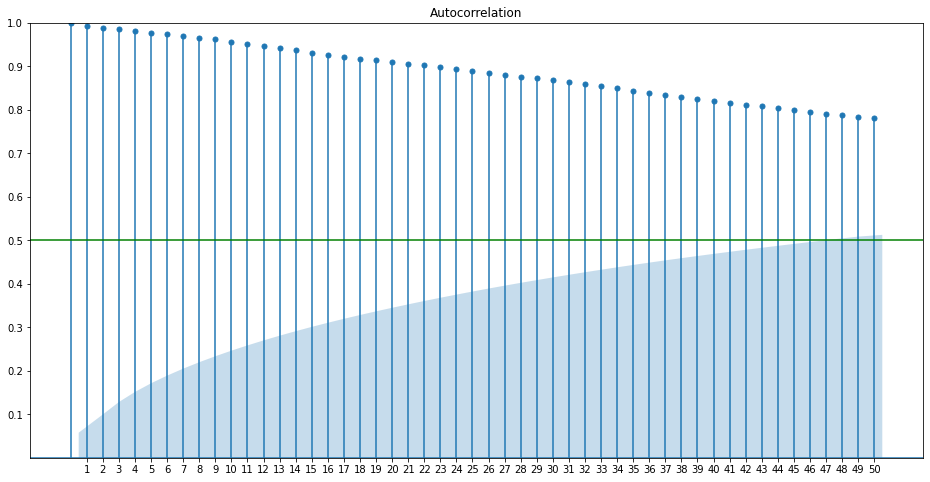

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(atom_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [23]:
#Splitting the dataset
atom_train = atom_AR['Close'].iloc[:-50]
atom_test = atom_AR['Close'].iloc[-50:]

In [24]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(atom_train, lags=50).fit()

In [25]:
forecasts = model.forecast(50).tolist()
test_values = atom_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

29.13227276894962 27.794452667236328 1.337820101713291
29.114129523011208 27.984760284423828 1.1293692385873797
29.829652916933377 28.044509887695312 1.7851430292380641
29.69061397123607 28.21002197265625 1.4805919985798184
29.438345965803915 29.19333839416504 0.245007571638876
29.88940285173772 28.131601333618164 1.7578015181195568
29.23220891739436 28.81896209716797 0.4132468202263908
30.00523050690906 29.89373207092285 0.1114984359862099
30.77929552614053 29.455869674682617 1.3234258514579125
31.069995841727533 30.26768112182617 0.8023147199013643
31.320922333789532 30.10300636291504 1.2179159708744933
31.407673947107465 28.895994186401367 2.511679760706098
31.233587458045676 29.387046813964844 1.8465406440808323
30.496604653909284 31.389738082885746 -0.8931334289764621
30.919335258623935 31.96029663085937 -1.0409613722354365
30.616294538736696 30.89144325256348 -0.2751487138267841
29.43273489381036 29.325708389282227 0.10702650452813245
29.667075494391153 26.897235870361328 2.76983

In [26]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

6.569168647620203


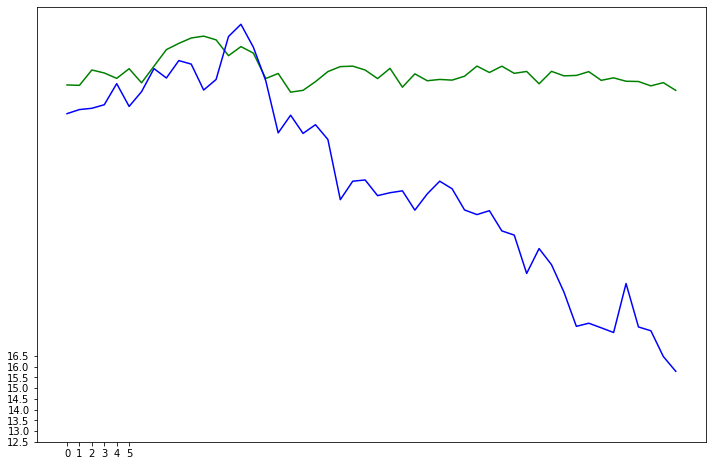

In [27]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### AVAX

In [28]:
avax_AR = avax.set_index("Date")
avax_AR

Open       High        Low      Close  Adj Close  \
Date                                                                
2020-07-13   4.613968   4.915115   4.481499   4.896294   4.896294   
2020-07-14   4.909865   5.229564   4.762068   4.986754   4.986754   
2020-09-22   4.986754  11.463443   4.125380   5.234632   5.234632   
2020-09-23   5.321654   5.329310   3.982604   4.118469   4.118469   
2020-09-24   3.817925   4.751878   3.539887   4.566561   4.566561   
...               ...        ...        ...        ...        ...   
2022-05-04  59.658340  67.282066  59.498161  67.086105  67.086105   
2022-05-05  67.076157  69.349014  57.024452  59.127441  59.127441   
2022-05-06  59.121109  59.306812  55.412495  57.034325  57.034325   
2022-05-07  57.035454  57.439198  53.625706  55.156693  55.156693   
2022-05-08  55.153175  55.253357  50.975513  51.730221  51.730221   

                  Volume  
Date                      
2020-07-13  2.834000e+04  
2020-07-14  3.957000e+03  
2020-09-22  2.880988e+08  
2020-09-23  1.730912e+08  
2020-09-24  9.611096e+07  
...                  ...  
2022-05-04  8.757237e+08  
2022-05-05  1.259826e+09  
2022-05-06  8.872802e+08  
2022-05-07  5.551183e+08  
2022-05-08  8.406972e+08  

[596 rows x 6 columns]

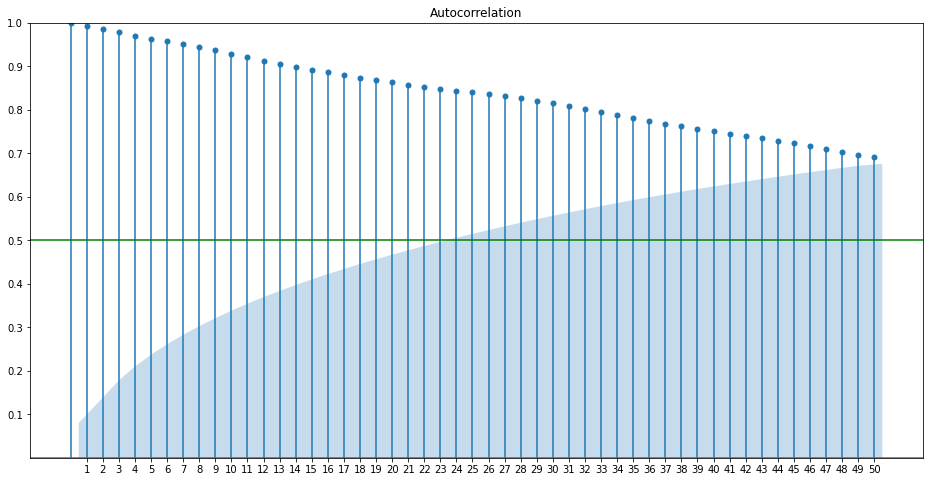

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(avax_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [30]:
#Splitting the dataset
avax_train = avax_AR['Close'].iloc[:-50]
avax_test = avax_AR['Close'].iloc[-50:]

In [31]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(avax_train, lags=50).fit()

In [32]:
forecasts = model.forecast(50).tolist()
test_values = avax_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

89.60546543604433 84.72430419921875 4.881161236825577
90.99662773336749 86.44969940185547 4.546928331512021
90.76479845810405 83.9814453125 6.783353145604053
90.79875154617805 86.25101470947266 4.547736836705397
91.05040413520734 87.55538940429688 3.4950147309104693
94.22875659984669 83.66136932373047 10.567387276116222
96.13189557915676 85.95565032958984 10.176245249566918
96.95966471117941 89.82484436035156 7.134820350827852
97.7215368855962 89.60455322265625 8.116983662939944
97.98934319117924 92.84088897705078 5.1484542141284635
99.24535640584318 95.7799835205078 3.465372885335384
98.78154111154291 96.9246597290039 1.856881382539001
97.69736264104033 96.69318389892578 1.0041787421145472
95.02886668903082 95.9732666015625 -0.9443999125316793
93.91788466320301 98.0777816772461 -4.159897014043082
92.49184880752988 95.5202178955078 -3.0283690879779215
90.29348776645779 91.0210952758789 -0.7276075094211194
87.96022278655047 82.9559097290039 5.004313057546568
86.157543241638 87.919708251

In [33]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

15.900872408012075


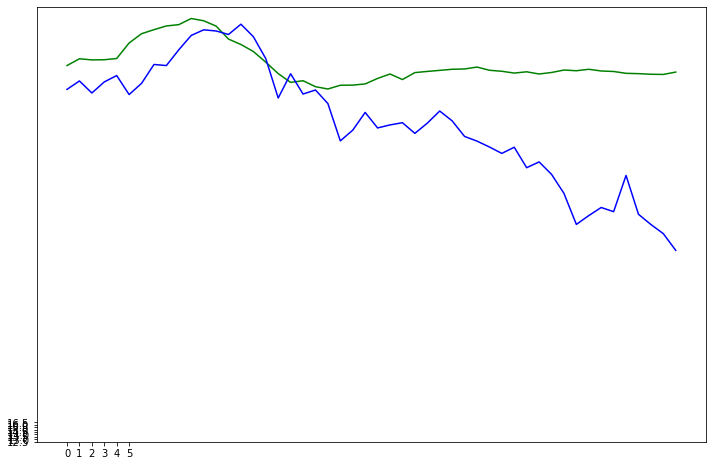

In [34]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### AXS

In [35]:
axs_AR = axs.set_index("Date")
axs_AR

Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2020-11-04   0.179801   0.191121   0.141809   0.145949   0.145949   16344570.0
2020-11-05   0.145951   0.150565   0.126469   0.135104   0.135104    4948417.0
2020-11-06   0.135104   0.149547   0.123431   0.143164   0.143164    3148629.0
2020-11-07   0.143189   0.168470   0.134455   0.141056   0.141056    1987416.0
2020-11-08   0.141021   0.239455   0.139401   0.198251   0.198251    9484360.0
...               ...        ...        ...        ...        ...          ...
2022-05-04  29.114498  33.633900  28.171825  33.363853  33.363853  379974515.0
2022-05-05  33.362663  34.753601  28.156942  28.984409  28.984409  488287918.0
2022-05-06  28.982380  29.047382  27.466135  28.462557  28.462557  279097266.0
2022-05-07  28.464800  29.423031  27.502634  28.750196  28.750196  233434007.0
2022-05-08  28.747194  31.376856  27.879026  30.405958  30.405958  509740576.0

[551 rows x 6 columns]

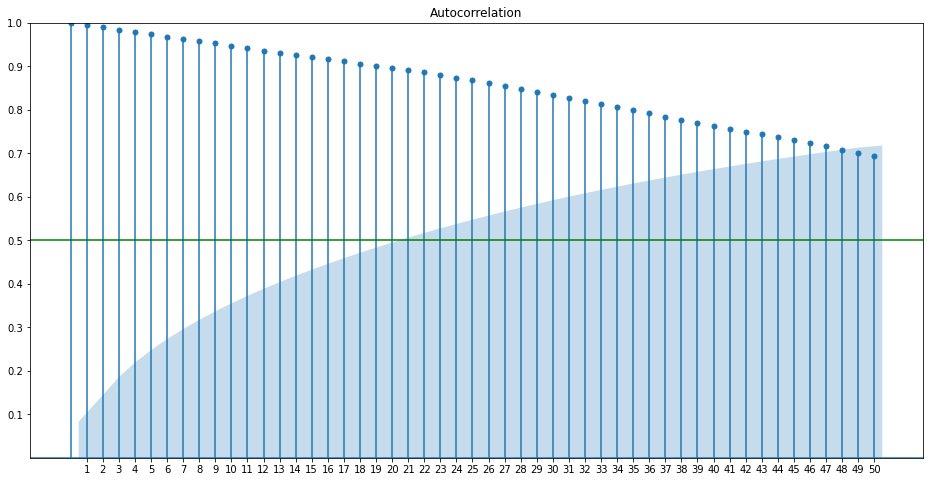

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(axs_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [37]:
#Splitting the dataset
axs_train = axs_AR['Close'].iloc[:-50]
axs_test = axs_AR['Close'].iloc[-50:]

In [38]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(axs_train, lags=50).fit()

In [39]:
forecasts = model.forecast(50).tolist()
test_values = axs_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

52.92867982319283 49.746543884277344 3.1821359389154864
53.73627780004279 50.302127838134766 3.4341499619080267
55.78918310890284 52.3872184753418 3.401964633561043
54.95700878765547 58.11574935913086 -3.1587405714753913
53.712144998639324 70.30863952636719 -16.596494527727863
53.863741300408854 71.65794372558594 -17.794202425177083
52.6837714459674 66.88520812988281 -14.20143668391541
53.90026133142444 68.31414031982422 -14.41387898839978
53.452813099477325 66.32603454589844 -12.873221446421113
52.74639001866997 64.2308578491211 -11.484467830451123
53.75131717084121 64.22624969482422 -10.474932523983007
54.40715644702264 63.446510314941406 -9.039353867918763
52.74508233807997 66.25862884521484 -13.513546507134876
52.59324192110695 65.22318267822266 -12.629940757115705
53.2674233823778 66.46807861328125 -13.20065523090345
53.55355516605104 63.84390258789063 -10.290347421839591
52.797686245779026 61.6590576171875 -8.861371371408474
53.34800334775494 53.34918975830078 -0.0011864105458414

In [40]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

13.802177627265483


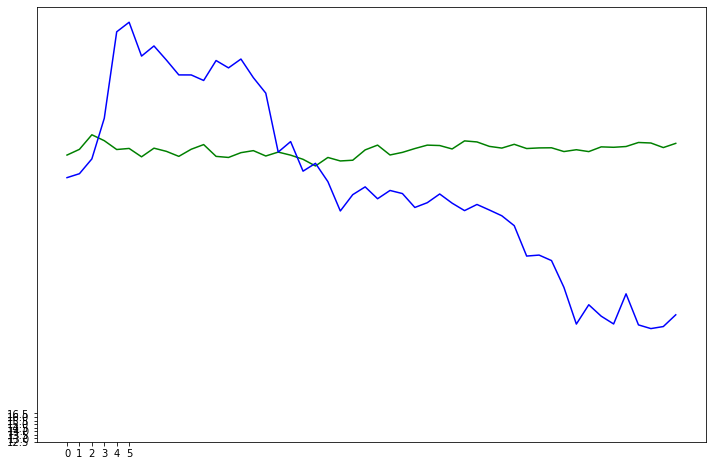

In [41]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### BTC

In [42]:
btc_AR = btc.set_index("Date")
btc_AR

Open          High           Low         Close  \
Date                                                                 
2017-05-09   1723.890015   1833.489990   1716.300049   1755.359985   
2017-05-10   1756.520020   1788.439941   1719.099976   1787.130005   
2017-05-11   1780.369995   1873.930054   1755.349976   1848.569946   
2017-05-12   1845.760010   1856.150024   1694.010010   1724.239990   
2017-05-13   1723.119995   1812.989990   1651.079956   1804.910034   
...                  ...           ...           ...           ...   
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
2022-05-07  36042.503906  36129.925781  34940.824219  35501.953125   
2022-05-08  35473.250000  35477.484375  33913.957031  34226.796875   

               Adj Close       Volume  
Date                                   
2017-05-09   1755.359985   1167920000  
2017-05-10   1787.130005    915723008  
2017-05-11   1848.569946    799489984  
2017-05-12   1724.239990    740984000  
2017-05-13   1804.910034    579635008  
...                  ...          ...  
2022-05-04  39698.371094  36754404490  
2022-05-05  36575.140625  43106256317  
2022-05-06  36040.921875  37795577489  
2022-05-07  35501.953125  24375896406  
2022-05-08  34226.796875  36945944576  

[1826 rows x 6 columns]

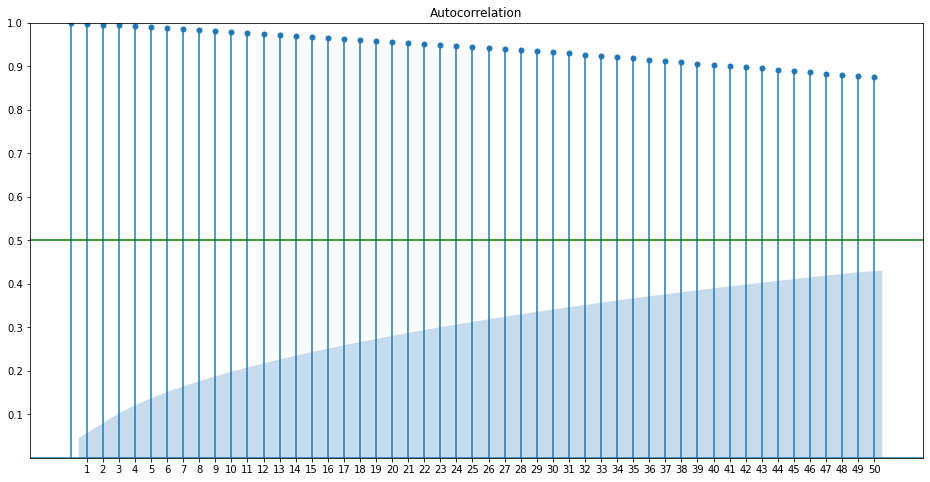

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(btc_AR['Close'], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [44]:
#Splitting the dataset
btc_train = btc_AR['Close'].iloc[:-50]
btc_test = btc_AR['Close'].iloc[-50:]

In [45]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(btc_train, lags=50).fit()

In [46]:
forecasts = model.forecast(50).tolist()
test_values = btc_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

42907.88164604997 41247.82421875 1660.057427299973
43159.15634375778 41077.99609375 2081.160250007779
43203.24512198687 42358.80859375 844.4365282368672
42598.46012936789 42892.95703125 -294.4969018821066
43052.706595654774 43960.93359375 -908.226998095226
42954.885693585944 44348.73046875 -1393.844775164056
42308.08220790802 44500.828125 -2192.745917091983
42778.040173374626 46820.4921875 -4042.4520141253743
42973.64672394703 47128.00390625 -4154.357182302971
42963.70716833923 47465.73046875 -4502.023300410772
42808.14000066632 47062.6640625 -4254.524061833683
43375.03032853635 45538.67578125 -2163.645452713652
41882.35554590731 46281.64453125 -4399.28898534269
42157.81818773734 45868.94921875 -3711.1310310126573
42301.88122438076 46453.56640625 -4151.685181869238
42205.74995154794 46622.67578125 -4416.925829702057
42047.912876935196 45555.9921875 -3508.0793105648045
41747.88330017221 43206.73828125 -1458.8549810777913
41707.4635079956 43503.84765625 -1796.3841482544012
41630.16866988

In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

3325.473767122479


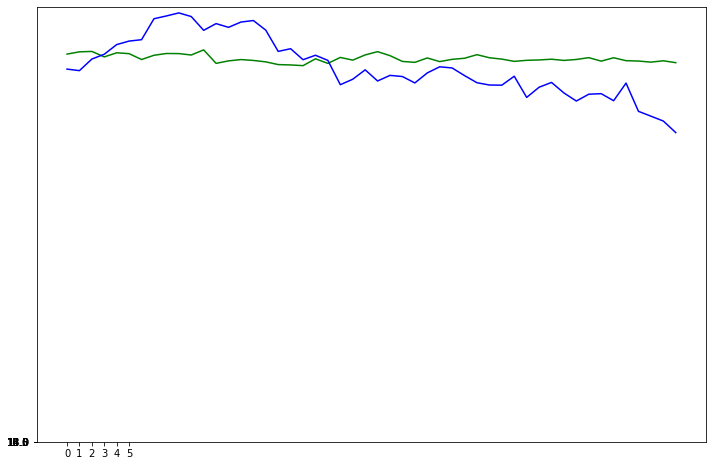

In [48]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### ETH

In [49]:
eth_AR = eth.set_index("Date")
eth_AR

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-05-04  2783.131104  2956.686768  2779.273682  2940.644775  2940.644775   
2022-05-05  2940.226562  2948.960693  2704.916260  2749.213135  2749.213135   
2022-05-06  2748.931641  2754.837646  2645.335205  2694.979736  2694.979736   
2022-05-07  2694.991943  2696.652832  2599.523438  2636.093018  2636.093018   
2022-05-08  2637.407227  2637.854004  2504.324707  2532.283691  2532.283691   

                  Volume  
Date                      
2017-11-09  8.932500e+08  
2017-11-10  8.859860e+08  
2017-11-11  8.423010e+08  
2017-11-12  1.613480e+09  
2017-11-13  1.041890e+09  
...                  ...  
2022-05-04  1.818675e+10  
2022-05-05  2.264293e+10  
2022-05-06  2.102760e+10  
2022-05-07  1.336928e+10  
2022-05-08  2.095508e+10  

[1642 rows x 6 columns]

In [50]:
#finding how many lags we should forecast

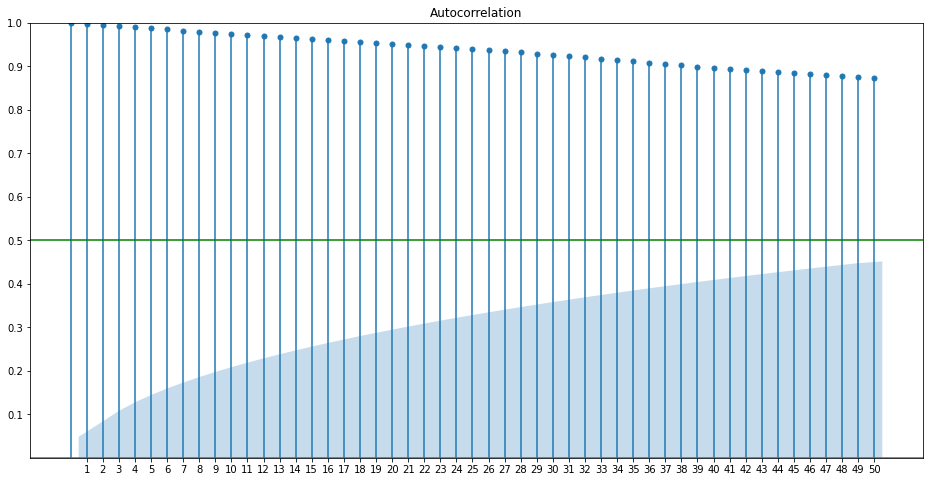

In [51]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(eth_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [52]:
#Splitting the dataset
eth_train = eth_AR['Close'].iloc[:-50]
eth_test = eth_AR['Close'].iloc[-50:]

In [53]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(eth_train, lags=50).fit()

In [54]:
forecasts = model.forecast(50).tolist()
test_values = eth_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

2972.16003184143 2860.459228515625 111.70080332580483
2964.8258156071092 2897.9765625 66.84925310710923
3011.437485690563 2973.131103515625 38.30638217493788
2960.3717069125996 3031.067138671875 -70.69543175927538
2957.194229742285 3108.06201171875 -150.8677819764648
2874.6102913036775 3106.67138671875 -232.0610954150725
2867.751801730246 3143.178955078125 -275.4271533478791
2877.96896656999 3291.57763671875 -413.6086701487602
2923.639285011789 3336.634521484375 -412.99523647258593
2913.061255802108 3401.98779296875 -488.926537166642
2923.7926889583587 3385.157958984375 -461.36527002601633
2958.6064321668364 3281.642822265625 -323.0363900987886
2877.2571861819997 3449.55224609375 -572.2950599117503
2890.67651593605 3445.059326171875 -554.3828102358252
2854.3397488117175 3522.83349609375 -668.4937472820325
2878.774039424808 3521.2412109375 -642.467171512692
2882.6100574445845 3411.79248046875 -529.1824230241655
2903.8666108532348 3171.69189453125 -267.82528367801524
2900.9716494876816 3

In [55]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

279.3241751998922


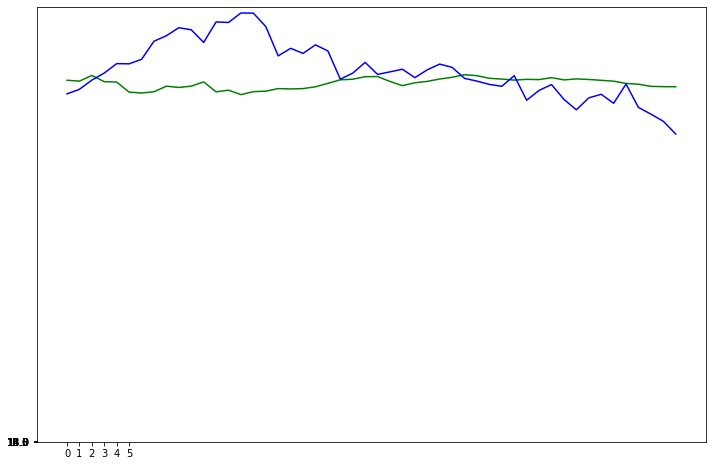

In [56]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### LINK

In [57]:
link_AR = link.set_index("Date")
link_AR

Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2017-11-09   0.216713   0.248233   0.195411   0.223969   0.223969    3347920.0
2017-11-10   0.224700   0.231280   0.180161   0.187602   0.187602    2125460.0
2017-11-11   0.186398   0.197687   0.166026   0.179770   0.179770    2238980.0
2017-11-12   0.179667   0.198376   0.145948   0.170898   0.170898    5455200.0
2017-11-13   0.169117   0.205014   0.168743   0.183071   0.183071    2992650.0
...               ...        ...        ...        ...        ...          ...
2022-05-04  11.121224  12.146651  11.113729  12.145610  12.145610  501855323.0
2022-05-05  12.153832  12.239243  10.738750  10.917400  10.917400  560835165.0
2022-05-06  10.916577  10.992021  10.499268  10.799844  10.799844  507557055.0
2022-05-07  10.799866  10.817171  10.100428  10.239905  10.239905  354478668.0
2022-05-08  10.254740  10.344585   9.925760  10.044308  10.044308  430948928.0

[1642 rows x 6 columns]

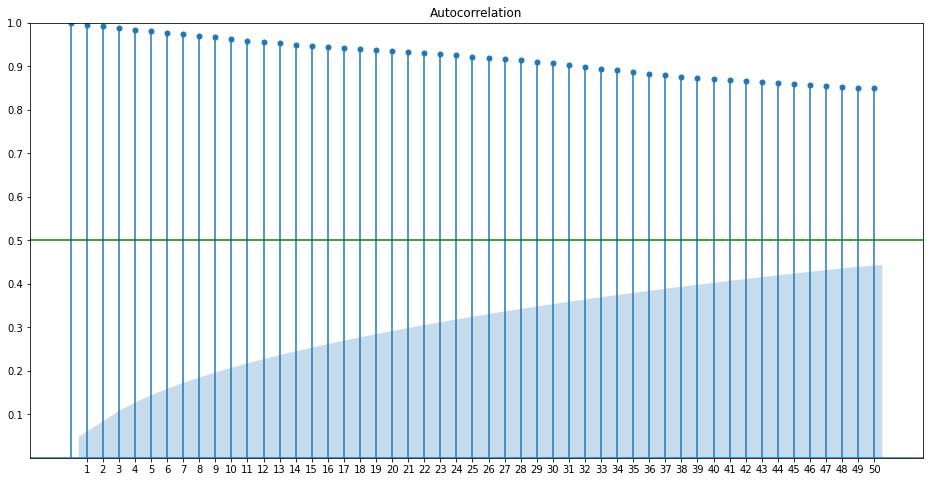

In [58]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(link_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [59]:
#Splitting the dataset
link_train = link_AR['Close'].iloc[:-50]
link_test = link_AR['Close'].iloc[-50:]

In [60]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(link_train, lags=50).fit()

In [61]:
forecasts = model.forecast(50).tolist()
test_values = link_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

15.052746197221628 14.552144050598145 0.5006021466234838
15.103248596733003 15.007802963256836 0.0954456334761673
15.334719403494425 15.450860977172852 -0.11614157367842637
14.878498468070463 15.800262451171877 -0.9217639831014139
14.473990658393468 16.171621322631836 -1.6976306642383676
14.614594811366617 15.584914207458496 -0.9703193960918792
14.417591315187515 15.821913719177246 -1.404322403989731
14.645229445644054 16.84952735900879 -2.2042979133647354
14.851565245178863 16.517032623291016 -1.6654673781121527
14.899723172078884 16.973129272460938 -2.073406100382053
15.209643733279009 17.209745407104492 -2.0001016738254833
15.422085402203852 16.910993576049805 -1.488908173845953
14.981663080790748 17.312368392944336 -2.3307053121535883
14.949365085847349 17.403167724609375 -2.453802638762026
14.93099306162188 18.09421730041504 -3.163224238793159
14.831926641455347 17.474639892578125 -2.642713251122778
14.692366381647012 16.77373504638672 -2.0813686647397063
15.02524459704078 15.4277

In [62]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

2.527383516065049


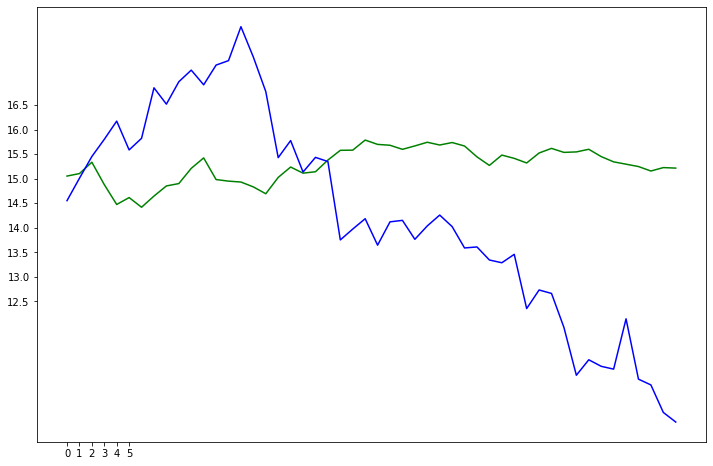

In [63]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### LUNA1

In [64]:
luna1_AR = luna1.set_index("Date")
luna1_AR

Open       High        Low      Close  Adj Close  \
Date                                                                
2019-07-26   1.704222   1.833167   1.261695   1.327436   1.327436   
2019-07-27   1.327436   1.402898   1.221938   1.310566   1.310566   
2019-07-28   1.310566   1.368595   1.236858   1.272989   1.272989   
2019-07-29   1.262270   1.375941   1.175443   1.294661   1.294661   
2019-07-30   1.294435   1.374333   1.266484   1.294193   1.294193   
...               ...        ...        ...        ...        ...   
2022-05-04  82.584396  87.956352  82.267265  86.172264  86.172264   
2022-05-05  86.159637  87.777588  79.330872  82.580406  82.580406   
2022-05-06  82.551933  82.936325  77.432007  77.464806  77.464806   
2022-05-07  77.465630  77.494347  63.838245  68.249123  68.249123   
2022-05-08  68.271729  68.271729  59.578342  64.176682  64.176682   

                  Volume  
Date                      
2019-07-26  1.208858e+07  
2019-07-27  6.033446e+06  
2019-07-28  1.643709e+06  
2019-07-29  3.966802e+06  
2019-07-30  1.820705e+06  
...                  ...  
2022-05-04  1.941975e+09  
2022-05-05  2.276428e+09  
2022-05-06  2.178574e+09  
2022-05-07  3.054300e+09  
2022-05-08  5.255014e+09  

[1018 rows x 6 columns]

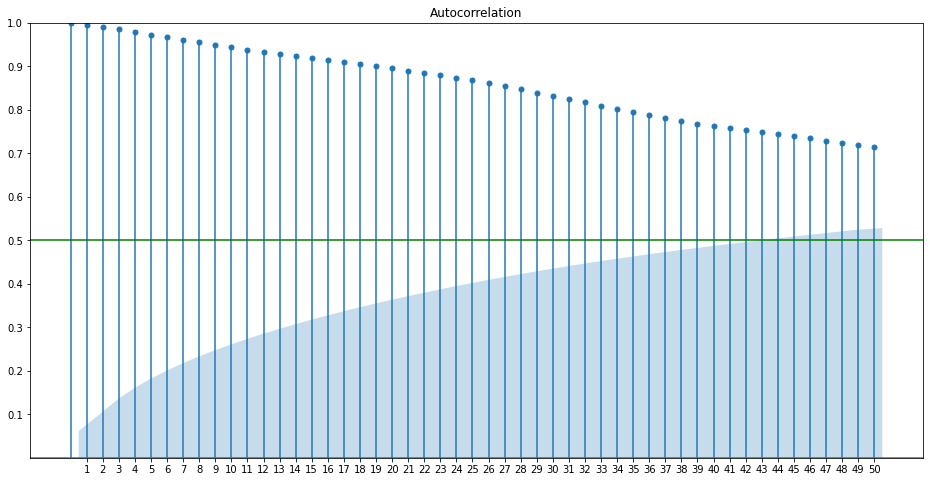

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(luna1_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [66]:
#Splitting the dataset
luna1_train = luna1_AR['Close'].iloc[:-50]
luna1_test = luna1_AR['Close'].iloc[-50:]

In [67]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(luna1_train, lags=50).fit()

In [68]:
forecasts = model.forecast(50).tolist()
test_values = luna1_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

90.86143771523066 90.53227996826172 0.32915774696894573
96.15707653687407 95.94874572753906 0.2083308093350098
106.45768663315542 93.00252532958984 13.455161303565575
106.8874642971087 94.92491912841795 11.962545168690752
103.07613998748666 93.8620147705078 9.214125216978857
99.48511203541285 90.4188995361328 9.066212499280056
100.44353152019374 91.3879165649414 9.055614955252338
98.10287287739399 94.15154266357422 3.951330213819773
98.7526819886148 97.3284683227539 1.42421366586089
91.68782990924223 108.9884262084961 -17.30059629925387
92.11129055322283 106.01579284667967 -13.904502293456844
95.2045839900847 103.01138305664062 -7.806799066555925
91.87055686828585 105.7753677368164 -13.90481086853056
92.54336088101817 115.19041442871094 -22.647053547692764
86.06519323186606 113.06985473632812 -27.004661504462064
86.54826950086674 116.40892028808594 -29.8606507872192
84.26047884890315 116.11331176757812 -31.852832918674977
82.45399467180061 107.87109375 -25.417099078199385
82.3104208029

In [69]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

13.871342544533901


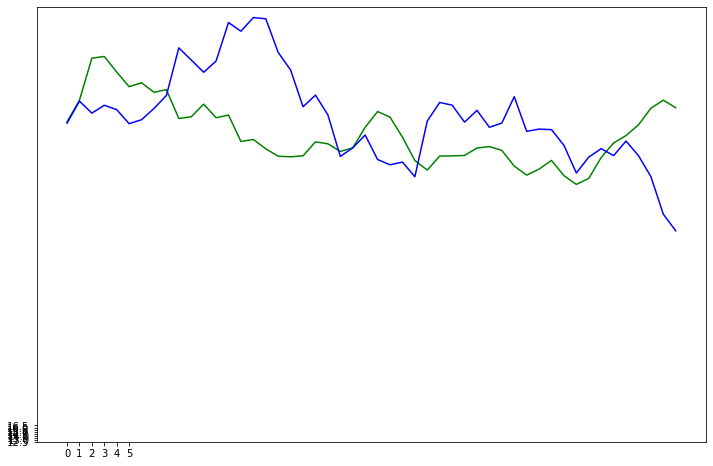

In [70]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### MATIC

In [71]:
matic_AR = matic.set_index("Date")
matic_AR

Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2019-04-28  0.004521  0.004545  0.004317  0.004421   0.004421    8408136.0
2019-04-29  0.004418  0.004492  0.003471  0.003471   0.003471    8267044.0
2019-04-30  0.003462  0.005078  0.003458  0.004478   0.004478   25072706.0
2019-05-01  0.004440  0.004673  0.004071  0.004374   0.004374   10567352.0
2019-05-02  0.004366  0.004700  0.004096  0.004198   0.004198    6714908.0
...              ...       ...       ...       ...        ...          ...
2022-05-04  1.075928  1.171143  1.073876  1.171032   1.171032  742971942.0
2022-05-05  1.170986  1.185085  1.035494  1.064691   1.064691  759187845.0
2022-05-06  1.064479  1.075262  1.022339  1.044133   1.044133  704670768.0
2022-05-07  1.044149  1.064007  1.000354  1.021204   1.021204  618880005.0
2022-05-08  1.024481  1.026015  0.966227  0.979784   0.979784  576489152.0

[1107 rows x 6 columns]

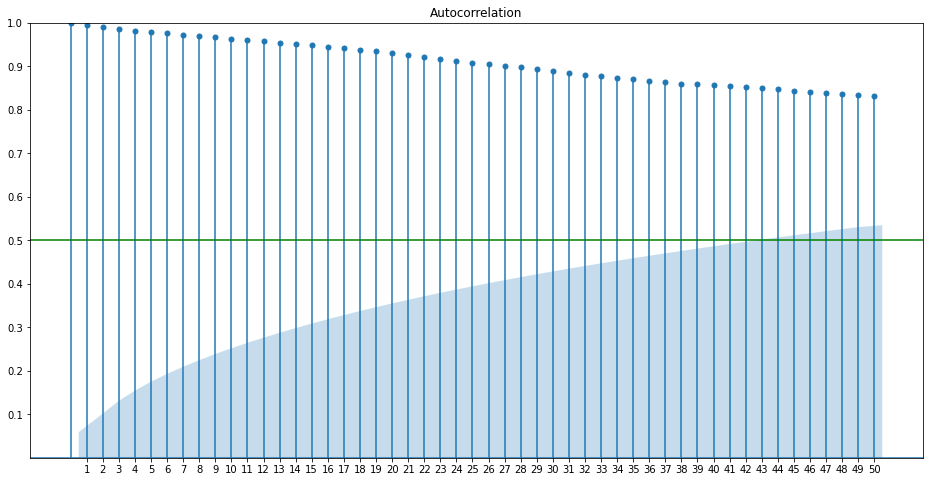

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(matic_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [73]:
#Splitting the dataset
matic_train = matic_AR['Close'].iloc[:-50]
matic_test = matic_AR['Close'].iloc[-50:]

In [74]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(matic_train, lags=50).fit()

In [75]:
forecasts = model.forecast(50).tolist()
test_values = matic_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

1.5807871340928286 1.4639190435409546 0.11686809055187397
1.606669153457975 1.466493010520935 0.14017614293703984
1.5970051151745255 1.5054479837417605 0.091557131432765
1.5739719687423863 1.5563030242919922 0.01766894445039413
1.5794603245497918 1.6287649869918823 -0.04930466244209053
1.5569288022293808 1.5795730352401731 -0.022644233010792325
1.5671662947479985 1.6108030080795288 -0.0436367133315303
1.598970433060782 1.6934809684753418 -0.09451053541455989
1.6350673640699074 1.6603870391845703 -0.025319675114662932
1.6178514363878866 1.6747870445251465 -0.05693560813725984
1.6393460864478755 1.6846189498901367 -0.045272863442261224
1.6471261067041927 1.617285966873169 0.029840139831023738
1.6114469354851861 1.6939140558242798 -0.08246712033909365
1.5993338017704892 1.654024958610535 -0.05469115684004566
1.5808333918599233 1.6888099908828735 -0.1079765990229502
1.6131021223584117 1.6499179601669312 -0.03681583780851949
1.637224389903657 1.592921018600464 0.04430337130319284
1.64622840

In [76]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

0.31642975186123656


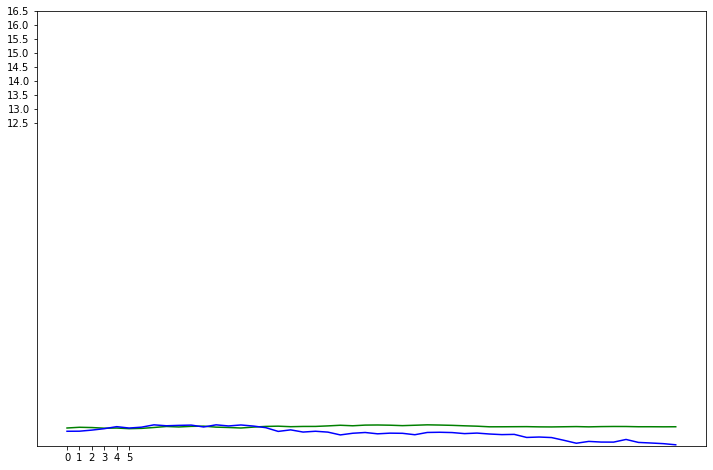

In [77]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

### SOL

In [78]:
sol_AR = sol.set_index("Date")
sol_AR

Open       High        Low      Close  Adj Close  \
Date                                                                
2020-04-10   0.832005   1.313487   0.694187   0.951054   0.951054   
2020-04-11   0.951054   1.049073   0.765020   0.776819   0.776819   
2020-04-12   0.785448   0.956670   0.762426   0.882507   0.882507   
2020-04-13   0.890760   0.891603   0.773976   0.777832   0.777832   
2020-04-14   0.777832   0.796472   0.628169   0.661925   0.661925   
...               ...        ...        ...        ...        ...   
2022-05-04  85.841728  92.937195  85.728065  92.770851  92.770851   
2022-05-05  92.769791  95.032822  81.834869  84.596024  84.596024   
2022-05-06  84.588493  84.646935  80.468613  81.764107  81.764107   
2022-05-07  81.766670  82.180786  77.883232  78.983421  78.983421   
2022-05-08  79.022034  79.194817  74.570267  75.536499  75.536499   

                  Volume  
Date                      
2020-04-10  8.736428e+07  
2020-04-11  4.386244e+07  
2020-04-12  3.873690e+07  
2020-04-13  1.821128e+07  
2020-04-14  1.674761e+07  
...                  ...  
2022-05-04  1.428455e+09  
2022-05-05  1.805979e+09  
2022-05-06  1.585082e+09  
2022-05-07  1.139093e+09  
2022-05-08  1.447528e+09  

[759 rows x 6 columns]

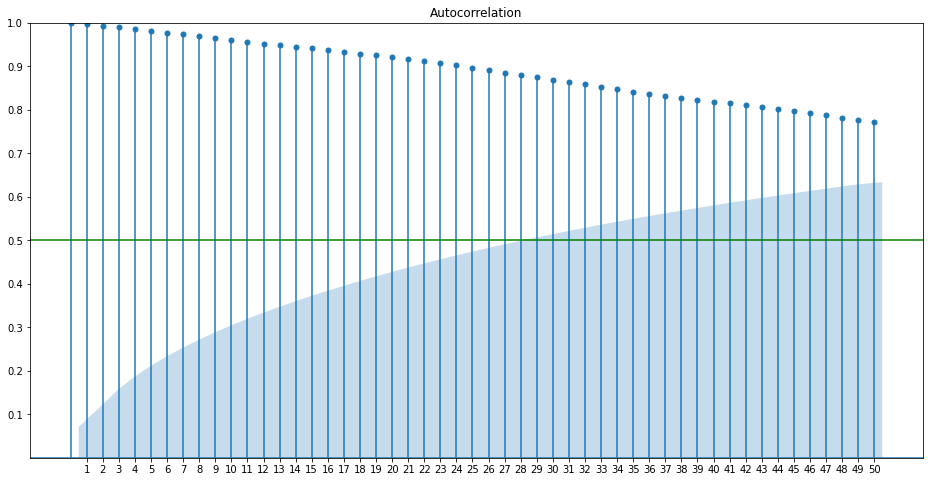

In [79]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(sol_AR["Close"], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [80]:
#Splitting the dataset
sol_train = sol_AR['Close'].iloc[:-50]
sol_test = sol_AR['Close'].iloc[-50:]

In [81]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(sol_train, lags=50).fit()

In [82]:
forecasts = model.forecast(50).tolist()
test_values = sol_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

94.75007577003208 88.61486053466797 6.1352152353641145
96.09712996825124 88.7572021484375 7.339927819813738
95.15067439713758 90.51296997070312 4.637704426434453
95.57126281034017 95.1026840209961 0.4685787893440789
97.92946865554387 102.22369384765624 -4.294225192112364
94.85699336901283 98.6581039428711 -3.801110573858267
93.33169113985967 101.7641830444336 -8.432491904573922
90.11585589374383 107.08422088623048 -16.968364992486656
90.60537160210525 106.46525573730467 -15.859884135199422
93.15171134262127 111.71031188964844 -18.55860054702717
93.3434440419689 120.6994857788086 -27.3560417368397
91.81590818772152 122.66146087646484 -30.845552688743325
90.11955262756562 134.43093872070312 -44.3113860931375
90.72451505127285 132.19886779785156 -41.47435274657872
89.30942558663425 136.77532958984375 -47.4659040032095
86.70504438418178 132.41262817382812 -45.70758378964635
85.92798829428732 126.86223602294922 -40.9342477286619
85.76495870298476 112.88338470458984 -27.118426001605087
86.29

In [83]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts,squared=False))

19.837990592244783


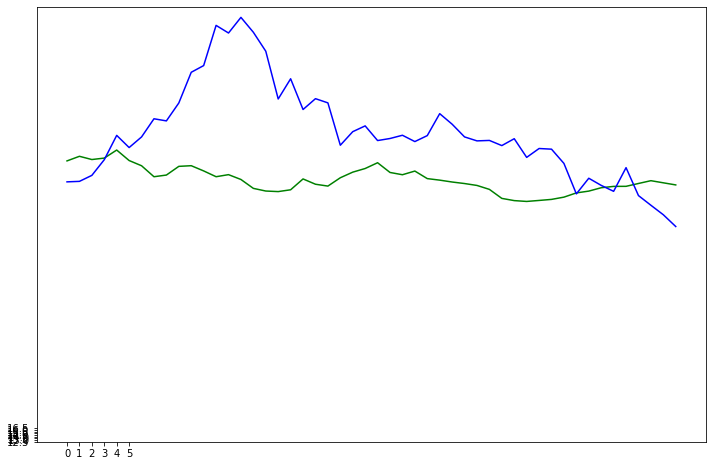

In [84]:
#Plotting the difference between real and predicted values
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()

# ARIMA

In [85]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

### ADA

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2017-11-09  0.032053
2017-11-10  0.027119
2017-11-11  0.027437
2017-11-12  0.023977
2017-11-13  0.025808


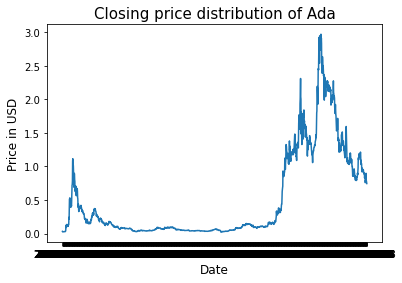

In [86]:
data = ada['Close']
Date1 = ada['Date']
train1 = ada[['Date','Close']]
# Setting the Date as Index
ada_ARIMA = train1.set_index('Date')
ada_ARIMA.sort_index(inplace=True)
print (type(ada_ARIMA))
print (ada_ARIMA.head())
plot.plot(ada_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Ada", fontsize=15)
plot.show()

In [87]:
def test_stationarity(x):

    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

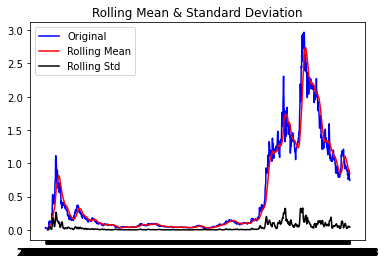

ADF Stastistic: -1.773855
p-value: 0.393517
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [88]:
ts_ada = ada_ARIMA['Close']      
test_stationarity(ts_ada)

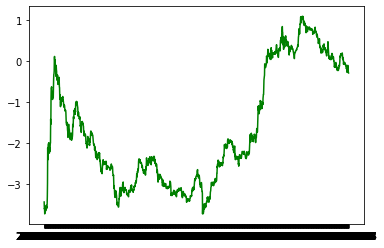

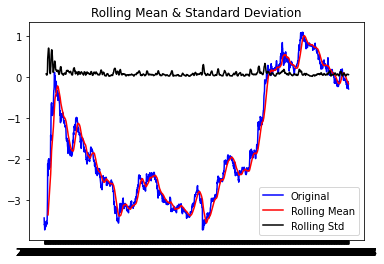

ADF Stastistic: -1.445967
p-value: 0.560052
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [89]:
ts_ada_log = dragon.log(ts_ada)
plot.plot(ts_ada_log,color="green")
plot.show()

test_stationarity(ts_ada_log)

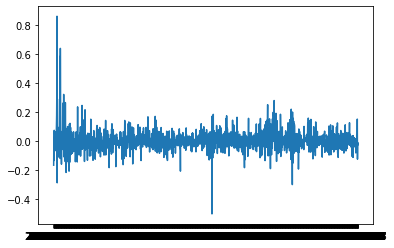

In [90]:
ts_ada_log_diff = ts_ada_log - ts_ada_log.shift()
plot.plot(ts_ada_log_diff)
plot.show()

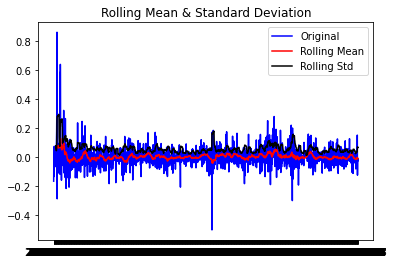

ADF Stastistic: -7.276555
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [91]:
ts_ada_log_diff.dropna(inplace=True)
test_stationarity(ts_ada_log_diff)

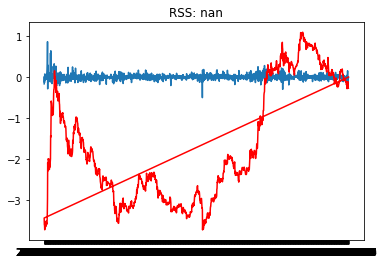

In [92]:
model = sm.tsa.arima.ARIMA(ts_ada_log, order=(2,1,0))  
results_ARIMA = model.fit()  
plot.plot(ts_ada_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_ada_log_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 0.902933,   expected = 0.877092,   error = 2.946225  %
predicted = 0.883780,   expected = 0.916782,   error = 3.599786  %
predicted = 0.912995,   expected = 0.976440,   error = 6.497537  %
predicted = 0.981562,   expected = 1.107482,   error = 11.369969  %
predicted = 1.115503,   expected = 1.130011,   error = 1.283920  %
predicted = 1.149143,   expected = 1.097888,   error = 4.668538  %
predicted = 1.101180,   expected = 1.150594,   error = 4.294683  %
predicted = 1.145595,   expected = 1.182148,   error = 3.092091  %
predicted = 1.189285,   expected = 1.170184,   error = 1.632303  %
predicted = 1.174558,   expected = 1.191112,   error = 1.389812  %
predicted = 1.189274,   expected = 1.190385,   error = 0.093336  %
predicted = 1.193226,   expected = 1.141851,   error = 4.499286  %
predicted = 1.142240,   expected = 1.165425,   error = 1.989404  %
predicted = 1.158698,   expected = 1.156007,   error = 0.232789  %
predicted = 1.1592

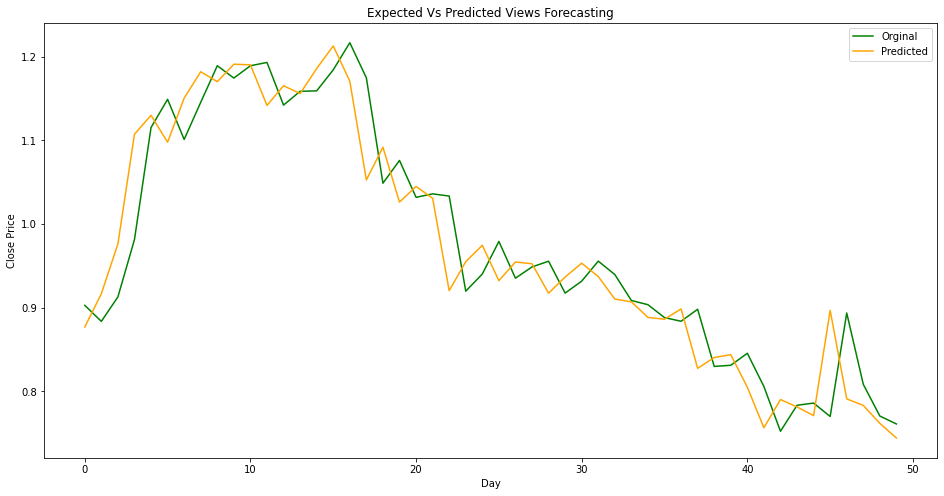

In [93]:
size = int(len(ts_ada_log)-100)

train_arima, test_arima = ts_ada_log[0:-50], ts_ada_log[-50:len(ts_ada_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [94]:
#RMSE

import cmath
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(originals,predictions))


0.048057492069736085

#### ADA prediction

In [95]:
#Following 2 days
import numpy as np
pred = model_fit.forecast(3)
future_ADA=list(np.exp(pred[0:]))
future_ADA

[0.7611739538149082, 0.7584012150345438, 0.7583455839229958]

### ATOM

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2019-03-14  6.526642
2019-03-15  7.504351
2019-03-16  7.383882
2019-03-17  4.776164
2019-03-18  5.110341


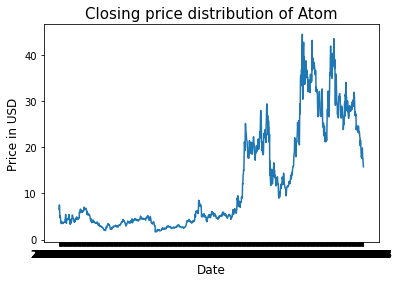

In [96]:
data_atom = atom['Close']
Date_atom = atom['Date']
train_atom = atom[['Date','Close']]
# Setting the Date as Index
atom_ARIMA = train_atom.set_index('Date')
atom_ARIMA.sort_index(inplace=True)
print (type(atom_ARIMA))
print (atom_ARIMA.head())
plot.plot(atom_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Atom", fontsize=15)
plot.show()

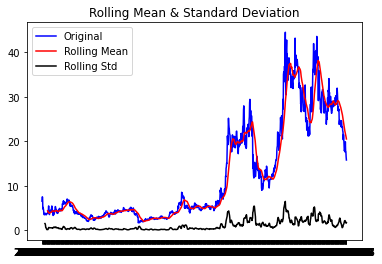

ADF Stastistic: -1.429651
p-value: 0.567981
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [97]:
ts_atom= atom_ARIMA['Close']      
test_stationarity(ts_atom)

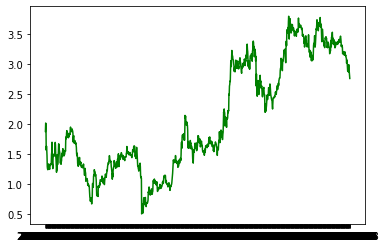

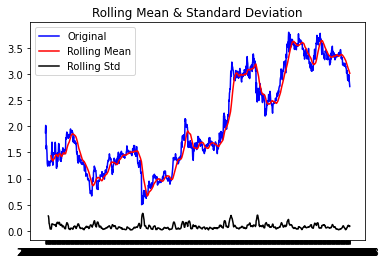

ADF Stastistic: -1.154147
p-value: 0.693003
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [98]:
ts_log_atom = dragon.log(ts_atom)
plot.plot(ts_log_atom,color="green")
plot.show()

test_stationarity(ts_log_atom)

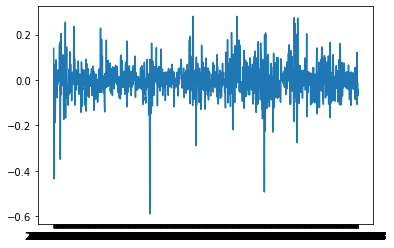

In [99]:
ts_log_atom_diff = ts_log_atom - ts_log_atom.shift()
plot.plot(ts_log_atom_diff)
plot.show()

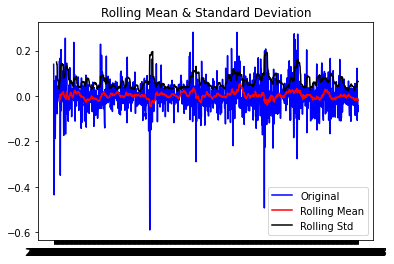

ADF Stastistic: -15.388022
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [100]:
ts_log_atom_diff.dropna(inplace=True)
test_stationarity(ts_log_atom_diff)

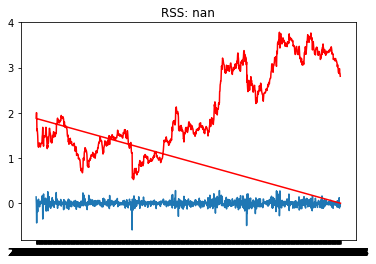

In [101]:
model_atom = sm.tsa.arima.ARIMA(ts_log_atom, order=(2,1,0))  
results_atom_ARIMA = model_atom.fit()  
plot.plot(ts_log_atom_diff)
plot.plot(results_atom_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_atom_ARIMA.fittedvalues-ts_log_atom_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 28.633785,   expected = 27.794453,   error = 3.019782  %
predicted = 27.872091,   expected = 27.984760,   error = 0.402608  %
predicted = 27.993209,   expected = 28.044510,   error = 0.182927  %
predicted = 28.033240,   expected = 28.210022,   error = 0.626663  %
predicted = 28.193135,   expected = 29.193338,   error = 3.426134  %
predicted = 29.097579,   expected = 28.131601,   error = 3.433780  %
predicted = 28.196877,   expected = 28.818962,   error = 2.158596  %
predicted = 28.788221,   expected = 29.893732,   error = 3.698136  %
predicted = 29.772398,   expected = 29.455870,   error = 1.074584  %
predicted = 29.462226,   expected = 30.267681,   error = 2.661107  %
predicted = 30.206548,   expected = 30.103006,   error = 0.343957  %
predicted = 30.092926,   expected = 28.895994,   error = 4.142206  %
predicted = 29.008618,   expected = 29.387047,   error = 1.287739  %
predicted = 29.378974,   expected = 31.389738,   error = 6.4

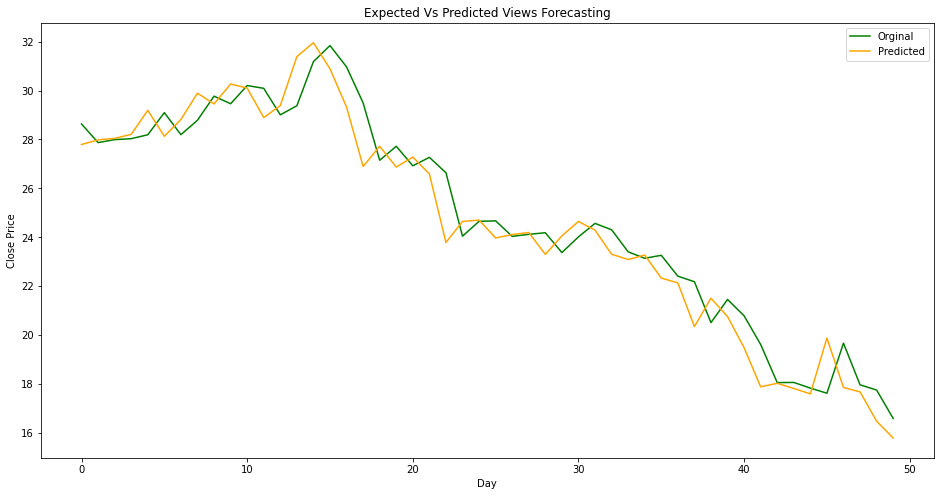

In [102]:
size = int(len(ts_log_atom)-100)

train_atom_arima, test_atom_arima = ts_log_atom[0:-50], ts_log_atom[-50:len(ts_log_atom)]
history = [x for x in train_atom_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_atom_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_atom_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_atom_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [103]:
#RMSE
math.sqrt(mean_squared_error(originals,predictions))

1.0627823890654369

#### ATOM prediction

In [104]:
#Following 2 days
pred = model_fit.forecast(3)
future_ATOM=list(np.exp(pred[0:]))
future_ATOM

[16.586744068827237, 16.61106879052895, 16.605558517361114]

### AVAX

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2020-07-13  4.896294
2020-07-14  4.986754
2020-09-22  5.234632
2020-09-23  4.118469
2020-09-24  4.566561


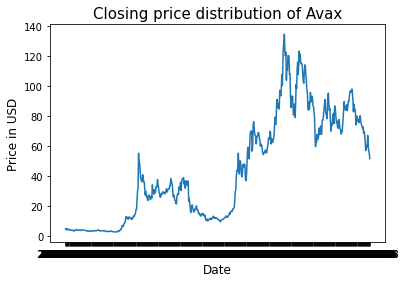

In [105]:
data_avax = avax['Close']
Date_avax = avax['Date']
train_avax = avax[['Date','Close']]
# Setting the Date as Index
avax_ARIMA = train_avax.set_index('Date')
avax_ARIMA.sort_index(inplace=True)
print (type(avax_ARIMA))
print (avax_ARIMA.head())
plot.plot(avax_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Avax", fontsize=15)
plot.show()

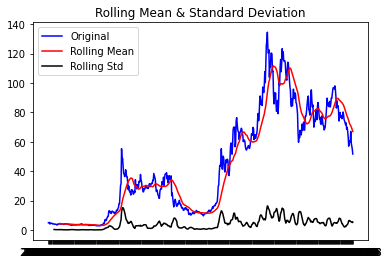

ADF Stastistic: -1.561142
p-value: 0.503078
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.866 
	10%: -2.569 


In [106]:

ts_avax= avax_ARIMA['Close']      
test_stationarity(ts_avax)

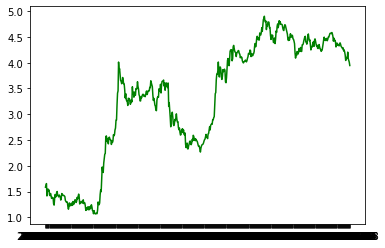

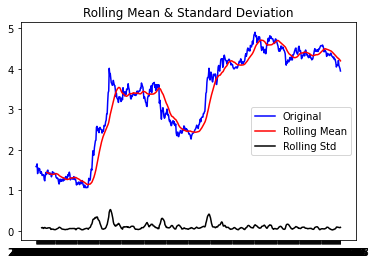

ADF Stastistic: -1.578210
p-value: 0.494529
The graph is non stationery
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [107]:
ts_log_avax = dragon.log(ts_avax)
plot.plot(ts_log_avax,color="green")
plot.show()

test_stationarity(ts_log_avax)

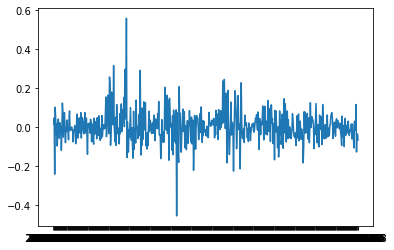

In [108]:
ts_log_avax_diff = ts_log_avax - ts_log_avax.shift()
plot.plot(ts_log_avax_diff)
plot.show()

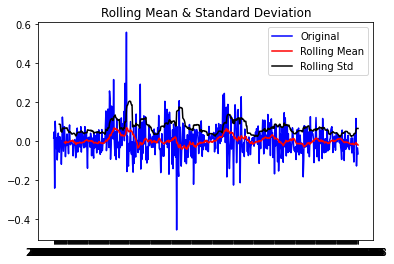

ADF Stastistic: -12.208243
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.441 
	5%: -2.866 
	10%: -2.569 


In [109]:
ts_log_avax_diff.dropna(inplace=True)
test_stationarity(ts_log_avax_diff)

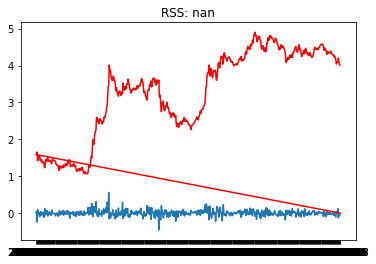

In [110]:
model_avax = sm.tsa.arima.ARIMA(ts_log_avax, order=(2,1,0))
results_avax_ARIMA = model_avax.fit()
plot.plot(ts_log_avax_diff)
plot.plot(results_avax_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_avax_ARIMA.fittedvalues-ts_log_avax_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 90.028916,   expected = 27.794453,   error = 223.909655  %
predicted = 28.236403,   expected = 27.984760,   error = 0.899212  %
predicted = 27.177058,   expected = 28.044510,   error = 3.093124  %
predicted = 28.047281,   expected = 28.210022,   error = 0.576891  %
predicted = 28.209349,   expected = 29.193338,   error = 3.370596  %
predicted = 29.185936,   expected = 28.131601,   error = 3.747866  %
predicted = 28.159866,   expected = 28.818962,   error = 2.287021  %
predicted = 28.792313,   expected = 29.893732,   error = 3.684449  %
predicted = 29.894744,   expected = 29.455870,   error = 1.489938  %
predicted = 29.479503,   expected = 30.267681,   error = 2.604026  %
predicted = 30.250816,   expected = 30.103006,   error = 0.491012  %
predicted = 30.119330,   expected = 28.895994,   error = 4.233582  %
predicted = 28.906071,   expected = 29.387047,   error = 1.636693  %
predicted = 29.360554,   expected = 31.389738,   error = 6

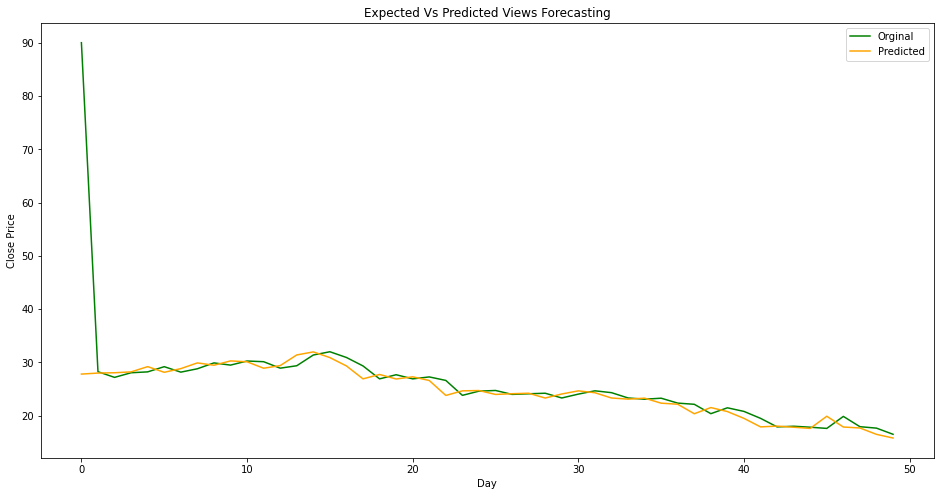

In [111]:
size = int(len(ts_log_avax)-100)

train_avax_arima, test_avax_arima = ts_log_avax[0:-50], ts_log_avax[-50:len(ts_log_avax)]
history = [x for x in train_avax_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_avax_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_atom_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_avax_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [112]:
#RMSE
math.sqrt(mean_squared_error(originals,predictions))

8.865485194252157

### AXS

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2020-11-04  0.145949
2020-11-05  0.135104
2020-11-06  0.143164
2020-11-07  0.141056
2020-11-08  0.198251


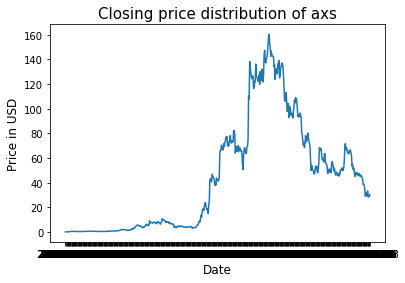

In [113]:
data_axs = axs['Close']
Date_axs = axs['Date']
train_axs = axs[['Date','Close']]
# Setting the Date as Index
axs_ARIMA = train_axs.set_index('Date')
axs_ARIMA.sort_index(inplace=True)
print (type(axs_ARIMA))
print (axs_ARIMA.head())
plot.plot(axs_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of axs", fontsize=15)
plot.show()

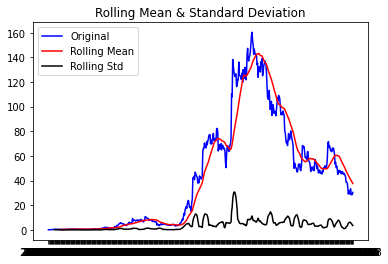

ADF Stastistic: -1.250240
p-value: 0.651619
The graph is non stationery
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


In [114]:


ts_axs= axs_ARIMA['Close']
test_stationarity(ts_axs)

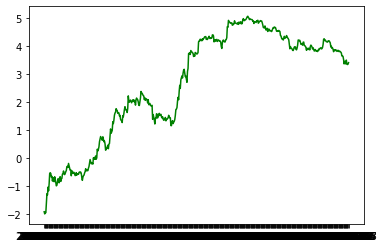

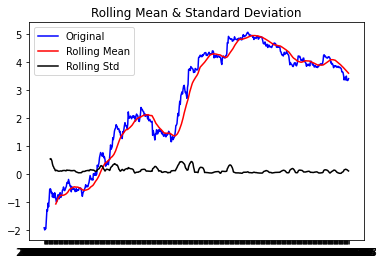

ADF Stastistic: -1.878750
p-value: 0.342123
The graph is non stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [115]:
ts_log_axs= dragon.log(ts_axs)
plot.plot(ts_log_axs,color="green")
plot.show()

test_stationarity(ts_log_axs)

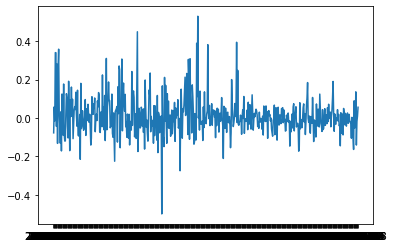

In [116]:
ts_log_axs_diff = ts_log_axs - ts_log_axs.shift()
plot.plot(ts_log_axs_diff)
plot.show()

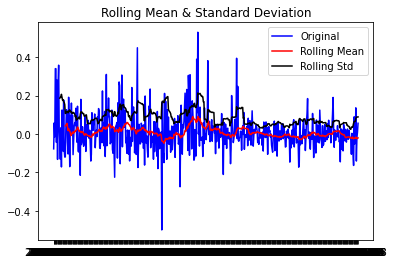

ADF Stastistic: -7.731009
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


In [117]:
ts_log_axs_diff.dropna(inplace=True)
test_stationarity(ts_log_axs_diff)

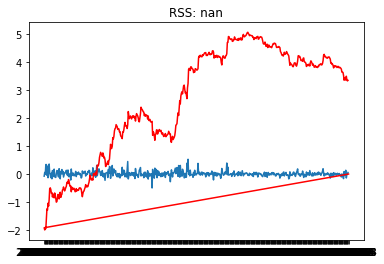

In [118]:
model_axs = sm.tsa.arima.ARIMA(ts_log_axs, order=(2,1,0))
results_axs_ARIMA = model_axs.fit()
plot.plot(ts_log_axs_diff)
plot.plot(results_axs_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_axs_ARIMA.fittedvalues-ts_log_axs_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 52.094202,   expected = 49.746544,   error = 4.719239  %
predicted = 49.876379,   expected = 50.302128,   error = 0.846384  %
predicted = 50.101543,   expected = 52.387218,   error = 4.363041  %
predicted = 52.441605,   expected = 58.115749,   error = 9.763523  %
predicted = 58.337575,   expected = 70.308640,   error = 17.026448  %
predicted = 71.042526,   expected = 71.657944,   error = 0.858828  %
predicted = 72.893819,   expected = 66.885208,   error = 8.983467  %
predicted = 66.966851,   expected = 68.314140,   error = 1.972196  %
predicted = 67.917795,   expected = 66.326035,   error = 2.399903  %
predicted = 66.436227,   expected = 64.230858,   error = 3.433503  %
predicted = 64.055112,   expected = 64.226250,   error = 0.266461  %
predicted = 64.048445,   expected = 63.446510,   error = 0.948727  %
predicted = 63.441564,   expected = 66.258629,   error = 4.251620  %
predicted = 66.205318,   expected = 65.223183,   error = 1.

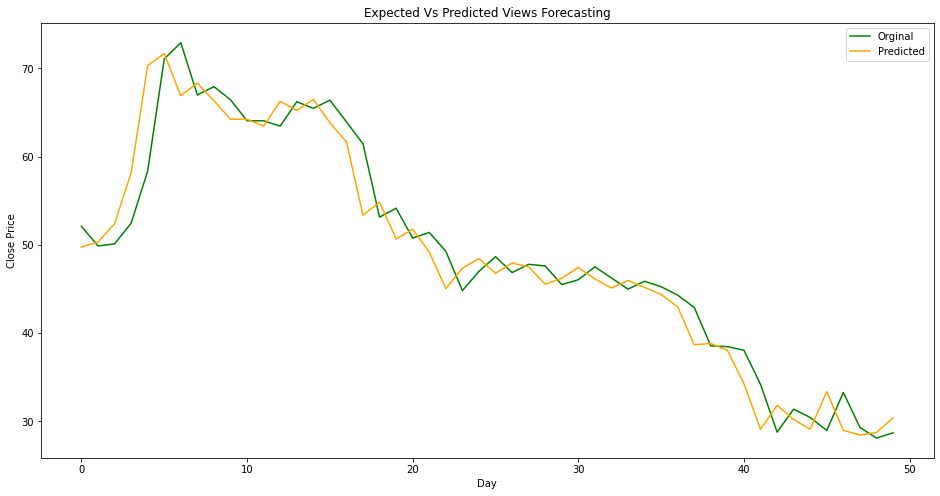

In [119]:
size = int(len(ts_log_axs)-100)

train_axs_arima, test_axs_arima = ts_log_axs[0:-50], ts_log_axs[-50:len(ts_log_axs)]
history = [x for x in train_axs_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_axs_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_axs_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_axs_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [120]:
#RMSE
math.sqrt(mean_squared_error(originals,predictions))

3.155015330967978

#### AXS prediction

In [121]:
#Following 2 days
pred = model_fit.forecast(3)
future_AXS=list(np.exp(pred[0:]))
future_AXS

[28.706147731526844, 28.73075590104169, 28.727038923768795]

### BTC

<class 'pandas.core.frame.DataFrame'>
                  Close
Date                   
2017-05-09  1755.359985
2017-05-10  1787.130005
2017-05-11  1848.569946
2017-05-12  1724.239990
2017-05-13  1804.910034


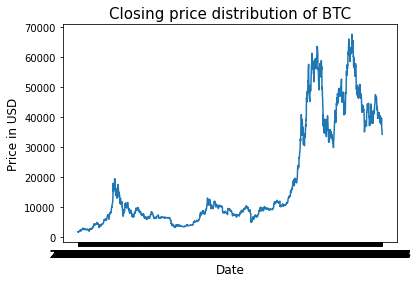

In [122]:
data_btc = btc['Close']
Date_btc = btc['Date']
train_btc = btc[['Date','Close']]
# Setting the Date as Index
btc_ARIMA = train_btc.set_index('Date')
btc_ARIMA.sort_index(inplace=True)
print (type(btc_ARIMA))
print (btc_ARIMA.head())
plot.plot(btc_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of BTC", fontsize=15)
plot.show()

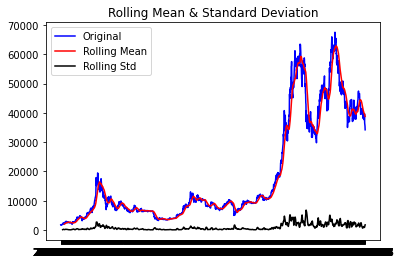

ADF Stastistic: -1.272677
p-value: 0.641578
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [123]:
ts_btc= btc_ARIMA['Close']
test_stationarity(ts_btc)

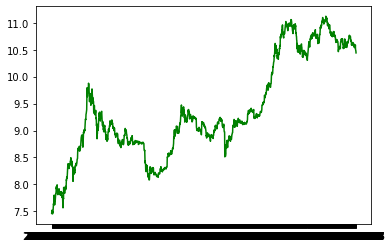

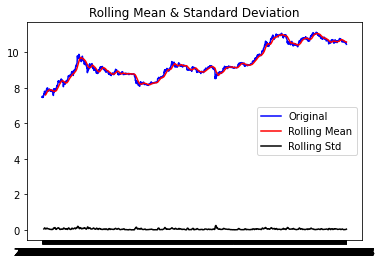

ADF Stastistic: -1.710726
p-value: 0.425595
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [124]:
ts_log_btc = dragon.log(ts_btc)
plot.plot(ts_log_btc,color="green")
plot.show()

test_stationarity(ts_log_btc)

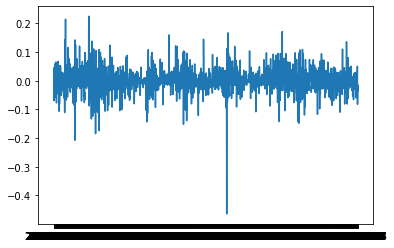

In [125]:
ts_log_btc_diff = ts_log_btc - ts_log_btc.shift()
plot.plot(ts_log_btc_diff)
plot.show()

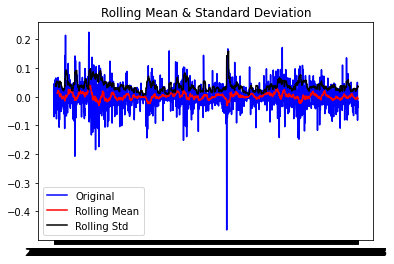

ADF Stastistic: -44.113363
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [126]:
ts_log_btc_diff.dropna(inplace=True)
test_stationarity(ts_log_btc_diff)

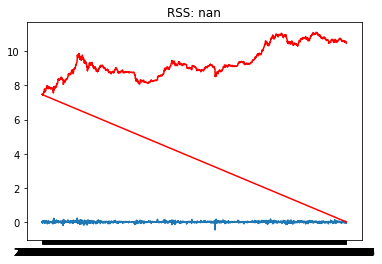

In [127]:
model_btc = sm.tsa.arima.ARIMA(ts_log_btc, order=(2,1,0))
results_btc_ARIMA = model_btc.fit()
plot.plot(ts_log_btc_diff)
plot.plot(results_btc_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_btc_ARIMA.fittedvalues-ts_log_btc_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 42207.313223,   expected = 41247.824219,   error = 2.326157  %
predicted = 41287.573686,   expected = 41077.996094,   error = 0.510194  %
predicted = 41052.999972,   expected = 42358.808594,   error = 3.082732  %
predicted = 42315.022757,   expected = 42892.957031,   error = 1.347387  %
predicted = 42919.454202,   expected = 43960.933594,   error = 2.369102  %
predicted = 43947.211104,   expected = 44348.730469,   error = 0.905368  %
predicted = 44372.666202,   expected = 44500.828125,   error = 0.287999  %
predicted = 44509.042045,   expected = 46820.492188,   error = 4.936834  %
predicted = 46756.736874,   expected = 47128.003906,   error = 0.787784  %
predicted = 47196.967368,   expected = 47465.730469,   error = 0.566226  %
predicted = 47466.073574,   expected = 47062.664062,   error = 0.857175  %
predicted = 47085.207544,   expected = 45538.675781,   error = 3.396084  %
predicted = 45569.232991,   expected = 46281.644531,   er

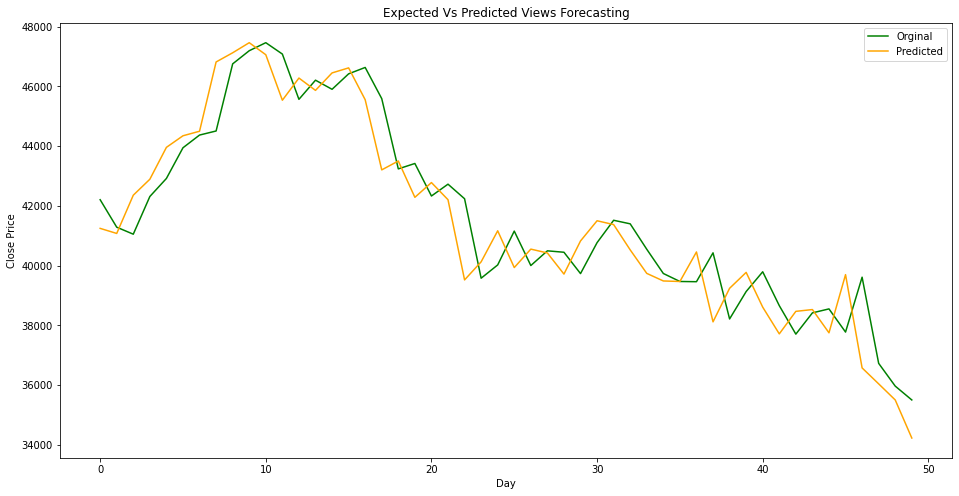

In [128]:
size = int(len(ts_log_btc)-100)

train_btc_arima, test_btc_arima = ts_log_btc[0:-50], ts_log_btc[-50:len(ts_log_btc)]
history = [x for x in train_btc_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_btc_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_btc_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_btc_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [129]:
#RMSE

math.sqrt(mean_squared_error(originals,predictions))

1123.8728120809037

### ETH

<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2017-11-09  320.884003
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003


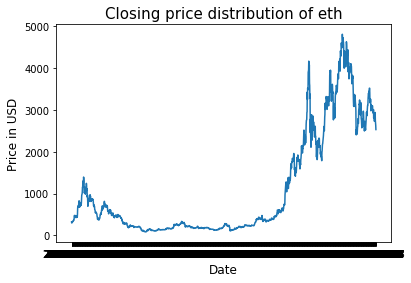

In [130]:
data_eth = eth['Close']
Date_eth = eth['Date']
train_eth = eth[['Date','Close']]
# Setting the Date as Index
eth_ARIMA = train_eth.set_index('Date')
eth_ARIMA.sort_index(inplace=True)
print (type(eth_ARIMA))
print (eth_ARIMA.head())
plot.plot(eth_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of eth", fontsize=15)
plot.show()

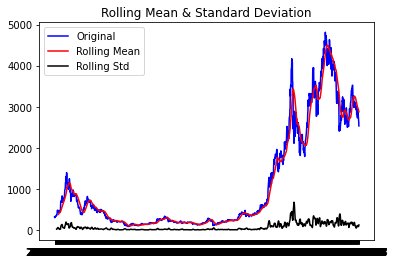

ADF Stastistic: -0.913483
p-value: 0.783500
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [131]:
ts_eth= eth_ARIMA['Close']
test_stationarity(ts_eth)

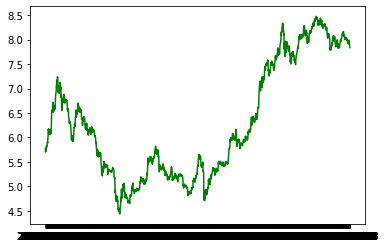

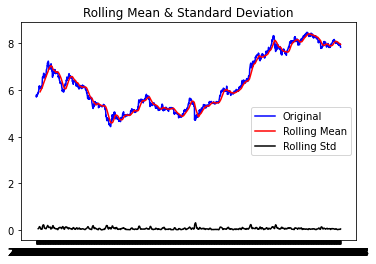

ADF Stastistic: -0.595325
p-value: 0.872035
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [132]:
ts_log_eth = dragon.log(ts_eth)
plot.plot(ts_log_eth,color="green")
plot.show()

test_stationarity(ts_log_eth)

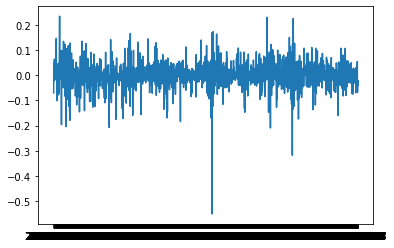

In [133]:
ts_log_eth_diff = ts_log_eth - ts_log_eth.shift()
plot.plot(ts_log_eth_diff)
plot.show()

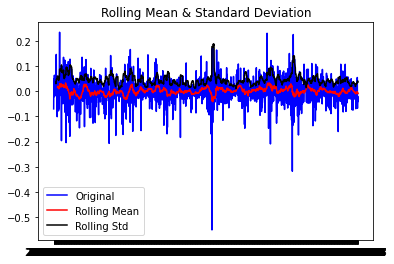

ADF Stastistic: -12.049454
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [134]:
ts_log_eth_diff.dropna(inplace=True)
test_stationarity(ts_log_eth_diff)

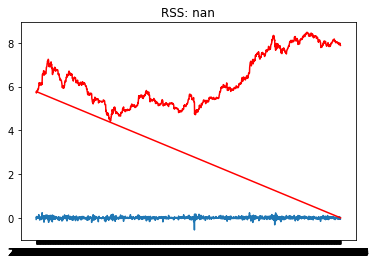

In [135]:
model_eth = sm.tsa.arima.ARIMA(ts_log_eth, order=(2,1,0))
results_eth_ARIMA = model_eth.fit()
plot.plot(ts_log_eth_diff)
plot.plot(results_eth_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_eth_ARIMA.fittedvalues-ts_log_eth_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 2954.208634,   expected = 27.794453,   error = 10528.770675  %
predicted = 33.980194,   expected = 27.984760,   error = 21.423924  %
predicted = 26.402305,   expected = 28.044510,   error = 5.855710  %
predicted = 28.044327,   expected = 28.210022,   error = 0.587364  %
predicted = 28.208721,   expected = 29.193338,   error = 3.372747  %
predicted = 29.185186,   expected = 28.131601,   error = 3.745200  %
predicted = 28.142069,   expected = 28.818962,   error = 2.348776  %
predicted = 28.811208,   expected = 29.893732,   error = 3.621240  %
predicted = 29.885637,   expected = 29.455870,   error = 1.459021  %
predicted = 29.461342,   expected = 30.267681,   error = 2.664027  %
predicted = 30.259916,   expected = 30.103006,   error = 0.521242  %
predicted = 30.105786,   expected = 28.895994,   error = 4.186712  %
predicted = 28.905814,   expected = 29.387047,   error = 1.637567  %
predicted = 29.380844,   expected = 31.389738,   erro

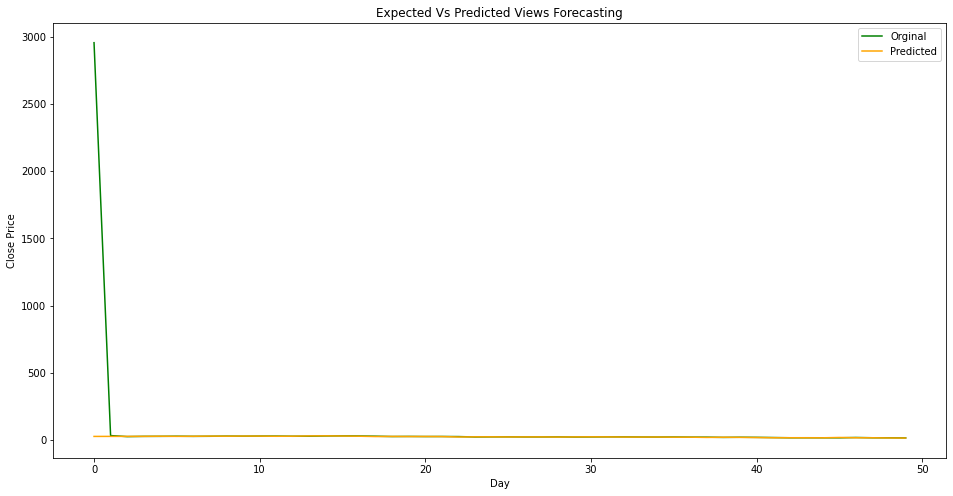

In [136]:
size = int(len(ts_log_eth)-100)

train_eth_arima, test_eth_arima = ts_log_eth[0:-50], ts_log_eth[-50:len(ts_log_eth)]
history = [x for x in train_eth_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_eth_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_atom_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_eth_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [137]:
#RMSE

math.sqrt(mean_squared_error(originals,predictions))

413.85974500564856

### LINK

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2017-11-09  0.223969
2017-11-10  0.187602
2017-11-11  0.179770
2017-11-12  0.170898
2017-11-13  0.183071


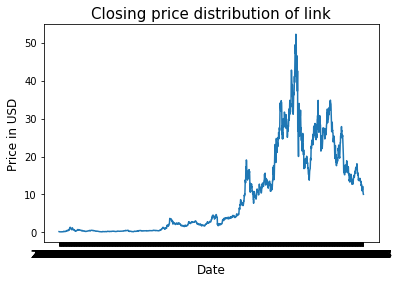

In [138]:
data_link = link['Close']
Date_link = atom['Date']
train_link = link[['Date','Close']]
# Setting the Date as Index
link_ARIMA = train_link.set_index('Date')
link_ARIMA.sort_index(inplace=True)
print (type(link_ARIMA))
print (link_ARIMA.head())
plot.plot(link_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of link", fontsize=15)
plot.show()

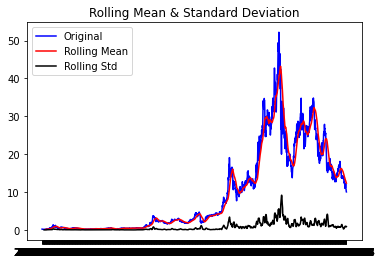

ADF Stastistic: -1.638338
p-value: 0.463129
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [139]:
ts_link= link_ARIMA['Close']
test_stationarity(ts_link)

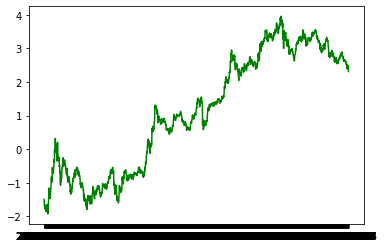

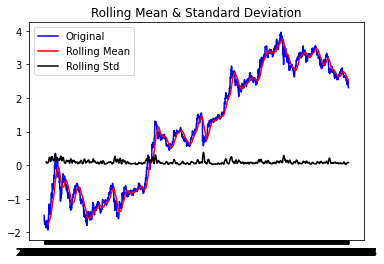

ADF Stastistic: -1.519347
p-value: 0.523920
The graph is non stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [140]:
ts_log_link = dragon.log(ts_link)
plot.plot(ts_log_link,color="green")
plot.show()

test_stationarity(ts_log_link)

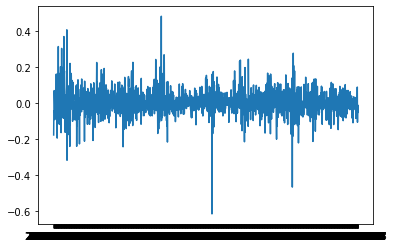

In [141]:
ts_log_link_diff = ts_log_link - ts_log_link.shift()
plot.plot(ts_log_link_diff)
plot.show()

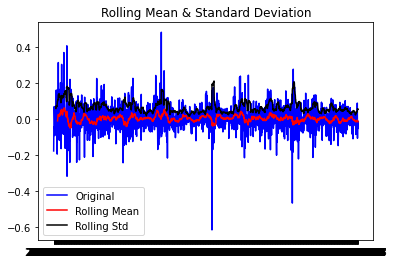

ADF Stastistic: -18.835714
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


In [142]:
ts_log_link_diff.dropna(inplace=True)
test_stationarity(ts_log_link_diff)

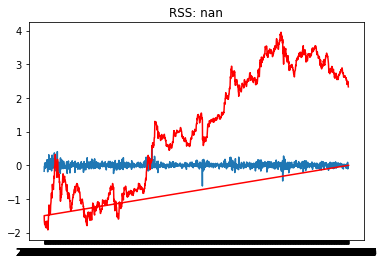

In [143]:
model_link = sm.tsa.arima.ARIMA(ts_log_link, order=(2,1,0))
results_link_ARIMA = model_link.fit()
plot.plot(ts_log_link_diff)
plot.plot(results_link_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_link_ARIMA.fittedvalues-ts_log_link_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 15.000240,   expected = 27.794453,   error = 46.031532  %
predicted = 26.745008,   expected = 27.984760,   error = 4.430097  %
predicted = 28.645238,   expected = 28.044510,   error = 2.142051  %
predicted = 28.048045,   expected = 28.210022,   error = 0.574183  %
predicted = 28.202452,   expected = 29.193338,   error = 3.394220  %
predicted = 29.140750,   expected = 28.131601,   error = 3.587242  %
predicted = 28.228921,   expected = 28.818962,   error = 2.047405  %
predicted = 28.738438,   expected = 29.893732,   error = 3.864671  %
predicted = 29.855647,   expected = 29.455870,   error = 1.357209  %
predicted = 29.521304,   expected = 30.267681,   error = 2.465920  %
predicted = 30.202589,   expected = 30.103006,   error = 0.330806  %
predicted = 30.142931,   expected = 28.895994,   error = 4.315257  %
predicted = 28.960238,   expected = 29.387047,   error = 1.452371  %
predicted = 29.313629,   expected = 31.389738,   error = 6.

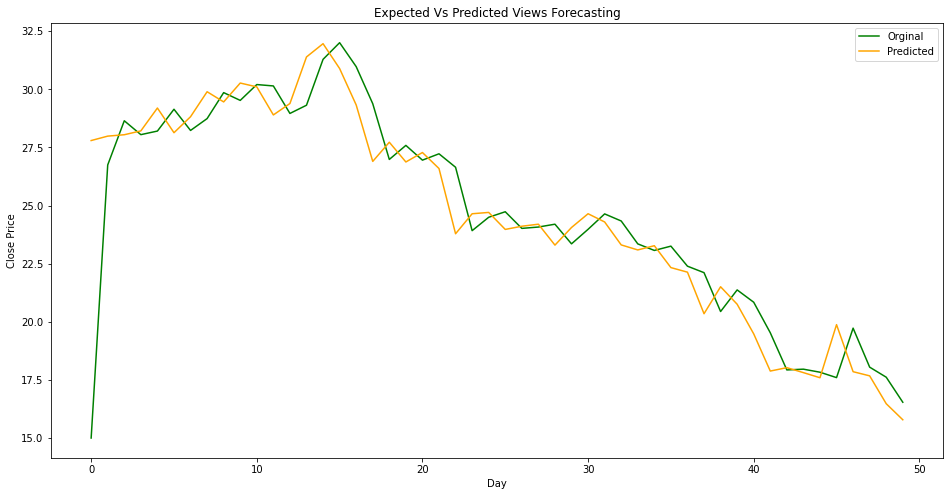

In [144]:
size = int(len(ts_log_link)-100)

train_link_arima, test_link_arima = ts_log_link[0:-50], ts_log_link[-50:len(ts_log_link)]
history = [x for x in train_link_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_link_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_atom_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_link_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [145]:
#RMSE

math.sqrt(mean_squared_error(originals,predictions))

2.104780274665765

#### LINK prediction

In [146]:
#Following 2 days
pred = model_fit.forecast(3)
future_Link=list(np.exp(pred[0:]))
future_Link

[16.53894893787088, 16.492447632096145, 16.497536078384293]

### Luna1

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2019-07-26  1.327436
2019-07-27  1.310566
2019-07-28  1.272989
2019-07-29  1.294661
2019-07-30  1.294193


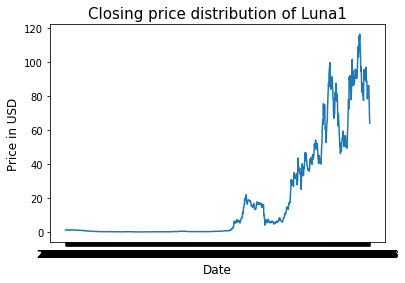

In [147]:
data_luna1 = luna1['Close']
Date_luna1 = luna1['Date']
train_luna1 = luna1[['Date','Close']]
# Setting the Date as Index
luna1_ARIMA = train_luna1.set_index('Date')
luna1_ARIMA.sort_index(inplace=True)
print (type(luna1_ARIMA))
print (luna1_ARIMA.head())
plot.plot(luna1_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Luna1", fontsize=15)
plot.show()

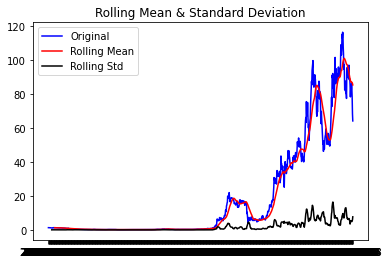

ADF Stastistic: -0.790743
p-value: 0.821826
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [148]:
ts_luna1= luna1_ARIMA['Close']
test_stationarity(ts_luna1)

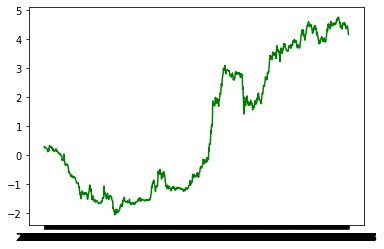

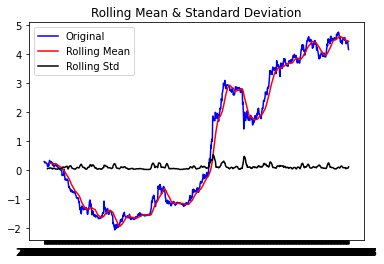

ADF Stastistic: -0.206379
p-value: 0.937757
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [149]:
ts_log_luna1 = dragon.log(ts_luna1)
plot.plot(ts_log_luna1,color="green")
plot.show()

test_stationarity(ts_log_luna1)

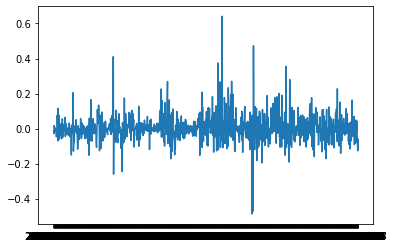

In [150]:
ts_log_luna1_diff = ts_log_luna1 - ts_log_luna1.shift()
plot.plot(ts_log_luna1_diff)
plot.show()

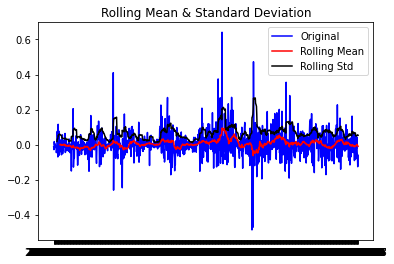

ADF Stastistic: -6.765467
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [151]:
ts_log_luna1_diff.dropna(inplace=True)
test_stationarity(ts_log_luna1_diff)

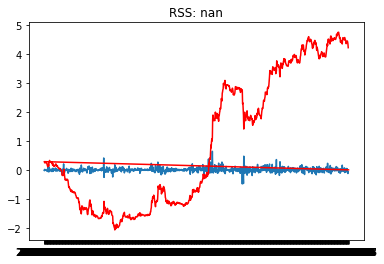

In [152]:
model_luna1 = sm.tsa.arima.ARIMA(ts_log_luna1, order=(2,1,0))
results_luna1_ARIMA = model_luna1.fit()
plot.plot(ts_log_luna1_diff)
plot.plot(results_luna1_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_luna1_ARIMA.fittedvalues-ts_log_luna1_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 92.120110,   expected = 90.532280,   error = 1.753882  %
predicted = 90.763852,   expected = 95.948746,   error = 5.403816  %
predicted = 95.726206,   expected = 93.002525,   error = 2.928610  %
predicted = 93.375313,   expected = 94.924919,   error = 1.632454  %
predicted = 94.712381,   expected = 93.862015,   error = 0.905975  %
predicted = 93.995439,   expected = 90.418900,   error = 3.955522  %
predicted = 90.441658,   expected = 91.387917,   error = 1.035431  %
predicted = 91.173063,   expected = 94.151543,   error = 3.163495  %
predicted = 94.141311,   expected = 97.328468,   error = 3.274641  %
predicted = 97.415123,   expected = 108.988426,   error = 10.618837  %
predicted = 108.910974,   expected = 106.015793,   error = 2.730896  %
predicted = 106.764586,   expected = 103.011383,   error = 3.643483  %
predicted = 102.921279,   expected = 105.775368,   error = 2.698254  %
predicted = 105.540772,   expected = 115.190414,   e

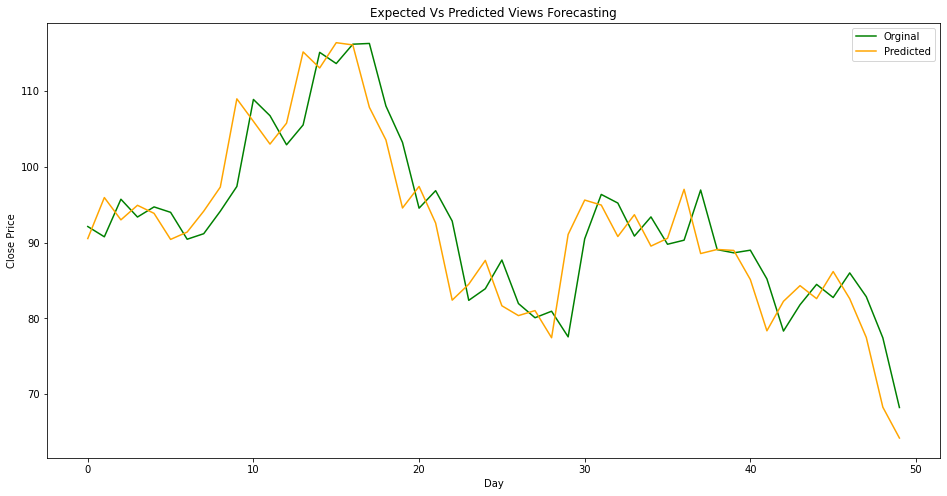

In [153]:
size = int(len(ts_log_atom)-100)

train_luna1_arima, test_luna1_arima = ts_log_luna1[0:-50], ts_log_luna1[-50:len(ts_log_luna1)]
history = [x for x in train_luna1_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_luna1_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_luna1_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_luna1_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [154]:
#RMSE

math.sqrt(mean_squared_error(originals,predictions))

5.147912015068515

#### LUNA1 prediction

In [155]:
#Following 2 days
pred = model_fit.forecast(3)
future_luna1=list(np.exp(pred[0:]))
future_luna1

[68.21000575721219, 67.75397457530657, 67.76203313189718]

### Matic

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2019-04-28  0.004421
2019-04-29  0.003471
2019-04-30  0.004478
2019-05-01  0.004374
2019-05-02  0.004198


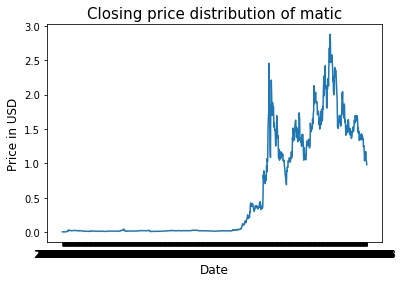

In [156]:
data_matic = matic['Close']
Date_matic = matic['Date']
train_matic = matic[['Date','Close']]
# Setting the Date as Index
matic_ARIMA = train_matic.set_index('Date')
matic_ARIMA.sort_index(inplace=True)
print (type(matic_ARIMA))
print (matic_ARIMA.head())
plot.plot(matic_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of matic", fontsize=15)
plot.show()

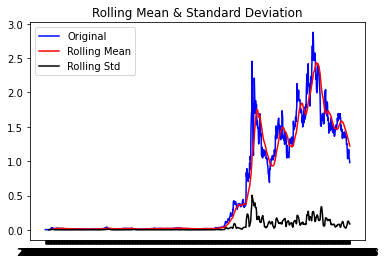

ADF Stastistic: -1.261966
p-value: 0.646388
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [157]:
ts_matic= matic_ARIMA['Close']
test_stationarity(ts_matic)

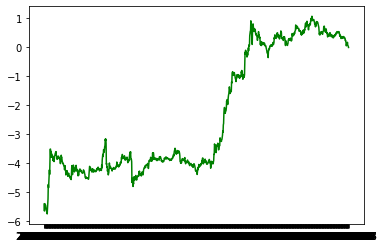

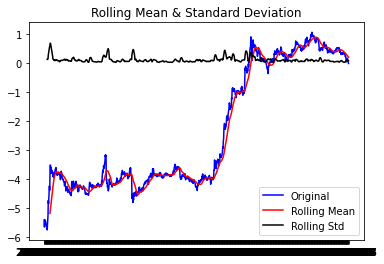

ADF Stastistic: -1.052333
p-value: 0.733702
The graph is non stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [158]:
ts_log_matic = dragon.log(ts_matic)
plot.plot(ts_log_matic,color="green")
plot.show()

test_stationarity(ts_log_matic)

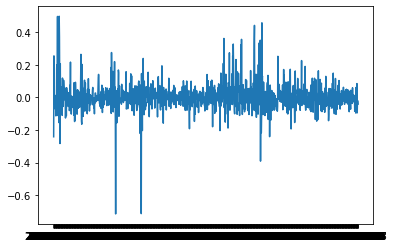

In [159]:
ts_log_matic_diff = ts_log_matic - ts_log_matic.shift()
plot.plot(ts_log_matic_diff)
plot.show()

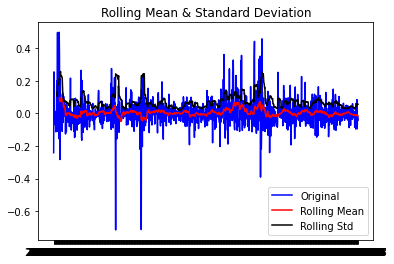

ADF Stastistic: -15.140694
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.436 
	5%: -2.864 
	10%: -2.568 


In [160]:
ts_log_matic_diff.dropna(inplace=True)
test_stationarity(ts_log_matic_diff)

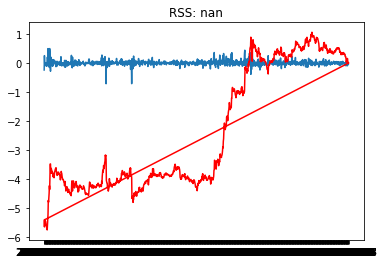

In [161]:
model_matic = sm.tsa.arima.ARIMA(ts_log_matic, order=(2,1,0))
results_matic_ARIMA = model_matic.fit()
plot.plot(ts_log_matic_diff)
plot.plot(results_matic_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_atom_ARIMA.fittedvalues-ts_log_matic_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 1.533107,   expected = 1.463919,   error = 4.726227  %
predicted = 1.467917,   expected = 1.466493,   error = 0.097122  %
predicted = 1.459833,   expected = 1.505448,   error = 3.030016  %
predicted = 1.505044,   expected = 1.556303,   error = 3.293624  %
predicted = 1.559714,   expected = 1.628765,   error = 4.239485  %
predicted = 1.633214,   expected = 1.579573,   error = 3.395940  %
predicted = 1.587996,   expected = 1.610803,   error = 1.415888  %
predicted = 1.605065,   expected = 1.693481,   error = 5.220938  %
predicted = 1.695517,   expected = 1.660387,   error = 2.115781  %
predicted = 1.669713,   expected = 1.674787,   error = 0.302939  %
predicted = 1.671067,   expected = 1.684619,   error = 0.804461  %
predicted = 1.685978,   expected = 1.617286,   error = 4.247393  %
predicted = 1.619421,   expected = 1.693914,   error = 4.397667  %
predicted = 1.685304,   expected = 1.654025,   error = 1.891058  %
predicted = 1.66279

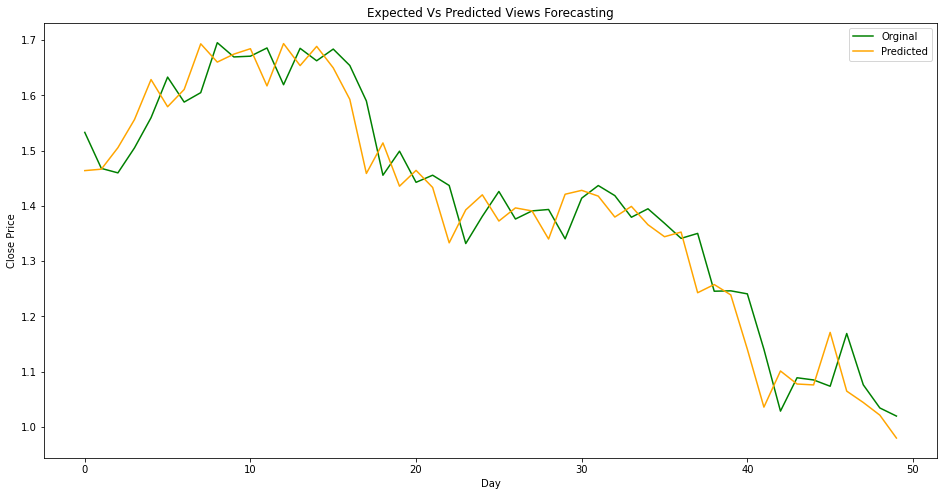

In [162]:
size = int(len(ts_log_matic)-100)

train_matic_arima, test_matic_arima = ts_log_matic[0:-50], ts_log_matic[-50:len(ts_log_matic)]
history = [x for x in train_matic_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_matic_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_matic_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_matic_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [163]:
#RMSE

math.sqrt(mean_squared_error(originals,predictions))

0.05717960062552063

### Sol

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2020-04-10  0.951054
2020-04-11  0.776819
2020-04-12  0.882507
2020-04-13  0.777832
2020-04-14  0.661925


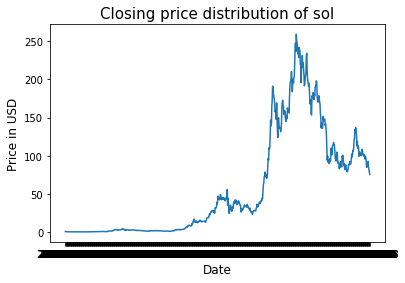

In [164]:
data_sol = sol['Close']
Date_sol = sol['Date']
train_sol = sol[['Date','Close']]
# Setting the Date as Index
sol_ARIMA = train_sol.set_index('Date')
sol_ARIMA.sort_index(inplace=True)
print (type(sol_ARIMA))
print (sol_ARIMA.head())
plot.plot(sol_ARIMA)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of sol", fontsize=15)
plot.show()

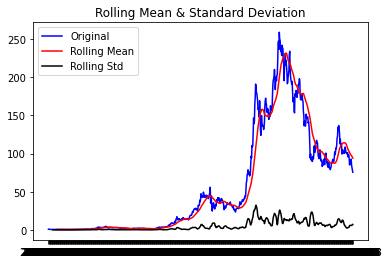

ADF Stastistic: -1.320830
p-value: 0.619590
The graph is non stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [165]:
ts_sol= sol_ARIMA['Close']
test_stationarity(ts_sol)

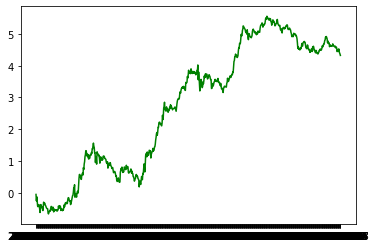

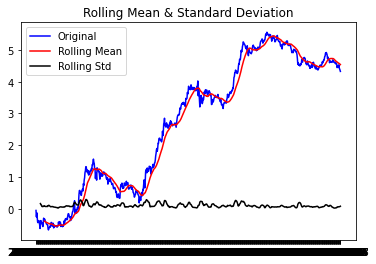

ADF Stastistic: -1.491832
p-value: 0.537548
The graph is non stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [166]:
ts_log_sol = dragon.log(ts_sol)
plot.plot(ts_log_sol,color="green")
plot.show()

test_stationarity(ts_log_sol)

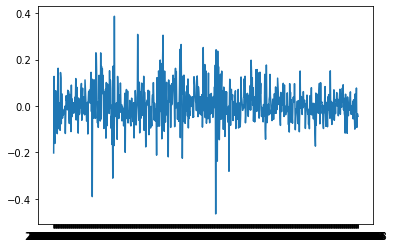

In [167]:
ts_log_sol_diff = ts_log_sol - ts_log_sol.shift()
plot.plot(ts_log_sol_diff)
plot.show()

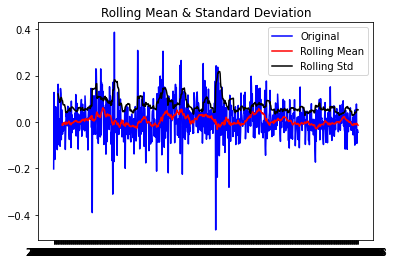

ADF Stastistic: -5.766348
p-value: 0.000001
The graph is stationery
Critical values:
	1%: -3.439 
	5%: -2.865 
	10%: -2.569 


In [168]:
ts_log_sol_diff.dropna(inplace=True)
test_stationarity(ts_log_sol_diff)

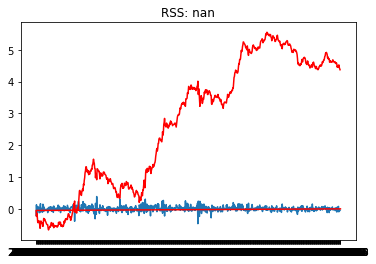

In [169]:
model_sol = sm.tsa.arima.ARIMA(ts_log_sol, order=(2,1,0))
results_sol_ARIMA = model_sol.fit()
plot.plot(ts_log_sol_diff)
plot.plot(results_sol_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_sol_ARIMA.fittedvalues-ts_log_sol_diff)**2))
plot.show()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

Printing Predicted vs Expected Values...


predicted = 92.248535,   expected = 88.614861,   error = 4.100525  %
predicted = 88.909808,   expected = 88.757202,   error = 0.171937  %
predicted = 88.710350,   expected = 90.512970,   error = 1.991560  %
predicted = 90.386055,   expected = 95.102684,   error = 4.959512  %
predicted = 94.781449,   expected = 102.223694,   error = 7.280352  %
predicted = 101.748145,   expected = 98.658104,   error = 3.132071  %
predicted = 98.979402,   expected = 101.764183,   error = 2.736504  %
predicted = 101.500881,   expected = 107.084221,   error = 5.213970  %
predicted = 106.725441,   expected = 106.465256,   error = 0.244385  %
predicted = 106.562242,   expected = 111.710312,   error = 4.608410  %
predicted = 111.318600,   expected = 120.699486,   error = 7.772101  %
predicted = 120.096384,   expected = 122.661461,   error = 2.091184  %
predicted = 122.620360,   expected = 134.430939,   error = 8.785610  %
predicted = 133.593642,   expected = 132.1988

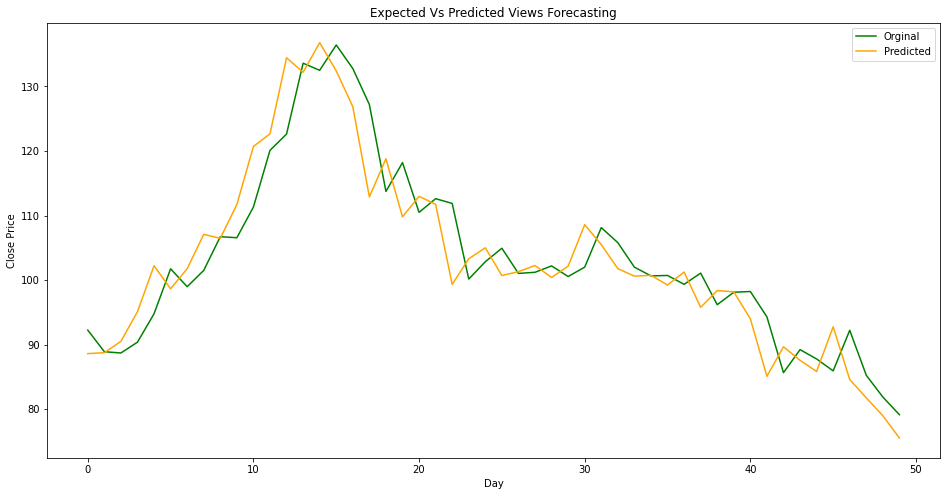

In [170]:
size = int(len(ts_log_sol)-100)

train_sol_arima, test_sol_arima = ts_log_sol[0:-50], ts_log_sol[-50:len(ts_log_sol)]
history = [x for x in train_sol_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test_sol_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()

    pred_value = output[0]


    original_value = test_sol_arima[t]
    history.append(original_value)

    pred_value = dragon.exp(pred_value)


    original_value = dragon.exp(original_value)

    # Calculate the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(16, 8))
test_day = [t
           for t in range(len(test_sol_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Close Price')
plot.legend(labels)
plot.show()

In [171]:
#RMSE
math.sqrt(mean_squared_error(originals,predictions))

5.195207010300517

#### SOL prediction

In [172]:
#Following 2 days
pred = model_fit.forecast(3)
future_SOL=list(np.exp(pred[0:]))
future_SOL

[79.15144759198688, 79.1063908145472, 79.11169858005786]

# LSTM

In [173]:
import matplotlib.pyplot as plt
import ta
import pandas_ta as pta
from finta import TA
from datetime import date
from datetime import datetime
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

2022-09-14 00:27:33.189850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 00:27:33.189878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### ADA

In [174]:
ada_model = ada[['Date', 'Close']]
ada_model

Date     Close
184   2017-11-09  0.032053
185   2017-11-10  0.027119
186   2017-11-11  0.027437
187   2017-11-12  0.023977
188   2017-11-13  0.025808
...          ...       ...
1821  2022-05-04  0.896942
1822  2022-05-05  0.791152
1823  2022-05-06  0.783359
1824  2022-05-07  0.761882
1825  2022-05-08  0.744362

[1642 rows x 2 columns]

In [175]:
ada_model['Date'] = pd.to_datetime(ada_model['Date'])

In [176]:
ada_model.index = ada_model.pop('Date')
ada_model

Close
Date                
2017-11-09  0.032053
2017-11-10  0.027119
2017-11-11  0.027437
2017-11-12  0.023977
2017-11-13  0.025808
...              ...
2022-05-04  0.896942
2022-05-05  0.791152
2022-05-06  0.783359
2022-05-07  0.761882
2022-05-08  0.744362

[1642 rows x 1 columns]

In [177]:
ada_model_values = ada_model.values

In [178]:
ada_model_values

array([[0.032053  ],
       [0.027119  ],
       [0.027437  ],
       ...,
       [0.78335899],
       [0.76188201],
       [0.74436247]])

In [179]:
training_data_len = math.ceil( len(ada_model_values)* .7)
training_data_len

1150

In [180]:
train_data = ada_model_values[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.032053  , 0.027119  , 0.027437  , 0.023977  , 0.025808  ,
       0.02623   , 0.026445  , 0.02758   , 0.025773  , 0.026369  ,
       0.028084  , 0.029581  , 0.02833   , 0.028549  , 0.027444  ,
       0.028382  , 0.030447  , 0.036332  , 0.050593  , 0.119744  ,
       0.089718  , 0.119883  , 0.13135201, 0.132351  , 0.131807  ,
       0.13586999, 0.127488  , 0.117839  , 0.105501  , 0.115465  ,
       0.119609  , 0.110281  , 0.121383  , 0.133891  , 0.13428099,
       0.240753  , 0.213467  , 0.40466499, 0.51301098, 0.51819801,
       0.53127301, 0.48615101, 0.477851  , 0.40715   , 0.41402701,
       0.39002901, 0.416363  , 0.42846501, 0.41417599, 0.40770099,
       0.52929902, 0.63924301, 0.71969497, 0.72865701, 0.78258699,
       1.07966006, 1.11412001, 0.99955899, 1.02715003, 1.00852001])]
[0.8990020155906677]

[array([0.032053  , 0.027119  , 0.027437  , 0.023977  , 0.025808  ,
       0.02623   , 0.026445  , 0.02758   , 0.025773  , 0.026369  ,
       0.028084  , 0.029581  , 0.028

In [181]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [182]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1090, 60, 1)

In [183]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

2022-09-14 00:27:34.474158: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 00:27:34.474613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 00:27:34.474692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-14 00:27:34.474758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-14 00:27:34.474827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [184]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [185]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1090/1090 [==============================] - 41s 36ms/step - loss: 0.0016


In [186]:
test_data = ada_model_values[training_data_len - 60: , :]

x_test = []
y_test = ada_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [187]:
x_test = np.array(x_test)

In [188]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(492, 60, 1)

In [189]:
predictions = model.predict(x_test)

16/16 [==============================] - 1s 14ms/step


In [190]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.1161264605456736

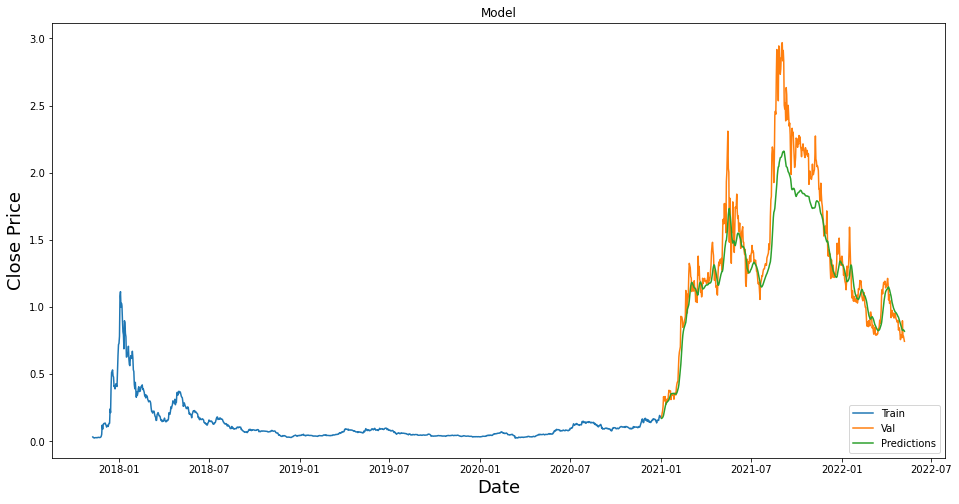

In [191]:
train = ada_model[:training_data_len]
valid = ada_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [192]:
valid

Close  Predictions
Date                             
2021-01-02  0.177423     0.170568
2021-01-03  0.204995     0.172466
2021-01-04  0.224762     0.176578
2021-01-05  0.258314     0.183440
2021-01-06  0.331898     0.194483
...              ...          ...
2022-05-04  0.896942     0.825312
2022-05-05  0.791152     0.830212
2022-05-06  0.783359     0.829168
2022-05-07  0.761882     0.825734
2022-05-08  0.744362     0.819144

[492 rows x 2 columns]

In [193]:
last_days = ada_model[-60:].values
X_test = []
X_test.append(last_days)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 54ms/step
[[0.8099832]]


### ATOM

In [194]:
atom_model = atom[['Date', 'Close']]
atom_model

Date      Close
674   2019-03-14   6.526642
675   2019-03-15   7.504351
676   2019-03-16   7.383882
677   2019-03-17   4.776164
678   2019-03-18   5.110341
...          ...        ...
1821  2022-05-04  19.876862
1822  2022-05-05  17.853285
1823  2022-05-06  17.674110
1824  2022-05-07  16.475998
1825  2022-05-08  15.785578

[1152 rows x 2 columns]

In [195]:
atom_model['Date'] = pd.to_datetime(atom_model['Date'])

In [196]:
atom_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 674 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1152 non-null   datetime64[ns]
 1   Close   1152 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.0 KB


In [197]:
atom_model.index = atom_model.pop('Date')
atom_model

Close
Date                 
2019-03-14   6.526642
2019-03-15   7.504351
2019-03-16   7.383882
2019-03-17   4.776164
2019-03-18   5.110341
...               ...
2022-05-04  19.876862
2022-05-05  17.853285
2022-05-06  17.674110
2022-05-07  16.475998
2022-05-08  15.785578

[1152 rows x 1 columns]

In [198]:
atom_model_values = atom_model.values
atom_model_values

array([[ 6.52664185],
       [ 7.50435114],
       [ 7.38388205],
       ...,
       [17.67411041],
       [16.47599792],
       [15.78557777]])

In [199]:
training_data_len = math.ceil( len(atom_model_values)* .7)
training_data_len

807

In [200]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(atom_model_values)
scaled_data

array([[0.11371021],
       [0.13650405],
       [0.13369549],
       ...,
       [0.37359682],
       [0.34566461],
       [0.3295685 ]])

In [201]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.11371021, 0.13650405, 0.13369549, 0.07290043, 0.08069127,
       0.07396631, 0.06369698, 0.04624806, 0.04311467, 0.04187836,
       0.04933232, 0.04963768, 0.04883481, 0.04960457, 0.04297107,
       0.04407731, 0.04236955, 0.04604705, 0.04839838, 0.04984415,
       0.04937216, 0.04891389, 0.05033946, 0.06523474, 0.06917487,
       0.08861112, 0.05117071, 0.04897189, 0.04337735, 0.06195176,
       0.06187019, 0.06559219, 0.06295608, 0.06456509, 0.06286686,
       0.06325596, 0.07523069, 0.08827381, 0.08315033, 0.06374534,
       0.05765263, 0.04633537, 0.03859073, 0.04625941, 0.04161226,
       0.06484052, 0.04892652, 0.05333821, 0.06390048, 0.06866889,
       0.08536572, 0.08418016, 0.07470818, 0.07171652, 0.06910877,
       0.06307787, 0.05239021, 0.05090997, 0.05521984, 0.04951314])]
[0.053334781956662164]



In [202]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [203]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(747, 60, 1)

In [204]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [205]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [206]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

747/747 [==============================] - 31s 38ms/step - loss: 0.0027


In [207]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = atom_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [208]:
x_test = np.array(x_test)

In [209]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(345, 60, 1)

In [210]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 30ms/step


In [211]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.14222587364307346

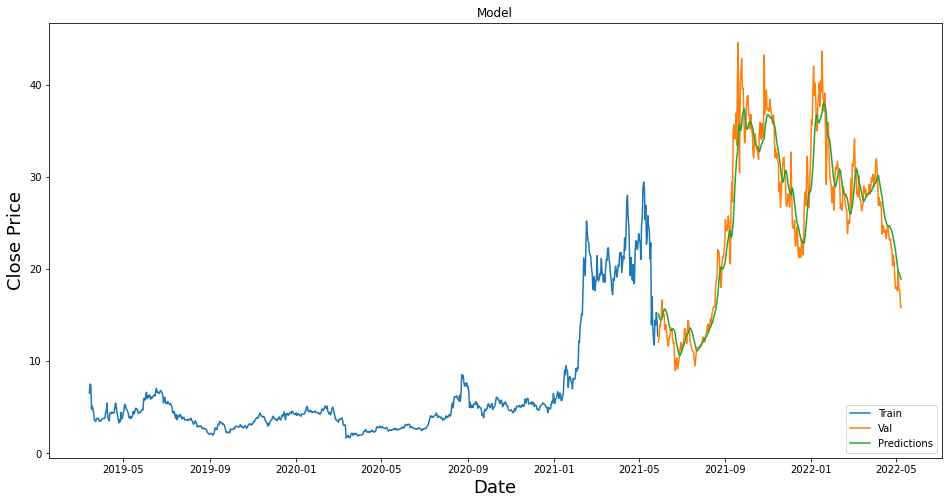

In [212]:
train = atom_model[:training_data_len]
valid = atom_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [213]:
valid

Close  Predictions
Date                              
2021-05-29  12.068324    15.126681
2021-05-30  12.588837    14.824253
2021-05-31  13.994122    14.549449
2021-06-01  13.757418    14.471323
2021-06-02  14.852793    14.469247
...               ...          ...
2022-05-04  19.876862    19.719362
2022-05-05  17.853285    19.580353
2022-05-06  17.674110    19.402760
2022-05-07  16.475998    19.210321
2022-05-08  15.785578    18.893652

[345 rows x 2 columns]

In [214]:
last_days = atom_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 44ms/step
[[18.472782]]


### AVAX

In [215]:
avax_model = avax[['Date', 'Close']]
avax_model

Date      Close
1161  2020-07-13   4.896294
1162  2020-07-14   4.986754
1232  2020-09-22   5.234632
1233  2020-09-23   4.118469
1234  2020-09-24   4.566561
...          ...        ...
1821  2022-05-04  67.086105
1822  2022-05-05  59.127441
1823  2022-05-06  57.034325
1824  2022-05-07  55.156693
1825  2022-05-08  51.730221

[596 rows x 2 columns]

In [216]:
avax_model['Date'] = pd.to_datetime(avax_model['Date'])
avax_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 1161 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    596 non-null    datetime64[ns]
 1   Close   596 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [217]:
avax_model.index = avax_model.pop('Date')
avax_model

Close
Date                 
2020-07-13   4.896294
2020-07-14   4.986754
2020-09-22   5.234632
2020-09-23   4.118469
2020-09-24   4.566561
...               ...
2022-05-04  67.086105
2022-05-05  59.127441
2022-05-06  57.034325
2022-05-07  55.156693
2022-05-08  51.730221

[596 rows x 1 columns]

In [218]:
avax_model_values = avax_model.values
avax_model_values

array([[  4.89629412],
       [  4.98675394],
       [  5.23463202],
       [  4.11846924],
       [  4.56656122],
       [  4.71227884],
       [  4.53924894],
       [  4.62553596],
       [  4.20480299],
       [  4.14295101],
       [  4.32254601],
       [  4.15109015],
       [  3.92715597],
       [  4.02165985],
       [  3.96111012],
       [  3.97801995],
       [  3.53765798],
       [  3.44681811],
       [  3.90427899],
       [  4.23530483],
       [  4.02670479],
       [  4.09587908],
       [  4.41574001],
       [  4.4880538 ],
       [  4.15005589],
       [  4.12735319],
       [  4.04048014],
       [  4.19600916],
       [  4.11606216],
       [  4.05031109],
       [  3.80220103],
       [  3.96595907],
       [  4.31442118],
       [  4.26210594],
       [  4.18970013],
       [  4.15321016],
       [  4.16097307],
       [  4.12224293],
       [  4.06660604],
       [  3.77531195],
       [  3.71493793],
       [  3.64836788],
       [  3.68266392],
       [  3

In [219]:
training_data_len = math.ceil( len(avax_model_values)* .7)
training_data_len

418

In [220]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(avax_model_values)
scaled_data

array([[1.51197336e-02],
       [1.58069884e-02],
       [1.76902044e-02],
       [9.21032719e-03],
       [1.26146380e-02],
       [1.37217055e-02],
       [1.24071371e-02],
       [1.30626896e-02],
       [9.86623476e-03],
       [9.39632375e-03],
       [1.07607694e-02],
       [9.45815958e-03],
       [7.75685370e-03],
       [8.47483258e-03],
       [8.01481515e-03],
       [8.14328508e-03],
       [4.79770184e-03],
       [4.10755978e-03],
       [7.58304934e-03],
       [1.00979679e-02],
       [8.51316072e-03],
       [9.03870188e-03],
       [1.14687968e-02],
       [1.20181898e-02],
       [9.45030195e-03],
       [9.27782168e-03],
       [8.61781684e-03],
       [9.79942497e-03],
       [9.19203981e-03],
       [8.69250600e-03],
       [6.80752753e-03],
       [8.05165437e-03],
       [1.06990423e-02],
       [1.03015852e-02],
       [9.75149305e-03],
       [9.47426609e-03],
       [9.53324362e-03],
       [9.23899722e-03],
       [8.81630446e-03],
       [6.60324179e-03],


In [221]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01511973, 0.01580699, 0.0176902 , 0.00921033, 0.01261464,
       0.01372171, 0.01240714, 0.01306269, 0.00986623, 0.00939632,
       0.01076077, 0.00945816, 0.00775685, 0.00847483, 0.00801482,
       0.00814329, 0.0047977 , 0.00410756, 0.00758305, 0.01009797,
       0.00851316, 0.0090387 , 0.0114688 , 0.01201819, 0.0094503 ,
       0.00927782, 0.00861782, 0.00979942, 0.00919204, 0.00869251,
       0.00680753, 0.00805165, 0.01069904, 0.01030159, 0.00975149,
       0.00947427, 0.00953324, 0.009239  , 0.0088163 , 0.00660324,
       0.00614456, 0.0056388 , 0.00589936, 0.00545303, 0.00324092,
       0.00211565, 0.00343434, 0.00523549, 0.00377776, 0.00433381,
       0.00388197, 0.00516605, 0.00439275, 0.00397328, 0.00601437,
       0.00451529, 0.00478951, 0.00615761, 0.00703216, 0.00640092])]
[0.005476493987976169]



In [222]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [223]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(358, 60, 1)

In [224]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [225]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [226]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

358/358 [==============================] - 14s 33ms/step - loss: 0.0052


In [227]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = avax_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [228]:
x_test = np.array(x_test)

In [229]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(178, 60, 1)

In [230]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 15ms/step


In [231]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6047731035211114

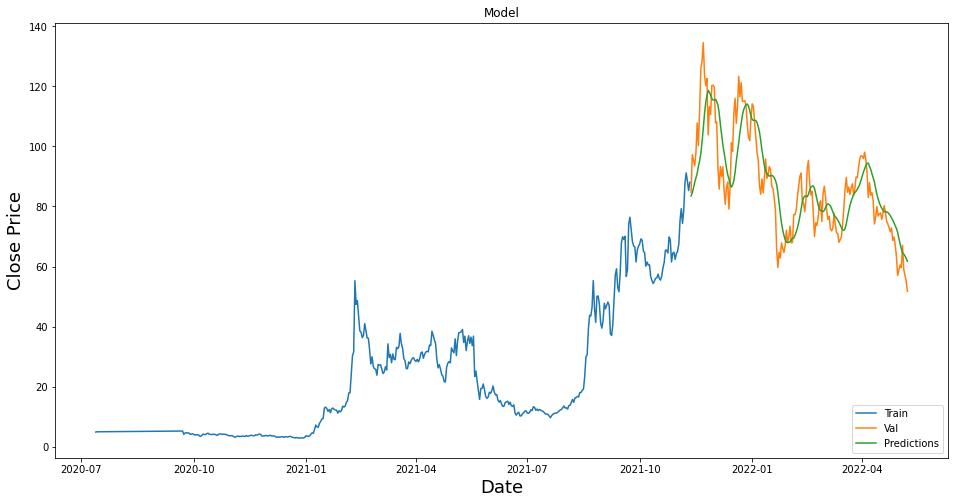

In [232]:
train = avax_model[:training_data_len]
valid = avax_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [233]:
valid

Close  Predictions
Date                              
2021-11-12  84.724915    83.474792
2021-11-13  97.260468    84.527977
2021-11-14  95.403542    86.258598
2021-11-15  93.550232    88.012314
2021-11-16  97.975571    89.463280
...               ...          ...
2022-05-04  67.086105    64.591606
2022-05-05  59.127441    64.139183
2022-05-06  57.034325    63.538647
2022-05-07  55.156693    62.744572
2022-05-08  51.730221    61.750095

[178 rows x 2 columns]

In [234]:
last_days = avax_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 19ms/step
[[60.437237]]


In [235]:
last_days = np.append(last_days, pred_price)
last_days

array([74.00409698, 71.23547363, 71.00219727, 68.0759964 , 68.89183807,
       69.88738251, 74.18374634, 79.53851318, 85.76238251, 89.69412231,
       84.7243042 , 86.4496994 , 83.98144531, 86.25101471, 87.5553894 ,
       83.66136932, 85.95565033, 89.82484436, 89.60455322, 92.84088898,
       95.77998352, 96.92465973, 96.6931839 , 95.9732666 , 98.07778168,
       95.5202179 , 91.02109528, 82.95590973, 87.91970825, 83.76922607,
       84.59462738, 81.81646729, 74.17261505, 76.36006165, 80.00197601,
       76.81785583, 77.43753815, 77.89026642, 75.70925903, 77.79367828,
       80.28591919, 78.27433014, 75.08074188, 74.12296295, 72.92001343,
       71.60303497, 72.86742401, 68.67205811, 69.85772705, 67.31945038,
       63.41709518, 57.04800415, 58.85614777, 60.5171051 , 59.66010666,
       67.08610535, 59.12744141, 57.03432465, 55.1566925 , 51.73022079,
       60.43723679])

In [236]:
last_days = last_days[1:]
last_days

array([71.23547363, 71.00219727, 68.0759964 , 68.89183807, 69.88738251,
       74.18374634, 79.53851318, 85.76238251, 89.69412231, 84.7243042 ,
       86.4496994 , 83.98144531, 86.25101471, 87.5553894 , 83.66136932,
       85.95565033, 89.82484436, 89.60455322, 92.84088898, 95.77998352,
       96.92465973, 96.6931839 , 95.9732666 , 98.07778168, 95.5202179 ,
       91.02109528, 82.95590973, 87.91970825, 83.76922607, 84.59462738,
       81.81646729, 74.17261505, 76.36006165, 80.00197601, 76.81785583,
       77.43753815, 77.89026642, 75.70925903, 77.79367828, 80.28591919,
       78.27433014, 75.08074188, 74.12296295, 72.92001343, 71.60303497,
       72.86742401, 68.67205811, 69.85772705, 67.31945038, 63.41709518,
       57.04800415, 58.85614777, 60.5171051 , 59.66010666, 67.08610535,
       59.12744141, 57.03432465, 55.1566925 , 51.73022079, 60.43723679])

In [237]:
last_days = last_days.reshape(-1, 1)
last_days

array([[71.23547363],
       [71.00219727],
       [68.0759964 ],
       [68.89183807],
       [69.88738251],
       [74.18374634],
       [79.53851318],
       [85.76238251],
       [89.69412231],
       [84.7243042 ],
       [86.4496994 ],
       [83.98144531],
       [86.25101471],
       [87.5553894 ],
       [83.66136932],
       [85.95565033],
       [89.82484436],
       [89.60455322],
       [92.84088898],
       [95.77998352],
       [96.92465973],
       [96.6931839 ],
       [95.9732666 ],
       [98.07778168],
       [95.5202179 ],
       [91.02109528],
       [82.95590973],
       [87.91970825],
       [83.76922607],
       [84.59462738],
       [81.81646729],
       [74.17261505],
       [76.36006165],
       [80.00197601],
       [76.81785583],
       [77.43753815],
       [77.89026642],
       [75.70925903],
       [77.79367828],
       [80.28591919],
       [78.27433014],
       [75.08074188],
       [74.12296295],
       [72.92001343],
       [71.60303497],
       [72

#### AVAX prediction

In [238]:
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[59.81538]]


### AXS

In [239]:
axs_model = axs[['Date', 'Close']]
axs_model

Date      Close
1275  2020-11-04   0.145949
1276  2020-11-05   0.135104
1277  2020-11-06   0.143164
1278  2020-11-07   0.141056
1279  2020-11-08   0.198251
...          ...        ...
1821  2022-05-04  33.363853
1822  2022-05-05  28.984409
1823  2022-05-06  28.462557
1824  2022-05-07  28.750196
1825  2022-05-08  30.405958

[551 rows x 2 columns]

In [240]:
axs_model['Date'] = pd.to_datetime(axs_model['Date'])
axs_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 1275 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [241]:
axs_model.index = axs_model.pop('Date')
axs_model

Close
Date                 
2020-11-04   0.145949
2020-11-05   0.135104
2020-11-06   0.143164
2020-11-07   0.141056
2020-11-08   0.198251
...               ...
2022-05-04  33.363853
2022-05-05  28.984409
2022-05-06  28.462557
2022-05-07  28.750196
2022-05-08  30.405958

[551 rows x 1 columns]

In [242]:
axs_model_values = axs_model.values
axs_model_values

array([[1.45949006e-01],
       [1.35104001e-01],
       [1.43163994e-01],
       [1.41056001e-01],
       [1.98250994e-01],
       [2.78508008e-01],
       [2.66624004e-01],
       [3.53062004e-01],
       [3.09358001e-01],
       [4.02658999e-01],
       [5.76206028e-01],
       [5.91579020e-01],
       [5.73116004e-01],
       [5.02668023e-01],
       [5.19073009e-01],
       [4.37335998e-01],
       [4.95541006e-01],
       [4.67741013e-01],
       [4.27962989e-01],
       [5.10855973e-01],
       [4.69132990e-01],
       [4.16119009e-01],
       [3.69287014e-01],
       [3.77626985e-01],
       [4.28636998e-01],
       [4.76123989e-01],
       [4.56400990e-01],
       [4.11354005e-01],
       [4.98109996e-01],
       [5.12404025e-01],
       [4.32307988e-01],
       [4.75694001e-01],
       [4.79391992e-01],
       [5.63158989e-01],
       [5.69972992e-01],
       [6.28394008e-01],
       [5.64397991e-01],
       [5.51329017e-01],
       [5.76097012e-01],
       [6.11443996e-01],


In [243]:
training_data_len = math.ceil( len(axs_model_values)* .7)
training_data_len

386

In [244]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(axs_model_values)
scaled_data

array([[6.76864540e-05],
       [0.00000000e+00],
       [5.03044808e-05],
       [3.71479586e-05],
       [3.94116542e-04],
       [8.95021096e-04],
       [8.20849987e-04],
       [1.36033166e-03],
       [1.08756380e-03],
       [1.66987920e-03],
       [2.75303061e-03],
       [2.84897738e-03],
       [2.73374498e-03],
       [2.29406110e-03],
       [2.39644882e-03],
       [1.88630722e-03],
       [2.24957957e-03],
       [2.07607269e-03],
       [1.82780787e-03],
       [2.34516419e-03],
       [2.08476038e-03],
       [1.75388656e-03],
       [1.46159610e-03],
       [1.51364799e-03],
       [1.83201453e-03],
       [2.12839299e-03],
       [2.00529671e-03],
       [1.72414695e-03],
       [2.26561329e-03],
       [2.35482598e-03],
       [1.85492612e-03],
       [2.12570933e-03],
       [2.14878944e-03],
       [2.67160069e-03],
       [2.71412863e-03],
       [3.07874914e-03],
       [2.67933362e-03],
       [2.59776681e-03],
       [2.75235020e-03],
       [2.97295978e-03],


In [245]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([6.76864540e-05, 0.00000000e+00, 5.03044808e-05, 3.71479586e-05,
       3.94116542e-04, 8.95021096e-04, 8.20849987e-04, 1.36033166e-03,
       1.08756380e-03, 1.66987920e-03, 2.75303061e-03, 2.84897738e-03,
       2.73374498e-03, 2.29406110e-03, 2.39644882e-03, 1.88630722e-03,
       2.24957957e-03, 2.07607269e-03, 1.82780787e-03, 2.34516419e-03,
       2.08476038e-03, 1.75388656e-03, 1.46159610e-03, 1.51364799e-03,
       1.83201453e-03, 2.12839299e-03, 2.00529671e-03, 1.72414695e-03,
       2.26561329e-03, 2.35482598e-03, 1.85492612e-03, 2.12570933e-03,
       2.14878944e-03, 2.67160069e-03, 2.71412863e-03, 3.07874914e-03,
       2.67933362e-03, 2.59776681e-03, 2.75235020e-03, 2.97295978e-03,
       3.14445688e-03, 3.71666148e-03, 3.79772943e-03, 3.60515548e-03,
       4.29733558e-03, 3.86535338e-03, 3.44502359e-03, 3.17889625e-03,
       3.25445923e-03, 2.46151373e-03, 3.11545999e-03, 2.90315139e-03,
       2.76467036e-03, 2.90412494e-03, 2.88728600e-03, 2.65662180e-03,
     

In [246]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [247]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(326, 60, 1)

In [248]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [249]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [250]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

326/326 [==============================] - 14s 36ms/step - loss: 0.0081


In [251]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = axs_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [252]:
x_test = np.array(x_test)

In [253]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(165, 60, 1)

In [254]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 2s 32ms/step


In [255]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.747388770363548

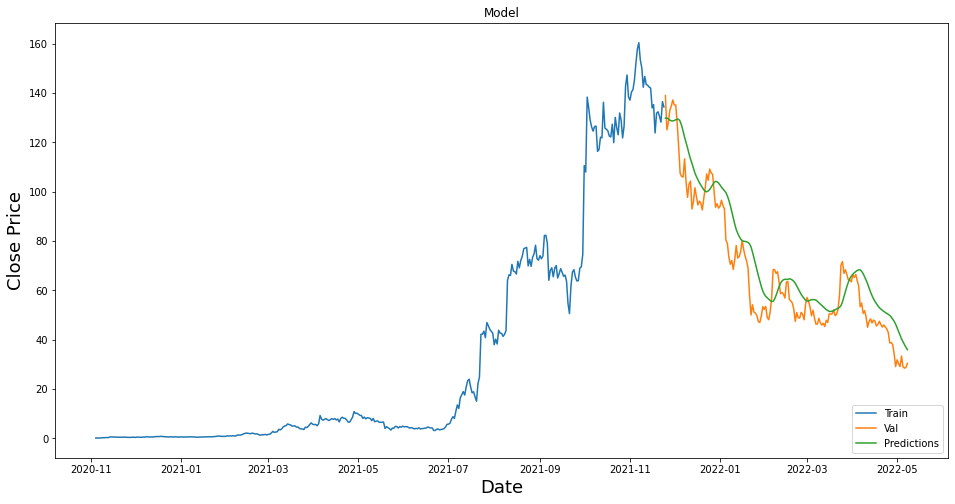

In [256]:
train = axs_model[:training_data_len]
valid = axs_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [257]:
valid

Close  Predictions
Date                               
2021-11-25  138.951233   129.774826
2021-11-26  125.032005   129.832260
2021-11-27  127.961426   129.462585
2021-11-28  133.007568   128.975494
2021-11-29  134.664810   128.688614
...                ...          ...
2022-05-04   33.363853    40.331432
2022-05-05   28.984409    39.145985
2022-05-06   28.462557    38.000587
2022-05-07   28.750196    36.909100
2022-05-08   30.405958    35.922077

[165 rows x 2 columns]

In [258]:
last_days = axs_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 35ms/step
[[35.14313]]


### BTC

In [259]:
btc

Date          Open          High           Low         Close  \
0     2017-05-09   1723.890015   1833.489990   1716.300049   1755.359985   
1     2017-05-10   1756.520020   1788.439941   1719.099976   1787.130005   
2     2017-05-11   1780.369995   1873.930054   1755.349976   1848.569946   
3     2017-05-12   1845.760010   1856.150024   1694.010010   1724.239990   
4     2017-05-13   1723.119995   1812.989990   1651.079956   1804.910034   
...          ...           ...           ...           ...           ...   
1821  2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094   
1822  2022-05-05  39695.746094  39789.281250  35856.515625  36575.140625   
1823  2022-05-06  36573.183594  36624.359375  35482.132812  36040.921875   
1824  2022-05-07  36042.503906  36129.925781  34940.824219  35501.953125   
1825  2022-05-08  35473.250000  35477.484375  33913.957031  34226.796875   

         Adj Close       Volume  
0      1755.359985   1167920000  
1      1787.130005    915723008  
2      1848.569946    799489984  
3      1724.239990    740984000  
4      1804.910034    579635008  
...            ...          ...  
1821  39698.371094  36754404490  
1822  36575.140625  43106256317  
1823  36040.921875  37795577489  
1824  35501.953125  24375896406  
1825  34226.796875  36945944576  

[1826 rows x 7 columns]

In [260]:
btc_model = btc[['Date', 'Close']]
btc_model

Date         Close
0     2017-05-09   1755.359985
1     2017-05-10   1787.130005
2     2017-05-11   1848.569946
3     2017-05-12   1724.239990
4     2017-05-13   1804.910034
...          ...           ...
1821  2022-05-04  39698.371094
1822  2022-05-05  36575.140625
1823  2022-05-06  36040.921875
1824  2022-05-07  35501.953125
1825  2022-05-08  34226.796875

[1826 rows x 2 columns]

In [261]:
btc_model['Date'] = pd.to_datetime(btc_model['Date'])

In [262]:
btc_model.index = btc_model.pop('Date')
btc_model

Close
Date                    
2017-05-09   1755.359985
2017-05-10   1787.130005
2017-05-11   1848.569946
2017-05-12   1724.239990
2017-05-13   1804.910034
...                  ...
2022-05-04  39698.371094
2022-05-05  36575.140625
2022-05-06  36040.921875
2022-05-07  35501.953125
2022-05-08  34226.796875

[1826 rows x 1 columns]

In [263]:
btc_model_values = btc_model.values
btc_model_values

array([[ 1755.35998535],
       [ 1787.13000488],
       [ 1848.56994629],
       ...,
       [36040.921875  ],
       [35501.953125  ],
       [34226.796875  ]])

In [264]:
training_data_len = math.ceil( len(btc_model_values)* .7)
training_data_len

1279

In [265]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(btc_model_values)

In [266]:
scaled_data

array([[4.72642343e-04],
       [9.55157086e-04],
       [1.88829084e-03],
       ...,
       [5.21192785e-01],
       [5.13007069e-01],
       [4.93640329e-01]])

In [267]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00047264, 0.00095516, 0.00188829, 0.        , 0.0012252 ,
       0.00128595, 0.00021551, 0.00015507, 0.00174431, 0.00249702,
       0.00400151, 0.00547503, 0.0048139 , 0.00682172, 0.00905462,
       0.01092606, 0.00882013, 0.00726247, 0.00477852, 0.00655442,
       0.00807031, 0.00685316, 0.00853809, 0.01038294, 0.01160814,
       0.01201517, 0.01196141, 0.01461926, 0.01729823, 0.01530802,
       0.01642372, 0.01669998, 0.01858174, 0.0187397 , 0.01420646,
       0.01507808, 0.01187879, 0.01124409, 0.01206393, 0.0141495 ,
       0.01251546, 0.01314286, 0.01515053, 0.01465404, 0.01490175,
       0.01550167, 0.01343325, 0.01313997, 0.01145474, 0.01257864,
       0.01291793, 0.01237922, 0.01149104, 0.010788  , 0.0118803 ,
       0.01275497, 0.01332572, 0.01333104, 0.01343082, 0.01206544])]
[0.012865534628171332]

[array([0.00047264, 0.00095516, 0.00188829, 0.        , 0.0012252 ,
       0.00128595, 0.00021551, 0.00015507, 0.00174431, 0.00249702,
       0.00400151, 0.00547503, 0.0

In [268]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [269]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1219, 60, 1)

In [270]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [271]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [272]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1219/1219 [==============================] - 47s 37ms/step - loss: 2.7445e-04


In [273]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = btc_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [274]:
x_test = np.array(x_test)

In [275]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(547, 60, 1)

In [276]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 23ms/step


In [277]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2849.03795382484

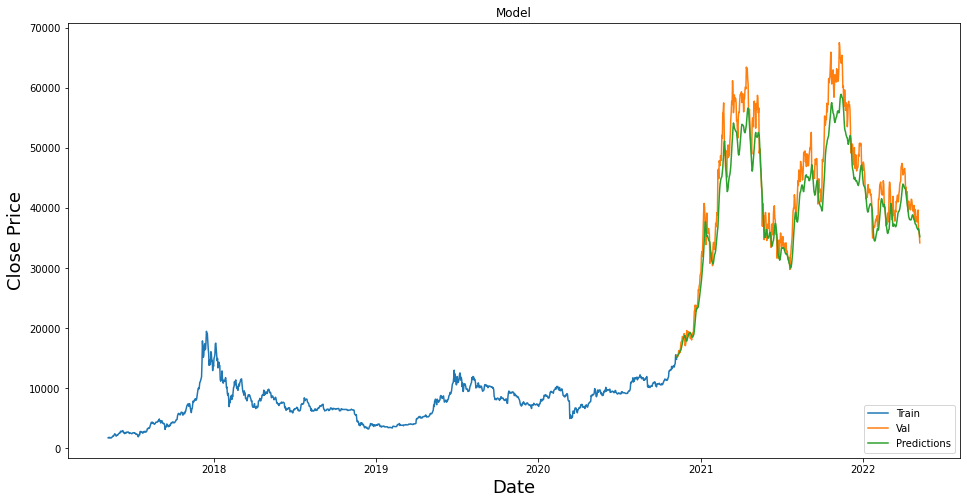

In [278]:
train = btc_model[:training_data_len]
valid = btc_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [279]:
valid

Close   Predictions
Date                                  
2020-11-08  15479.567383  15154.590820
2020-11-09  15332.315430  15380.679688
2020-11-10  15290.902344  15528.093750
2020-11-11  15701.339844  15601.108398
2020-11-12  16276.343750  15698.270508
...                  ...           ...
2022-05-04  39698.371094  36407.714844
2022-05-05  36575.140625  36620.019531
2022-05-06  36040.921875  36364.003906
2022-05-07  35501.953125  35862.132812
2022-05-08  34226.796875  35247.039062

[547 rows x 2 columns]

In [280]:
last_days = btc_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 21ms/step
[[34463.77]]


In [281]:
last_days = np.append(last_days, pred_price)
last_days

array([39437.4609375 , 38794.97265625, 38904.01171875, 37849.6640625 ,
       39666.75390625, 39338.78515625, 41143.9296875 , 40951.37890625,
       41801.15625   , 42190.65234375, 41247.82421875, 41077.99609375,
       42358.80859375, 42892.95703125, 43960.93359375, 44348.73046875,
       44500.828125  , 46820.4921875 , 47128.00390625, 47465.73046875,
       47062.6640625 , 45538.67578125, 46281.64453125, 45868.94921875,
       46453.56640625, 46622.67578125, 45555.9921875 , 43206.73828125,
       43503.84765625, 42287.6640625 , 42782.13671875, 42207.671875  ,
       39521.90234375, 40127.18359375, 41166.73046875, 39935.515625  ,
       40553.46484375, 40424.484375  , 39716.953125  , 40826.21484375,
       41502.75      , 41374.37890625, 40527.36328125, 39740.3203125 ,
       39486.73046875, 39469.29296875, 40458.30859375, 38117.4609375 ,
       39241.12109375, 39773.828125  , 38609.82421875, 37714.875     ,
       38469.09375   , 38529.328125  , 37750.453125  , 39698.37109375,
      

In [282]:
last_days = last_days[1:]
last_days

array([38794.97265625, 38904.01171875, 37849.6640625 , 39666.75390625,
       39338.78515625, 41143.9296875 , 40951.37890625, 41801.15625   ,
       42190.65234375, 41247.82421875, 41077.99609375, 42358.80859375,
       42892.95703125, 43960.93359375, 44348.73046875, 44500.828125  ,
       46820.4921875 , 47128.00390625, 47465.73046875, 47062.6640625 ,
       45538.67578125, 46281.64453125, 45868.94921875, 46453.56640625,
       46622.67578125, 45555.9921875 , 43206.73828125, 43503.84765625,
       42287.6640625 , 42782.13671875, 42207.671875  , 39521.90234375,
       40127.18359375, 41166.73046875, 39935.515625  , 40553.46484375,
       40424.484375  , 39716.953125  , 40826.21484375, 41502.75      ,
       41374.37890625, 40527.36328125, 39740.3203125 , 39486.73046875,
       39469.29296875, 40458.30859375, 38117.4609375 , 39241.12109375,
       39773.828125  , 38609.82421875, 37714.875     , 38469.09375   ,
       38529.328125  , 37750.453125  , 39698.37109375, 36575.140625  ,
      

In [283]:
last_days = last_days.reshape(-1, 1)
last_days

array([[38794.97265625],
       [38904.01171875],
       [37849.6640625 ],
       [39666.75390625],
       [39338.78515625],
       [41143.9296875 ],
       [40951.37890625],
       [41801.15625   ],
       [42190.65234375],
       [41247.82421875],
       [41077.99609375],
       [42358.80859375],
       [42892.95703125],
       [43960.93359375],
       [44348.73046875],
       [44500.828125  ],
       [46820.4921875 ],
       [47128.00390625],
       [47465.73046875],
       [47062.6640625 ],
       [45538.67578125],
       [46281.64453125],
       [45868.94921875],
       [46453.56640625],
       [46622.67578125],
       [45555.9921875 ],
       [43206.73828125],
       [43503.84765625],
       [42287.6640625 ],
       [42782.13671875],
       [42207.671875  ],
       [39521.90234375],
       [40127.18359375],
       [41166.73046875],
       [39935.515625  ],
       [40553.46484375],
       [40424.484375  ],
       [39716.953125  ],
       [40826.21484375],
       [41502.75      ],


#### BTC prediction

In [284]:
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 21ms/step
[[33811.17]]


### ETH

In [285]:
eth_model = eth[['Date', 'Close']]
eth_model

Date        Close
184   2017-11-09   320.884003
185   2017-11-10   299.252991
186   2017-11-11   314.681000
187   2017-11-12   307.907990
188   2017-11-13   316.716003
...          ...          ...
1821  2022-05-04  2940.644775
1822  2022-05-05  2749.213135
1823  2022-05-06  2694.979736
1824  2022-05-07  2636.093018
1825  2022-05-08  2532.283691

[1642 rows x 2 columns]

In [286]:
eth_model['Date'] = pd.to_datetime(eth_model['Date'])
eth_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 184 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1642 non-null   datetime64[ns]
 1   Close   1642 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.5 KB


In [287]:
eth_model.index = eth_model.pop('Date')
eth_model

Close
Date                   
2017-11-09   320.884003
2017-11-10   299.252991
2017-11-11   314.681000
2017-11-12   307.907990
2017-11-13   316.716003
...                 ...
2022-05-04  2940.644775
2022-05-05  2749.213135
2022-05-06  2694.979736
2022-05-07  2636.093018
2022-05-08  2532.283691

[1642 rows x 1 columns]

In [288]:
eth_model_values = eth_model.values
eth_model_values

array([[ 320.88400269],
       [ 299.25299072],
       [ 314.68099976],
       ...,
       [2694.97973633],
       [2636.09301758],
       [2532.28369141]])

In [289]:
training_data_len = math.ceil( len(eth_model_values)* .7)
training_data_len

1150

In [290]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(eth_model_values)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.55219827],
       [0.5397428 ],
       [0.51778548]])

In [291]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.193201  , 0.20249926, 0.22608115])]
[0.22509971578645008]



In [292]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [293]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1090, 60, 1)

In [294]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [295]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [296]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1090/1090 [==============================] - 39s 32ms/step - loss: 2.9792e-04


In [297]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = eth_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [298]:
x_test = np.array(x_test)

In [299]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(492, 60, 1)

In [300]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 3s 31ms/step


In [301]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

851.8896835451204

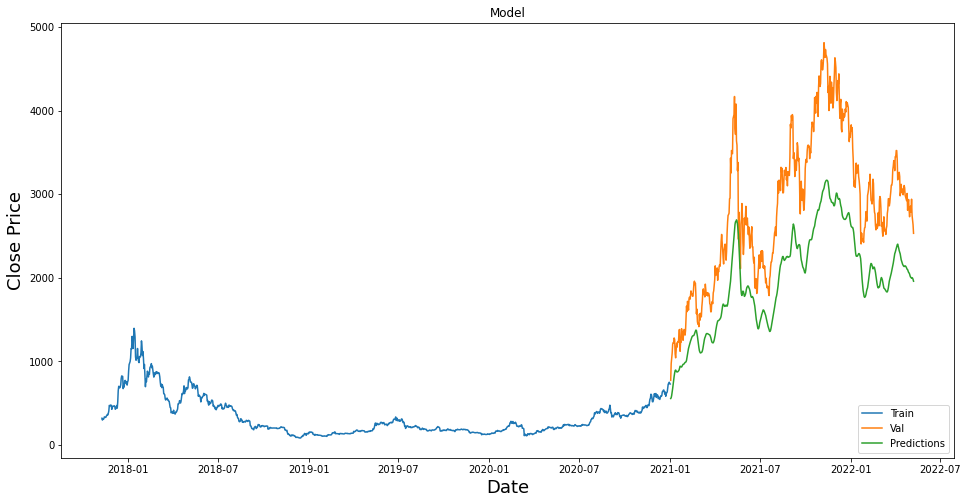

In [302]:
train = eth_model[:training_data_len]
valid = eth_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [303]:
valid

Close  Predictions
Date                                
2021-01-02   774.534973   556.813232
2021-01-03   975.507690   566.468872
2021-01-04  1040.233032   594.207703
2021-01-05  1100.006104   633.127808
2021-01-06  1207.112183   678.039551
...                 ...          ...
2022-05-04  2940.644775  1995.154297
2022-05-05  2749.213135  2002.077271
2022-05-06  2694.979736  1996.800903
2022-05-07  2636.093018  1982.085938
2022-05-08  2532.283691  1959.533936

[492 rows x 2 columns]

In [304]:
last_days = eth_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 21ms/step
[[1926.7351]]


### LINK

In [305]:
link_model = link[['Date', 'Close']]
link_model

Date      Close
184   2017-11-09   0.223969
185   2017-11-10   0.187602
186   2017-11-11   0.179770
187   2017-11-12   0.170898
188   2017-11-13   0.183071
...          ...        ...
1821  2022-05-04  12.145610
1822  2022-05-05  10.917400
1823  2022-05-06  10.799844
1824  2022-05-07  10.239905
1825  2022-05-08  10.044308

[1642 rows x 2 columns]

In [306]:
link_model['Date'] = pd.to_datetime(link_model['Date'])
link_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 184 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1642 non-null   datetime64[ns]
 1   Close   1642 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.5 KB


In [307]:
link_model.index = link_model.pop('Date')
link_model

Close
Date                 
2017-11-09   0.223969
2017-11-10   0.187602
2017-11-11   0.179770
2017-11-12   0.170898
2017-11-13   0.183071
...               ...
2022-05-04  12.145610
2022-05-05  10.917400
2022-05-06  10.799844
2022-05-07  10.239905
2022-05-08  10.044308

[1642 rows x 1 columns]

In [308]:
link_model_values = link_model.values
link_model_values

array([[ 0.223969  ],
       [ 0.187602  ],
       [ 0.17976999],
       ...,
       [10.79984379],
       [10.23990536],
       [10.04430771]])

In [309]:
training_data_len = math.ceil( len(link_model_values)* .7)
training_data_len

1150

In [310]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(link_model_values)
scaled_data

array([[0.00151218],
       [0.00081353],
       [0.00066307],
       ...,
       [0.20468558],
       [0.19392859],
       [0.19017096]])

In [311]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00151218, 0.00081353, 0.00066307, 0.00049263, 0.00072648,
       0.00082337, 0.0007854 , 0.00047079, 0.00027652, 0.00049213,
       0.00032849, 0.0003252 , 0.00018667, 0.00044685, 0.00036749,
       0.00091571, 0.00068591, 0.00072297, 0.00074756, 0.00059879,
       0.        , 0.00048423, 0.00062566, 0.00120344, 0.00164012,
       0.00161999, 0.0032394 , 0.00281086, 0.0022056 , 0.00192055,
       0.00179823, 0.00206793, 0.00221574, 0.00165539, 0.00224045,
       0.00313616, 0.00337227, 0.00376801, 0.00523195, 0.00556451,
       0.00564998, 0.0043713 , 0.00536049, 0.00541027, 0.00830733,
       0.00766341, 0.00685215, 0.00722654, 0.00692069, 0.00694367,
       0.00655275, 0.00846962, 0.00876593, 0.011302  , 0.0101522 ,
       0.01029542, 0.01612022, 0.01464324, 0.01764177, 0.02161634])]
[0.02366884873929833]



In [312]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [313]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1090, 60, 1)

In [314]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [315]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [316]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1090/1090 [==============================] - 39s 34ms/step - loss: 3.7067e-04


In [317]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = link_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [318]:
x_test = np.array(x_test)

In [319]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(492, 60, 1)

In [320]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 14ms/step


In [321]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.2609368010265072

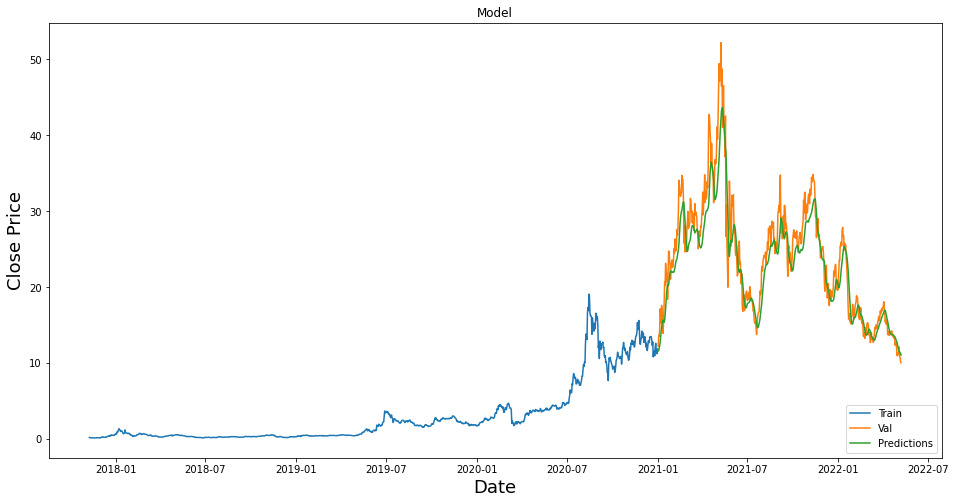

In [322]:
train = link_model[:training_data_len]
valid = link_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [323]:
valid

Close  Predictions
Date                              
2021-01-02  12.220137    11.615787
2021-01-03  13.650172    11.681938
2021-01-04  13.571063    11.962927
2021-01-05  14.539868    12.300256
2021-01-06  17.155256    12.747583
...               ...          ...
2022-05-04  12.145610    11.556371
2022-05-05  10.917400    11.512900
2022-05-06  10.799844    11.406954
2022-05-07  10.239905    11.274261
2022-05-08  10.044308    11.075634

[492 rows x 2 columns]

In [324]:
last_days = link_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 190ms/step
[[10.847608]]


### LUNA1

In [325]:
luna1_model = luna1[['Date', 'Close']]
luna1_model

Date      Close
808   2019-07-26   1.327436
809   2019-07-27   1.310566
810   2019-07-28   1.272989
811   2019-07-29   1.294661
812   2019-07-30   1.294193
...          ...        ...
1821  2022-05-04  86.172264
1822  2022-05-05  82.580406
1823  2022-05-06  77.464806
1824  2022-05-07  68.249123
1825  2022-05-08  64.176682

[1018 rows x 2 columns]

In [326]:
luna1_model['Date'] = pd.to_datetime(luna1_model['Date'])
luna1_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 808 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1018 non-null   datetime64[ns]
 1   Close   1018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


In [327]:
luna1_model.index = luna1_model.pop('Date')
luna1_model

Close
Date                 
2019-07-26   1.327436
2019-07-27   1.310566
2019-07-28   1.272989
2019-07-29   1.294661
2019-07-30   1.294193
...               ...
2022-05-04  86.172264
2022-05-05  82.580406
2022-05-06  77.464806
2022-05-07  68.249123
2022-05-08  64.176682

[1018 rows x 1 columns]

In [328]:
luna1_model_values = luna1_model.values
luna1_model_values

array([[ 1.32743597],
       [ 1.31056595],
       [ 1.27298903],
       ...,
       [77.4648056 ],
       [68.24912262],
       [64.17668152]])

In [329]:
training_data_len = math.ceil( len(luna1_model_values)* .7)
training_data_len

713

In [330]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(luna1_model_values)
scaled_data

array([[0.01033767],
       [0.01019259],
       [0.00986944],
       ...,
       [0.66509362],
       [0.58584182],
       [0.55082019]])

In [331]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01033767, 0.01019259, 0.00986944, 0.01005581, 0.01005179,
       0.0101026 , 0.0099124 , 0.00982237, 0.00976288, 0.00963882,
       0.00915331, 0.00882076, 0.00850027, 0.00925099, 0.00939986,
       0.00868382, 0.00987922, 0.00996128, 0.01084672, 0.01014004,
       0.01027946, 0.01006176, 0.01024816, 0.01012839, 0.01021605,
       0.00975811, 0.01006604, 0.0094323 , 0.00910312, 0.00898058,
       0.00955248, 0.00901333, 0.00888642, 0.00855822, 0.00878726,
       0.00896935, 0.0090207 , 0.00889063, 0.00887101, 0.00952208,
       0.0090522 , 0.00890466, 0.00866727, 0.00893046, 0.00884923,
       0.00850521, 0.0083095 , 0.0080702 , 0.00807984, 0.00801467,
       0.00804155, 0.00798721, 0.00764097, 0.00791789, 0.00789144,
       0.00748862, 0.00741271, 0.00727392, 0.00728721, 0.00718211])]
[0.006023205925167022]



In [332]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [333]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(653, 60, 1)

In [334]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [335]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [336]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

653/653 [==============================] - 31s 33ms/step - loss: 3.4950e-04


In [337]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = luna1_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [338]:
x_test = np.array(x_test)

In [339]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(305, 60, 1)

In [340]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 30ms/step


In [341]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8.323586926694777

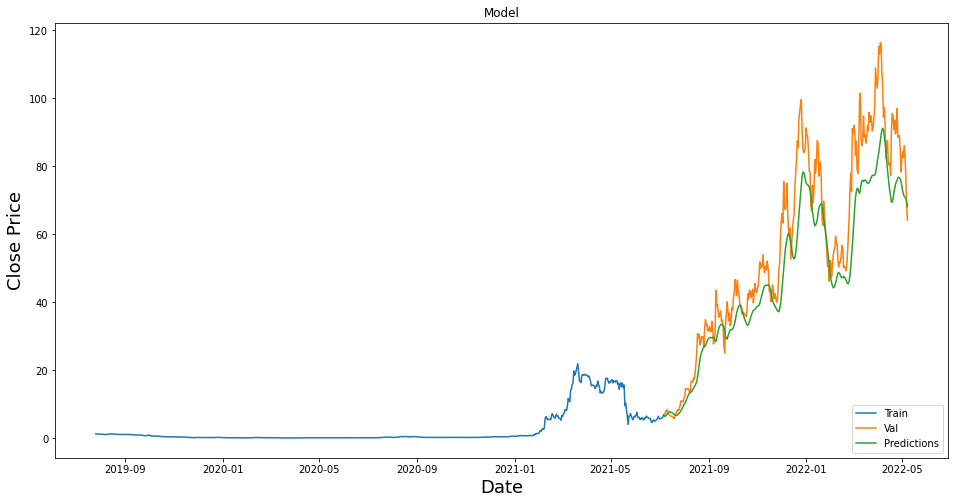

In [342]:
train = luna1_model[:training_data_len]
valid = luna1_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [343]:
valid

Close  Predictions
Date                              
2021-07-08   6.703923     6.499808
2021-07-09   8.093797     6.636497
2021-07-10   7.895117     6.878070
2021-07-11   8.422262     7.138543
2021-07-12   7.891666     7.431520
...               ...          ...
2022-05-04  86.172264    71.165619
2022-05-05  82.580406    70.900345
2022-05-06  77.464806    70.605217
2022-05-07  68.249123    69.884422
2022-05-08  64.176682    68.199127

[305 rows x 2 columns]

In [344]:
last_days = luna1_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 60ms/step
[[65.83588]]


### MATIC

In [345]:
matic_model = matic[['Date', 'Close']]
matic_model

Date     Close
719   2019-04-28  0.004421
720   2019-04-29  0.003471
721   2019-04-30  0.004478
722   2019-05-01  0.004374
723   2019-05-02  0.004198
...          ...       ...
1821  2022-05-04  1.171032
1822  2022-05-05  1.064691
1823  2022-05-06  1.044133
1824  2022-05-07  1.021204
1825  2022-05-08  0.979784

[1107 rows x 2 columns]

In [346]:
matic_model['Date'] = pd.to_datetime(matic_model['Date'])
matic_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 719 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1107 non-null   datetime64[ns]
 1   Close   1107 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.9 KB


In [347]:
matic_model.index = matic_model.pop('Date')
matic_model

Close
Date                
2019-04-28  0.004421
2019-04-29  0.003471
2019-04-30  0.004478
2019-05-01  0.004374
2019-05-02  0.004198
...              ...
2022-05-04  1.171032
2022-05-05  1.064691
2022-05-06  1.044133
2022-05-07  1.021204
2022-05-08  0.979784

[1107 rows x 1 columns]

In [348]:
matic_model_values = matic_model.values
matic_model_values

array([[0.004421  ],
       [0.003471  ],
       [0.004478  ],
       ...,
       [1.04413295],
       [1.02120399],
       [0.97978443]])

In [349]:
training_data_len = math.ceil( len(matic_model_values)* .7)
training_data_len

775

In [350]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(matic_model_values)
scaled_data

array([[4.45431822e-04],
       [1.14837878e-04],
       [4.65267528e-04],
       ...,
       [3.62258556e-01],
       [3.54279426e-01],
       [3.39865682e-01]])

In [351]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([4.45431822e-04, 1.14837878e-04, 4.65267528e-04, 4.29076078e-04,
       3.67829221e-04, 3.88012842e-04, 2.87790727e-04, 2.10884119e-04,
       2.18540037e-04, 7.76026009e-05, 7.34266456e-05, 0.00000000e+00,
       2.18888033e-04, 5.10506719e-04, 7.41922374e-04, 1.92301264e-03,
       1.60494664e-03, 2.21706730e-03, 2.70321460e-03, 3.90170435e-03,
       3.18483755e-03, 5.94721070e-03, 9.11812873e-03, 9.15675623e-03,
       6.62753847e-03, 8.39778180e-03, 7.73311427e-03, 7.60748883e-03,
       7.39764814e-03, 6.62301476e-03, 7.13421715e-03, 6.60039492e-03,
       5.79478980e-03, 6.66303393e-03, 6.23535000e-03, 5.90649603e-03,
       5.55815428e-03, 6.29416080e-03, 6.86278233e-03, 7.16379659e-03,
       7.43592756e-03, 7.92207487e-03, 7.78044111e-03, 8.29408004e-03,
       7.17667221e-03, 6.98631995e-03, 6.94804052e-03, 6.09162843e-03,
       6.52766427e-03, 6.81197536e-03, 6.47616114e-03, 6.71906076e-03,
       6.94142900e-03, 6.71801653e-03, 6.29346464e-03, 6.50817648e-03,
     

In [352]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [353]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(715, 60, 1)

In [354]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [355]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [356]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

715/715 [==============================] - 33s 32ms/step - loss: 0.0040


In [357]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = matic_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [358]:
x_test = np.array(x_test)

In [359]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(332, 60, 1)

In [360]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 19ms/step


In [361]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.1671471360577158

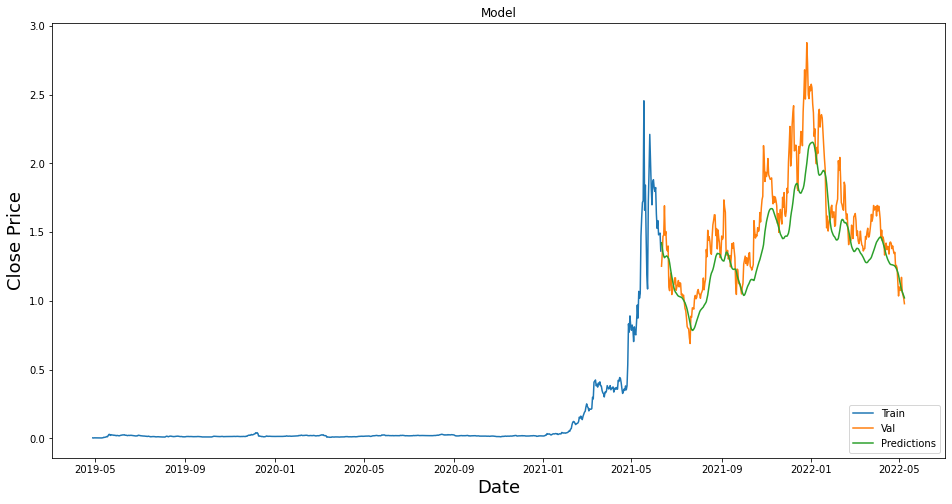

In [362]:
train = matic_model[:training_data_len]
valid = matic_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [363]:
valid

Close  Predictions
Date                             
2021-06-11  1.251965     1.422765
2021-06-12  1.341269     1.383320
2021-06-13  1.469217     1.348542
2021-06-14  1.477863     1.326500
2021-06-15  1.691460     1.313603
...              ...          ...
2022-05-04  1.171032     1.082222
2022-05-05  1.064691     1.067816
2022-05-06  1.044133     1.052883
2022-05-07  1.021204     1.037664
2022-05-08  0.979784     1.021946

[332 rows x 2 columns]

In [364]:
last_days = matic_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 41ms/step
[[1.0045049]]


In [365]:
last_days = np.append(last_days, pred_price)
last_days

array([1.43919694, 1.40650403, 1.39948499, 1.36287606, 1.37789905,
       1.38019598, 1.46835899, 1.44911098, 1.49955499, 1.52807105,
       1.46391904, 1.46649301, 1.50544798, 1.55630302, 1.62876499,
       1.57957304, 1.61080301, 1.69348097, 1.66038704, 1.67478704,
       1.68461895, 1.61728597, 1.69391406, 1.65402496, 1.68880999,
       1.64991796, 1.59292102, 1.45874703, 1.51405394, 1.43570197,
       1.46432197, 1.433465  , 1.33317399, 1.39286804, 1.42010605,
       1.37264097, 1.39642096, 1.39093196, 1.34007394, 1.42115498,
       1.42817605, 1.41774404, 1.37986195, 1.39913905, 1.36597097,
       1.34424496, 1.35266602, 1.24283302, 1.25768495, 1.238904  ,
       1.14057899, 1.03575003, 1.10116398, 1.07759094, 1.07595897,
       1.17103195, 1.06469095, 1.04413295, 1.02120399, 0.97978443,
       1.00450492])

In [366]:
last_days = last_days[1:]
last_days

array([1.40650403, 1.39948499, 1.36287606, 1.37789905, 1.38019598,
       1.46835899, 1.44911098, 1.49955499, 1.52807105, 1.46391904,
       1.46649301, 1.50544798, 1.55630302, 1.62876499, 1.57957304,
       1.61080301, 1.69348097, 1.66038704, 1.67478704, 1.68461895,
       1.61728597, 1.69391406, 1.65402496, 1.68880999, 1.64991796,
       1.59292102, 1.45874703, 1.51405394, 1.43570197, 1.46432197,
       1.433465  , 1.33317399, 1.39286804, 1.42010605, 1.37264097,
       1.39642096, 1.39093196, 1.34007394, 1.42115498, 1.42817605,
       1.41774404, 1.37986195, 1.39913905, 1.36597097, 1.34424496,
       1.35266602, 1.24283302, 1.25768495, 1.238904  , 1.14057899,
       1.03575003, 1.10116398, 1.07759094, 1.07595897, 1.17103195,
       1.06469095, 1.04413295, 1.02120399, 0.97978443, 1.00450492])

In [367]:
last_days = last_days.reshape(-1, 1)
last_days

array([[1.40650403],
       [1.39948499],
       [1.36287606],
       [1.37789905],
       [1.38019598],
       [1.46835899],
       [1.44911098],
       [1.49955499],
       [1.52807105],
       [1.46391904],
       [1.46649301],
       [1.50544798],
       [1.55630302],
       [1.62876499],
       [1.57957304],
       [1.61080301],
       [1.69348097],
       [1.66038704],
       [1.67478704],
       [1.68461895],
       [1.61728597],
       [1.69391406],
       [1.65402496],
       [1.68880999],
       [1.64991796],
       [1.59292102],
       [1.45874703],
       [1.51405394],
       [1.43570197],
       [1.46432197],
       [1.433465  ],
       [1.33317399],
       [1.39286804],
       [1.42010605],
       [1.37264097],
       [1.39642096],
       [1.39093196],
       [1.34007394],
       [1.42115498],
       [1.42817605],
       [1.41774404],
       [1.37986195],
       [1.39913905],
       [1.36597097],
       [1.34424496],
       [1.35266602],
       [1.24283302],
       [1.257

#### MATIC prediction

In [368]:
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 47ms/step
[[0.98887026]]


### SOL

In [369]:
sol_model = sol[['Date', 'Close']]
sol_model

Date      Close
1067  2020-04-10   0.951054
1068  2020-04-11   0.776819
1069  2020-04-12   0.882507
1070  2020-04-13   0.777832
1071  2020-04-14   0.661925
...          ...        ...
1821  2022-05-04  92.770851
1822  2022-05-05  84.596024
1823  2022-05-06  81.764107
1824  2022-05-07  78.983421
1825  2022-05-08  75.536499

[759 rows x 2 columns]

In [370]:
sol_model['Date'] = pd.to_datetime(sol_model['Date'])
sol_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 1067 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    759 non-null    datetime64[ns]
 1   Close   759 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [371]:
sol_model.index = sol_model.pop('Date')
sol_model

Close
Date                 
2020-04-10   0.951054
2020-04-11   0.776819
2020-04-12   0.882507
2020-04-13   0.777832
2020-04-14   0.661925
...               ...
2022-05-04  92.770851
2022-05-05  84.596024
2022-05-06  81.764107
2022-05-07  78.983421
2022-05-08  75.536499

[759 rows x 1 columns]

In [372]:
sol_model_values = sol_model.values
sol_model_values

array([[  0.95105398],
       [  0.77681899],
       [  0.88250703],
       [  0.77783197],
       [  0.66192502],
       [  0.64665103],
       [  0.69081599],
       [  0.66072798],
       [  0.68109602],
       [  0.606969  ],
       [  0.53881198],
       [  0.587659  ],
       [  0.69160098],
       [  0.62745702],
       [  0.634242  ],
       [  0.64332902],
       [  0.63550597],
       [  0.57237202],
       [  0.66129303],
       [  0.74584001],
       [  0.69104499],
       [  0.72879398],
       [  0.71587598],
       [  0.67953497],
       [  0.66749102],
       [  0.641837  ],
       [  0.62258399],
       [  0.61297798],
       [  0.604922  ],
       [  0.604527  ],
       [  0.53703398],
       [  0.51527297],
       [  0.53857601],
       [  0.55053198],
       [  0.56911802],
       [  0.55975199],
       [  0.59912002],
       [  0.61298901],
       [  0.65267003],
       [  0.62445402],
       [  0.57915598],
       [  0.60891497],
       [  0.63887501],
       [  0

In [373]:
training_data_len = math.ceil( len(sol_model_values)* .7)
training_data_len

532

In [374]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(sol_model_values)
scaled_data

array([[1.68633464e-03],
       [1.01210036e-03],
       [1.42107963e-03],
       [1.01602027e-03],
       [5.67497021e-04],
       [5.08391518e-04],
       [6.79295927e-04],
       [5.62864855e-04],
       [6.41682726e-04],
       [3.54834610e-04],
       [9.10885108e-05],
       [2.80111027e-04],
       [6.82333602e-04],
       [4.34116782e-04],
       [4.60372491e-04],
       [4.95536408e-04],
       [4.65263679e-04],
       [2.20955242e-04],
       [5.65051427e-04],
       [8.92221511e-04],
       [6.80182088e-04],
       [8.26258749e-04],
       [7.76270193e-04],
       [6.35641973e-04],
       [5.89035684e-04],
       [4.89762749e-04],
       [4.15259668e-04],
       [3.78087472e-04],
       [3.46913358e-04],
       [3.45384833e-04],
       [8.42081878e-05],
       [0.00000000e+00],
       [9.01753630e-05],
       [1.36441210e-04],
       [2.08363305e-04],
       [1.72119710e-04],
       [3.24461547e-04],
       [3.78130143e-04],
       [5.31683129e-04],
       [4.22496117e-04],


In [375]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.68633464e-03, 1.01210036e-03, 1.42107963e-03, 1.01602027e-03,
       5.67497021e-04, 5.08391518e-04, 6.79295927e-04, 5.62864855e-04,
       6.41682726e-04, 3.54834610e-04, 9.10885108e-05, 2.80111027e-04,
       6.82333602e-04, 4.34116782e-04, 4.60372491e-04, 4.95536408e-04,
       4.65263679e-04, 2.20955242e-04, 5.65051427e-04, 8.92221511e-04,
       6.80182088e-04, 8.26258749e-04, 7.76270193e-04, 6.35641973e-04,
       5.89035684e-04, 4.89762749e-04, 4.15259668e-04, 3.78087472e-04,
       3.46913358e-04, 3.45384833e-04, 8.42081878e-05, 0.00000000e+00,
       9.01753630e-05, 1.36441210e-04, 2.08363305e-04, 1.72119710e-04,
       3.24461547e-04, 3.78130143e-04, 5.31683129e-04, 4.22496117e-04,
       2.47207030e-04, 3.62364908e-04, 4.78300772e-04, 3.78292752e-04,
       1.30718064e-04, 3.31183183e-04, 2.24573235e-04, 2.92981590e-04,
       2.31724573e-04, 2.48209440e-04, 2.81171330e-04, 2.11861360e-04,
       2.40779475e-04, 1.91147044e-04, 2.76094238e-04, 2.78717894e-04,
     

In [376]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [377]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(472, 60, 1)

In [378]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [379]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [380]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

472/472 [==============================] - 18s 33ms/step - loss: 0.0050


In [381]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = sol_model_values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [382]:
x_test = np.array(x_test)

In [383]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(227, 60, 1)

In [384]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 47ms/step


In [385]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.346498262514627

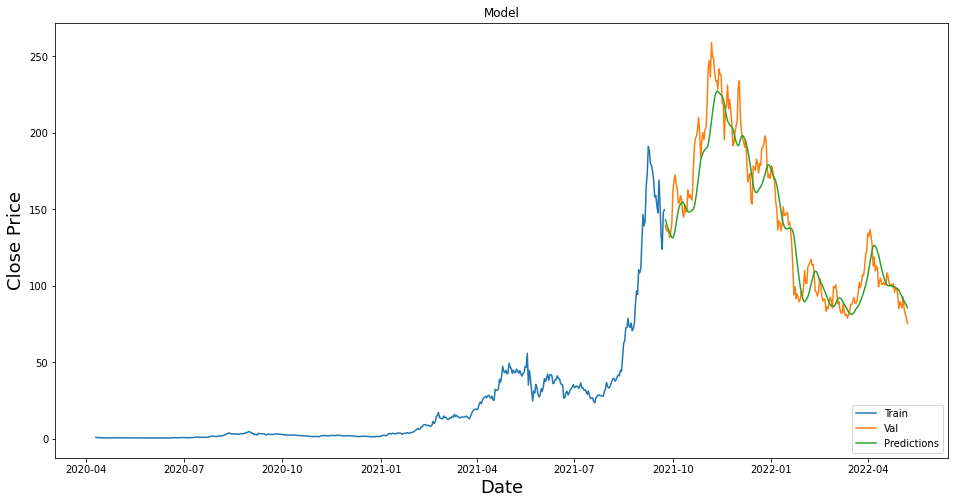

In [386]:
train = sol_model[:training_data_len]
valid = sol_model[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [387]:
valid

Close  Predictions
Date                               
2021-09-24  139.395645   143.118820
2021-09-25  136.178925   140.641891
2021-09-26  135.699371   138.337906
2021-09-27  136.728424   136.289108
2021-09-28  131.537216   134.635529
...                ...          ...
2022-05-04   92.770851    90.898018
2022-05-05   84.596024    89.831650
2022-05-06   81.764107    88.632217
2022-05-07   78.983421    87.242455
2022-05-08   75.536499    85.623184

[227 rows x 2 columns]

In [388]:
last_days = sol_model[-60:].values
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 55ms/step
[[83.716515]]


# XGBoost

In [389]:
import os
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

### ADA

In [390]:
ada_model = ada[['Close']]
ada_model

Close
184   0.032053
185   0.027119
186   0.027437
187   0.023977
188   0.025808
...        ...
1821  0.896942
1822  0.791152
1823  0.783359
1824  0.761882
1825  0.744362

[1642 rows x 1 columns]

In [391]:
ada_model['Target'] = ada_model.Close.shift(-1)

In [392]:
ada_model.dropna(inplace=True)
ada_model

Close    Target
184   0.032053  0.027119
185   0.027119  0.027437
186   0.027437  0.023977
187   0.023977  0.025808
188   0.025808  0.026230
...        ...       ...
1820  0.771145  0.896942
1821  0.896942  0.791152
1822  0.791152  0.783359
1823  0.783359  0.761882
1824  0.761882  0.744362

[1641 rows x 2 columns]

In [393]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1-perc))
    return data[:n], data[n:]

In [394]:
train, test = train_test_split(ada_model, 0.3)

In [395]:
print(len(ada_model))
print(len(train))
print(len(test))

1641
1148
493


In [396]:
def xgb_predict(train, val):
    train = np.array(train)
    X,y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X, y)
    
    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

In [397]:
xgb_predict(train, test[0, 0])

0.16829717

In [398]:
def validate(data, perc):
    predictions = []
    
    train, test = train_test_split(data,perc)
    
    history = [x for x in train]
    
    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]
        
        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)
        
        history.append(test[i])
    
    error = mean_squared_error(test[:, -1], predictions, squared=False)
    
    return error, test[:, -1], predictions

In [399]:
validate(ada_model, 0.3)

(0.14054819757831932,
 array([0.17535   , 0.177423  , 0.20499501, 0.22476199, 0.25831401,
        0.331898  , 0.29998001, 0.30559701, 0.332973  , 0.30489501,
        0.275466  , 0.28700301, 0.313609  , 0.31039599, 0.30252999,
        0.35244399, 0.379852  , 0.37142801, 0.36913699, 0.37539399,
        0.31020901, 0.34957701, 0.34564301, 0.353881  , 0.34388599,
        0.34423399, 0.31308001, 0.346129  , 0.348131  , 0.36261901,
        0.34489799, 0.402033  , 0.426247  , 0.44139999, 0.44105101,
        0.53787398, 0.627886  , 0.66323799, 0.68251097, 0.70351601,
        0.930318  , 0.92774099, 0.925587  , 0.90571898, 0.84841901,
        0.86101198, 0.870951  , 0.89091998, 0.91411901, 0.92764902,
        1.12295794, 1.10052001, 1.09915102, 0.95470899, 1.05165696,
        1.07911599, 1.24110496, 1.32485998, 1.30805898, 1.29238796,
        1.225582  , 1.21659303, 1.11486804, 1.16852295, 1.13101196,
        1.13336694, 1.11805296, 1.19516098, 1.13500297, 1.12478995,
        1.03914404, 1.1033

### ATOM

In [400]:
atom_model = atom[['Close']]
atom_model

Close
674    6.526642
675    7.504351
676    7.383882
677    4.776164
678    5.110341
...         ...
1821  19.876862
1822  17.853285
1823  17.674110
1824  16.475998
1825  15.785578

[1152 rows x 1 columns]

In [401]:
atom_model['Target'] = atom_model.Close.shift(-1)

In [402]:
atom_model.dropna(inplace=True)
atom_model

Close     Target
674    6.526642   7.504351
675    7.504351   7.383882
676    7.383882   4.776164
677    4.776164   5.110341
678    5.110341   4.821883
...         ...        ...
1820  17.593531  19.876862
1821  19.876862  17.853285
1822  17.853285  17.674110
1823  17.674110  16.475998
1824  16.475998  15.785578

[1151 rows x 2 columns]

In [403]:
train, test = train_test_split(atom_model, 0.3)

In [404]:
xgb_predict(train, test[0, 0])

13.917069

In [405]:
validate(atom_model, 0.3)

(2.995987772290054,
 array([12.71808147, 12.06832409, 12.58883667, 13.99412155, 13.75741768,
        14.85279274, 16.63729477, 15.08472729, 14.87379837, 15.09888363,
        13.41445065, 13.630867  , 13.9391346 , 12.80816078, 11.93714809,
        11.61866474, 12.50014687, 12.61108017, 13.3602953 , 13.38144016,
        13.60036755, 12.42953396, 11.94155788, 12.01341248,  9.54827595,
         8.97330093, 10.09749222, 10.33978271,  9.14111042,  9.5436182 ,
        10.04968357, 10.84878159, 11.57971191, 12.0035162 , 11.11038876,
        11.764925  , 11.81792736, 12.2635479 , 13.54847527, 13.15937138,
        12.92638588, 11.92868328, 13.1646986 , 14.40094662, 14.06259537,
        13.04565716, 12.11347198, 11.74942112, 11.4312458 , 11.17913914,
        11.00016117, 10.98305798,  9.95894814,  9.48571396, 10.41718578,
        11.37714863, 11.45986843, 11.45210648, 11.45176029, 11.40808201,
        11.71359158, 11.55852413, 11.76109409, 12.15032387, 12.60665131,
        12.36202812, 12.4867181

### AVAX

In [406]:
avax_model = avax[['Close']]
avax_model

Close
1161   4.896294
1162   4.986754
1232   5.234632
1233   4.118469
1234   4.566561
...         ...
1821  67.086105
1822  59.127441
1823  57.034325
1824  55.156693
1825  51.730221

[596 rows x 1 columns]

In [407]:
avax_model['Target'] = avax_model.Close.shift(-1)

In [408]:
avax_model.dropna(inplace=True)
avax_model

Close     Target
1161   4.896294   4.986754
1162   4.986754   5.234632
1232   5.234632   4.118469
1233   4.118469   4.566561
1234   4.566561   4.712279
...         ...        ...
1820  59.660107  67.086105
1821  67.086105  59.127441
1822  59.127441  57.034325
1823  57.034325  55.156693
1824  55.156693  51.730221

[595 rows x 2 columns]

In [409]:
train, test = train_test_split(avax_model, 0.3)

In [410]:
xgb_predict(train, test[0, 0])

91.18306

In [411]:
validate(avax_model, 0.3)

(7.981273902579205,
 array([ 88.0613327 ,  84.72491455,  97.26046753,  95.40354156,
         93.55023193,  97.97557068, 107.80207825, 100.25276947,
        112.02355957, 125.77062988, 128.599823  , 134.53103638,
        123.83104706, 120.22818756, 122.64852905, 103.82958221,
        113.27664948, 110.58901978, 120.25830078, 120.34369659,
        119.75084686, 107.86654663, 108.1378479 ,  92.88023376,
         85.7900238 ,  93.31929779,  89.95217896,  93.22105408,
         85.4617691 ,  80.73967743,  86.39281464,  88.1091156 ,
         79.14962769,  87.31190491, 101.18144989,  98.40188599,
        111.00876617, 116.01686859, 107.67378235, 113.40851593,
        123.33294678, 116.47735596, 121.20996857, 114.97645569,
        115.03192902, 115.21482849, 113.59861755, 107.21561432,
        102.99812317, 101.92827606, 109.27048492, 114.15801239,
        113.1863327 , 108.14521027, 103.23924255,  97.85257721,
         95.19853973,  86.76771545,  84.05683899,  89.20655823,
         84.53261566

### AXS

In [412]:
axs_model = axs[['Close']]
axs_model

Close
1275   0.145949
1276   0.135104
1277   0.143164
1278   0.141056
1279   0.198251
...         ...
1821  33.363853
1822  28.984409
1823  28.462557
1824  28.750196
1825  30.405958

[551 rows x 1 columns]

In [413]:
axs_model['Target'] = axs_model.Close.shift(-1)

In [414]:
axs_model.dropna(inplace=True)
axs_model

Close     Target
1275   0.145949   0.135104
1276   0.135104   0.143164
1277   0.143164   0.141056
1278   0.141056   0.198251
1279   0.198251   0.278508
...         ...        ...
1820  29.114042  33.363853
1821  33.363853  28.984409
1822  28.984409  28.462557
1823  28.462557  28.750196
1824  28.750196  30.405958

[550 rows x 2 columns]

In [415]:
train, test = train_test_split(axs_model, 0.3)

In [416]:
xgb_predict(train, test[0, 0])

128.98749

In [417]:
validate(axs_model, 0.3)

(7.11492052354751,
 array([138.95123291, 125.03200531, 127.96142578, 133.00756836,
        134.66481018, 137.14891052, 135.09840393, 135.08248901,
        127.59299469, 118.0167923 , 107.36696625, 106.13642883,
        105.91104889, 113.27868652, 103.84063721,  97.66487885,
        103.04250336, 104.2579422 ,  92.92371368,  96.02037811,
        101.55725098,  98.02828979,  94.59008789,  96.15470886,
         95.30096436,  92.57224274,  97.23707581, 101.5399704 ,
        107.17123413, 104.59253693, 109.14096832, 107.56761932,
        107.00307465,  99.96811676,  93.69080353,  95.10022736,
         93.29644775,  94.04245758,  96.51107025,  94.32369995,
         93.00198364,  80.35073853,  78.97000122,  73.44577789,
         70.57850647,  72.05274963,  68.44338226,  72.54862213,
         78.15285492,  73.07545471,  73.66685486,  75.71248627,
         80.27992249,  76.6180954 ,  73.89629364,  71.90287781,
         69.04363251,  58.09711838,  49.99570465,  54.12954712,
         51.16883469,

### BTC

In [418]:
btc_model = btc[['Close']]
btc_model

Close
0      1755.359985
1      1787.130005
2      1848.569946
3      1724.239990
4      1804.910034
...            ...
1821  39698.371094
1822  36575.140625
1823  36040.921875
1824  35501.953125
1825  34226.796875

[1826 rows x 1 columns]

In [419]:
btc_model['Target'] = btc_model.Close.shift(-1)

In [420]:
btc_model.dropna(inplace=True)
btc_model

Close        Target
0      1755.359985   1787.130005
1      1787.130005   1848.569946
2      1848.569946   1724.239990
3      1724.239990   1804.910034
4      1804.910034   1808.910034
...            ...           ...
1820  37750.453125  39698.371094
1821  39698.371094  36575.140625
1822  36575.140625  36040.921875
1823  36040.921875  35501.953125
1824  35501.953125  34226.796875

[1825 rows x 2 columns]

In [421]:
train, test = train_test_split(btc_model, 0.3)

In [422]:
xgb_predict(train, test[0, 0])

15571.046

In [423]:
validate(btc_model, 0.3)

(2524.415656833501,
 array([14833.75390625, 15479.56738281, 15332.31542969, 15290.90234375,
        15701.33984375, 16276.34375   , 16317.80859375, 16068.13867188,
        15955.58789062, 16716.11132812, 17645.40625   , 17804.00585938,
        17817.08984375, 18621.31445312, 18642.23242188, 18370.00195312,
        18364.12109375, 19107.46484375, 18732.12109375, 17150.62304688,
        17108.40234375, 17717.4140625 , 18177.484375  , 19625.8359375 ,
        18802.99804688, 19201.09179688, 19445.3984375 , 18699.765625  ,
        19154.23046875, 19345.12109375, 19191.63085938, 18321.14453125,
        18553.91601562, 18264.9921875 , 18058.90429688, 18803.65625   ,
        19142.3828125 , 19246.64453125, 19417.07617188, 21310.59765625,
        22805.16210938, 23137.9609375 , 23869.83203125, 23477.29492188,
        22803.08203125, 23783.02929688, 23241.34570312, 23735.94921875,
        24664.79101562, 26437.03710938, 26272.29492188, 27084.80859375,
        27362.4375    , 28840.953125  , 2900

### ETH

In [424]:
eth_model = eth[['Close']]
eth_model

Close
184    320.884003
185    299.252991
186    314.681000
187    307.907990
188    316.716003
...           ...
1821  2940.644775
1822  2749.213135
1823  2694.979736
1824  2636.093018
1825  2532.283691

[1642 rows x 1 columns]

In [425]:
eth_model['Target'] = eth_model.Close.shift(-1)

In [426]:
eth_model.dropna(inplace=True)
eth_model

Close       Target
184    320.884003   299.252991
185    299.252991   314.681000
186    314.681000   307.907990
187    307.907990   316.716003
188    316.716003   337.631012
...           ...          ...
1820  2783.476318  2940.644775
1821  2940.644775  2749.213135
1822  2749.213135  2694.979736
1823  2694.979736  2636.093018
1824  2636.093018  2532.283691

[1641 rows x 2 columns]

In [427]:
train, test = train_test_split(eth_model, 0.3)

In [428]:
xgb_predict(train, test[0, 0])

753.2425

In [429]:
validate(eth_model, 0.3)

(210.8070823443004,
 array([ 730.36755371,  774.53497314,  975.50769043, 1040.23303223,
        1100.00610352, 1207.11218262, 1225.67810059, 1224.19714355,
        1281.07727051, 1262.2467041 , 1090.14538574, 1043.43457031,
        1130.73937988, 1218.45300293, 1171.83459473, 1233.53759766,
        1230.17224121, 1257.27954102, 1377.29589844, 1382.27404785,
        1121.57092285, 1236.51220703, 1230.99060059, 1391.609375  ,
        1324.41479492, 1357.05810547, 1253.18713379, 1332.4921875 ,
        1382.52282715, 1376.11547852, 1314.98620605, 1369.04052734,
        1515.19372559, 1660.9095459 , 1594.76269531, 1718.65087891,
        1677.84680176, 1614.2277832 , 1746.61682129, 1768.03503418,
        1744.2434082 , 1783.79797363, 1843.53259277, 1814.10986328,
        1805.08410645, 1779.79101562, 1781.06750488, 1848.45825195,
        1937.44921875, 1960.16479492, 1919.53405762, 1935.60107422,
        1781.99291992, 1570.20397949, 1626.57568359, 1475.70373535,
        1446.03369141, 1459.

In [430]:
eth_model = eth[['Close']]
eth_model

Close
184    320.884003
185    299.252991
186    314.681000
187    307.907990
188    316.716003
...           ...
1821  2940.644775
1822  2749.213135
1823  2694.979736
1824  2636.093018
1825  2532.283691

[1642 rows x 1 columns]

In [431]:
eth_model = eth_model.values
eth_model

array([[ 320.88400269],
       [ 299.25299072],
       [ 314.68099976],
       ...,
       [2694.97973633],
       [2636.09301758],
       [2532.28369141]])

In [432]:
eth_model = np.append(eth_model, 2705.979)
eth_model

array([ 320.88400269,  299.25299072,  314.68099976, ..., 2636.09301758,
       2532.28369141, 2705.979     ])

In [433]:
eth_model = pd.DataFrame(eth_model, columns = ['Close'])
eth_model

Close
0      320.884003
1      299.252991
2      314.681000
3      307.907990
4      316.716003
...           ...
1638  2749.213135
1639  2694.979736
1640  2636.093018
1641  2532.283691
1642  2705.979000

[1643 rows x 1 columns]

In [434]:
eth_model['Target'] = eth_model.Close.shift(-1)

In [435]:
eth_model.dropna(inplace=True)
eth_model

Close       Target
0      320.884003   299.252991
1      299.252991   314.681000
2      314.681000   307.907990
3      307.907990   316.716003
4      316.716003   337.631012
...           ...          ...
1637  2940.644775  2749.213135
1638  2749.213135  2694.979736
1639  2694.979736  2636.093018
1640  2636.093018  2532.283691
1641  2532.283691  2705.979000

[1642 rows x 2 columns]

In [436]:
train, test = train_test_split(eth_model, 0.3)

In [437]:
xgb_predict(train, test[0, 0])

731.2321

#### ETH prediction

In [438]:
validate(eth_model, 0.3)

(210.815607440087,
 array([ 774.53497314,  975.50769043, 1040.23303223, 1100.00610352,
        1207.11218262, 1225.67810059, 1224.19714355, 1281.07727051,
        1262.2467041 , 1090.14538574, 1043.43457031, 1130.73937988,
        1218.45300293, 1171.83459473, 1233.53759766, 1230.17224121,
        1257.27954102, 1377.29589844, 1382.27404785, 1121.57092285,
        1236.51220703, 1230.99060059, 1391.609375  , 1324.41479492,
        1357.05810547, 1253.18713379, 1332.4921875 , 1382.52282715,
        1376.11547852, 1314.98620605, 1369.04052734, 1515.19372559,
        1660.9095459 , 1594.76269531, 1718.65087891, 1677.84680176,
        1614.2277832 , 1746.61682129, 1768.03503418, 1744.2434082 ,
        1783.79797363, 1843.53259277, 1814.10986328, 1805.08410645,
        1779.79101562, 1781.06750488, 1848.45825195, 1937.44921875,
        1960.16479492, 1919.53405762, 1935.60107422, 1781.99291992,
        1570.20397949, 1626.57568359, 1475.70373535, 1446.03369141,
        1459.97314453, 1416.0

### LINK

In [439]:
link_model = link[['Close']]
link_model

Close
184    0.223969
185    0.187602
186    0.179770
187    0.170898
188    0.183071
...         ...
1821  12.145610
1822  10.917400
1823  10.799844
1824  10.239905
1825  10.044308

[1642 rows x 1 columns]

In [440]:
link_model['Target'] = link_model.Close.shift(-1)

In [441]:
link_model.dropna(inplace=True)
link_model

Close     Target
184    0.223969   0.187602
185    0.187602   0.179770
186    0.179770   0.170898
187    0.170898   0.183071
188    0.183071   0.188114
...         ...        ...
1820  11.121428  12.145610
1821  12.145610  10.917400
1822  10.917400  10.799844
1823  10.799844  10.239905
1824  10.239905  10.044308

[1641 rows x 2 columns]

In [442]:
train, test = train_test_split(link_model, 0.3)

In [443]:
xgb_predict(train, test[0, 0])

11.098999

In [444]:
validate(link_model, 0.3)

(2.574499929483721,
 array([11.87255478, 12.22013664, 13.65017223, 13.57106304, 14.53986835,
        17.15525627, 16.03196716, 15.28808498, 17.60751343, 16.2474308 ,
        14.5569334 , 13.91584873, 15.9300909 , 17.82625008, 20.70972633,
        20.21839714, 23.16677284, 22.03626251, 20.75409317, 21.84677696,
        18.42427254, 21.62949753, 24.76153183, 24.70185852, 23.54012108,
        23.02586365, 21.07044792, 23.11090279, 22.77344322, 23.59402847,
        22.59843445, 22.83964157, 23.71361351, 25.07303429, 24.4989624 ,
        26.36332512, 25.04932976, 24.79012108, 25.45610237, 27.59421539,
        26.85959625, 27.87423897, 30.64073944, 34.1019783 , 33.29032135,
        32.57589722, 31.97348022, 32.25679779, 32.44149399, 34.71520996,
        34.1098175 , 34.15274048, 31.53080559, 25.80034256, 28.08671951,
        24.66804695, 25.18731308, 26.23509789, 24.66353226, 27.60706139,
        28.51118279, 29.99002838, 27.71873856, 27.87541389, 28.16510391,
        28.54821205, 31.6981601

### LUNA1

In [445]:
luna1_model = luna1[['Close']]
luna1_model

Close
808    1.327436
809    1.310566
810    1.272989
811    1.294661
812    1.294193
...         ...
1821  86.172264
1822  82.580406
1823  77.464806
1824  68.249123
1825  64.176682

[1018 rows x 1 columns]

In [446]:
luna1_model['Target'] = luna1_model.Close.shift(-1)

In [447]:
luna1_model.dropna(inplace=True)
luna1_model

Close     Target
808    1.327436   1.310566
809    1.310566   1.272989
810    1.272989   1.294661
811    1.294661   1.294193
812    1.294193   1.300102
...         ...        ...
1820  82.594147  86.172264
1821  86.172264  82.580406
1822  82.580406  77.464806
1823  77.464806  68.249123
1824  68.249123  64.176682

[1017 rows x 2 columns]

In [448]:
train, test = train_test_split(luna1_model, 0.3)

In [449]:
xgb_predict(train, test[0, 0])

5.9285946

In [450]:
validate(luna1_model, 0.3)

(5.882404704790885,
 array([  7.090137  ,   6.70392323,   8.09379673,   7.89511681,
          8.42226219,   7.89166594,   7.10341883,   6.91896677,
          6.61251688,   6.57895279,   6.47875881,   6.4962678 ,
          5.95396185,   5.87098217,   6.60877085,   7.34672403,
          7.92592001,   8.48632336,   8.25388813,   8.51987743,
          9.50780296,  10.96631241,  11.044137  ,  10.84537697,
         10.75721455,  11.92819405,  12.32942772,  14.71902466,
         14.51312256,  14.55463505,  14.49841404,  14.58826923,
         13.41452026,  13.96946716,  16.7475853 ,  17.01953697,
         16.56895065,  17.80105782,  17.40293694,  19.28481674,
         22.00045967,  25.23495865,  30.84176445,  29.39685631,
         30.65245056,  27.55119133,  28.03327942,  29.91685104,
         29.67116547,  29.98959351,  27.00930023,  32.66126251,
         34.95920563,  33.33124161,  33.46823883,  31.56235695,
         31.66261482,  32.86503983,  31.74186325,  31.40615845,
         34.48678589

### MATIC

In [451]:
matic_model = matic[['Close']]
matic_model

Close
719   0.004421
720   0.003471
721   0.004478
722   0.004374
723   0.004198
...        ...
1821  1.171032
1822  1.064691
1823  1.044133
1824  1.021204
1825  0.979784

[1107 rows x 1 columns]

In [452]:
matic_model['Target'] = matic_model.Close.shift(-1)

In [453]:
matic_model.dropna(inplace=True)
matic_model

Close    Target
719   0.004421  0.003471
720   0.003471  0.004478
721   0.004478  0.004374
722   0.004374  0.004198
723   0.004198  0.004256
...        ...       ...
1820  1.075959  1.171032
1821  1.171032  1.064691
1822  1.064691  1.044133
1823  1.044133  1.021204
1824  1.021204  0.979784

[1106 rows x 2 columns]

In [454]:
train, test = train_test_split(matic_model, 0.3)

In [455]:
xgb_predict(train, test[0, 0])

1.6043793

In [456]:
validate(matic_model, 0.3)

(0.18630364452369108,
 array([1.25196505, 1.34126902, 1.46921694, 1.47786295, 1.69146001,
        1.47719705, 1.50379395, 1.37726104, 1.36369503, 1.398996  ,
        1.09905195, 1.07438397, 1.15858698, 1.20314801, 1.04616296,
        1.07545304, 1.11203301, 1.11922395, 1.16727901, 1.16742802,
        1.07735705, 1.10361099, 1.11863804, 1.14786506, 1.10160995,
        1.13178599, 1.12841105, 1.04333997, 1.05132902, 1.02987802,
        1.04215205, 0.996988  , 0.94566399, 0.92869598, 0.876782  ,
        0.81261402, 0.80146098, 0.79545701, 0.73072797, 0.69010103,
        0.88800901, 0.88055098, 0.94923002, 0.94932503, 0.93994302,
        1.01788604, 1.03981996, 1.01544297, 1.02570403, 1.06940699,
        1.08264899, 1.05247402, 1.04818594, 1.01879501, 1.05268204,
        1.06494498, 1.08082199, 1.16613901, 1.08090699, 1.12763405,
        1.15758896, 1.37356806, 1.32101905, 1.51318598, 1.44175899,
        1.46643996, 1.427513  , 1.35175896, 1.33854699, 1.46926796,
        1.55274296, 1.5849

### SOL

In [457]:
sol_model = sol[['Close']]
sol_model

Close
1067   0.951054
1068   0.776819
1069   0.882507
1070   0.777832
1071   0.661925
...         ...
1821  92.770851
1822  84.596024
1823  81.764107
1824  78.983421
1825  75.536499

[759 rows x 1 columns]

In [458]:
sol_model['Target'] = sol_model.Close.shift(-1)

In [459]:
sol_model.dropna(inplace=True)
sol_model

Close     Target
1067   0.951054   0.776819
1068   0.776819   0.882507
1069   0.882507   0.777832
1070   0.777832   0.661925
1071   0.661925   0.646651
...         ...        ...
1820  85.842377  92.770851
1821  92.770851  84.596024
1822  84.596024  81.764107
1823  81.764107  78.983421
1824  78.983421  75.536499

[758 rows x 2 columns]

In [460]:
train, test = train_test_split(sol_model, 0.3)

In [461]:
xgb_predict(train, test[0, 0])

169.17996

In [462]:
validate(sol_model, 0.3)

(12.914474367273906,
 array([149.75357056, 139.39564514, 136.17892456, 135.69937134,
        136.72842407, 131.53721619, 135.35145569, 141.06904602,
        161.68237305, 169.09301758, 172.5891571 , 166.73191833,
        164.11582947, 154.10774231, 154.28118896, 158.94920349,
        156.82583618, 148.04870605, 144.85813904, 152.73712158,
        148.17604065, 149.75680542, 162.59620667, 157.53881836,
        159.74380493, 157.23127747, 156.01702881, 175.9468689 ,
        190.31843567, 196.43153381, 197.70385742, 202.36198425,
        210.10429382, 199.80725098, 183.77459717, 194.86398315,
        200.18275452, 195.4160614 , 202.42102051, 203.54508972,
        220.23959351, 242.89881897, 247.38777161, 236.47433472,
        258.93432617, 249.82348633, 248.46717834, 239.21313477,
        233.77952576, 234.24075317, 228.50209045, 241.82502747,
        238.42552185, 237.55360413, 219.23902893, 218.71524048,
        195.4874115 , 215.28001404, 218.01527405, 231.28262329,
        215.7372741

# Exponential Smoothing

In [463]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
high = pd.read_csv('data_updated/high.csv', parse_dates=['Date'], date_parser=dateparse)
low = pd.read_csv('data_updated/low.csv', parse_dates=['Date'], date_parser=dateparse)
close= pd.read_csv('data_updated/close.csv', parse_dates=['Date'], date_parser=dateparse)
open = pd.read_csv('data_updated/open.csv', parse_dates=['Date'], date_parser=dateparse)
volume = pd.read_csv('data_updated/volume.csv', parse_dates=['Date'], date_parser=dateparse)
adj_close = pd.read_csv('data_updated/adj_close.csv', parse_dates=['Date'], date_parser=dateparse)

ada = open[['Date']]
ada['Open'] = open[['ADA-USD']]
ada['High'] = high[['ADA-USD']]
ada['Low'] = low[['ADA-USD']]
ada['Close'] = close[['ADA-USD']]
ada['Adj Close'] = adj_close[['ADA-USD']]
ada['Volume'] =volume[['ADA-USD']]
ada=ada.dropna()

atom = open[['Date']]
atom['Open'] = open[['ATOM-USD']]
atom['High'] = high[['ATOM-USD']]
atom['Low'] = low[['ATOM-USD']]
atom['Close'] = close[['ATOM-USD']]
atom['Adj Close'] = adj_close[['ATOM-USD']]
atom['Volume'] =volume[['ATOM-USD']]
atom = atom.dropna()

avax = open[['Date']]
avax['Open'] = open[['AVAX-USD']]
avax['High'] = high[['AVAX-USD']]
avax['Low'] = low[['AVAX-USD']]
avax['Close'] = close[['AVAX-USD']]
avax['Adj Close'] = adj_close[['AVAX-USD']]
avax['Volume'] =volume[['AVAX-USD']]
avax = avax.dropna()

axs = open[['Date']]
axs['Open'] = open[['AXS-USD']]
axs['High'] = high[['AXS-USD']]
axs['Low'] = low[['AXS-USD']]
axs['Close'] = close[['AXS-USD']]
axs['Adj Close'] = adj_close[['AXS-USD']]
axs['Volume'] =volume[['AXS-USD']]
axs = axs.dropna()

btc = open[['Date']]
btc['Open'] = open[['BTC-USD']]
btc['High'] = high[['BTC-USD']]
btc['Low'] = low[['BTC-USD']]
btc['Close'] = close[['BTC-USD']]
btc['Adj Close'] = adj_close[['BTC-USD']]
btc['Volume'] =volume[['BTC-USD']]
btc=btc.dropna()

eth = open[['Date']]
eth['Open'] = open[['ETH-USD']]
eth['High'] = high[['ETH-USD']]
eth['Low'] = low[['ETH-USD']]
eth['Close'] = close[['ETH-USD']]
eth['Adj Close'] = adj_close[['ETH-USD']]
eth['Volume'] =volume[['ETH-USD']]
eth=eth.dropna()

link = open[['Date']]
link['Open'] = open[['LINK-USD']]
link['High'] = high[['LINK-USD']]
link['Low'] = low[['LINK-USD']]
link['Close'] = close[['LINK-USD']]
link['Adj Close'] = adj_close[['LINK-USD']]
link['Volume'] =volume[['LINK-USD']]
link=link.dropna()

luna1 = open[['Date']]
luna1['Open'] = open[['LUNA1-USD']]
luna1['High'] = high[['LUNA1-USD']]
luna1['Low'] = low[['LUNA1-USD']]
luna1['Close'] = close[['LUNA1-USD']]
luna1['Adj Close'] = adj_close[['LUNA1-USD']]
luna1['Volume'] =volume[['LUNA1-USD']]
luna1=luna1.dropna()

matic = open[['Date']]
matic['Open'] = open[['MATIC-USD']]
matic['High'] = high[['MATIC-USD']]
matic['Low'] = low[['MATIC-USD']]
matic['Close'] = close[['MATIC-USD']]
matic['Adj Close'] = adj_close[['MATIC-USD']]
matic['Volume'] =volume[['MATIC-USD']]
matic=matic.dropna()

sol = open[['Date']]
sol['Open'] = open[['SOL-USD']]
sol['High'] = high[['SOL-USD']]
sol['Low'] = low[['SOL-USD']]
sol['Close'] = close[['SOL-USD']]
sol['Adj Close'] = adj_close[['SOL-USD']]
sol['Volume'] =volume[['SOL-USD']]
sol=sol.dropna()

In [464]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
ada_s=ada[['Date','Close']][['Date','Close']].set_index('Date').copy()
atom_s=atom[['Date','Close']].set_index('Date').copy()
avax_s=avax[['Date','Close']].set_index('Date').copy()
axs_s=axs[['Date','Close']].set_index('Date').copy()
btc_s=btc[['Date','Close']].set_index('Date').copy()
eth_s=eth[['Date','Close']].set_index('Date').copy()
link_s=link[['Date','Close']].set_index('Date').copy()
luna1_s=luna1[['Date','Close']].set_index('Date').copy()
matic_s=matic[['Date','Close']].set_index('Date').copy()
sol_s=sol[['Date','Close']].set_index('Date').copy()

### ADA

In [465]:
ada_s

Close
Date                
2017-11-09  0.032053
2017-11-10  0.027119
2017-11-11  0.027437
2017-11-12  0.023977
2017-11-13  0.025808
...              ...
2022-05-04  0.896942
2022-05-05  0.791152
2022-05-06  0.783359
2022-05-07  0.761882
2022-05-08  0.744362

[1642 rows x 1 columns]

In [466]:
ada_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642 entries, 2017-11-09 to 2022-05-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1642 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


In [467]:
ada_s = ada_s.asfreq('d')

In [468]:
ada_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642 entries, 2017-11-09 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1642 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


<AxesSubplot:xlabel='Date'>

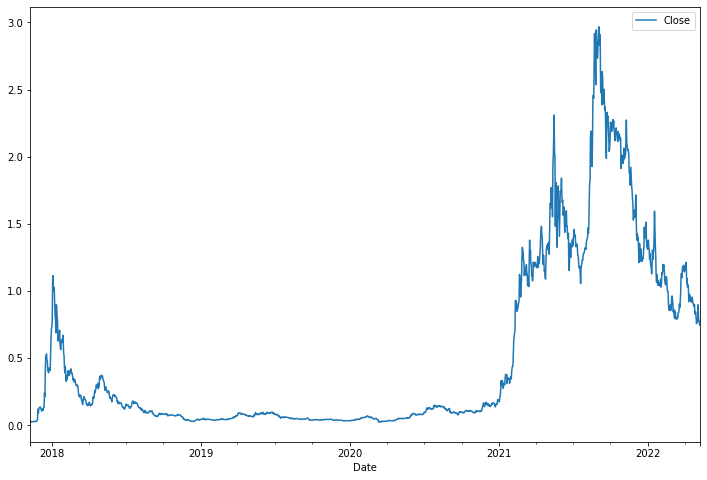

In [469]:
ada_s.plot(figsize=(12,8))

In [470]:
ada_train=ada_s.iloc[:-50]
ada_test=ada_s.iloc[-50:]

In [471]:
model = ExponentialSmoothing(ada_train['Close'],trend='add',seasonal='add',seasonal_periods=10).fit()

<AxesSubplot:xlabel='Date'>

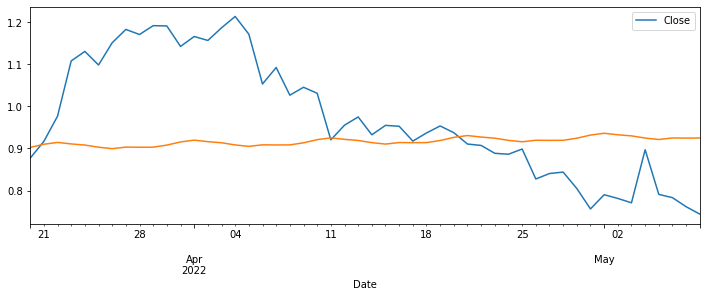

In [472]:
ada_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

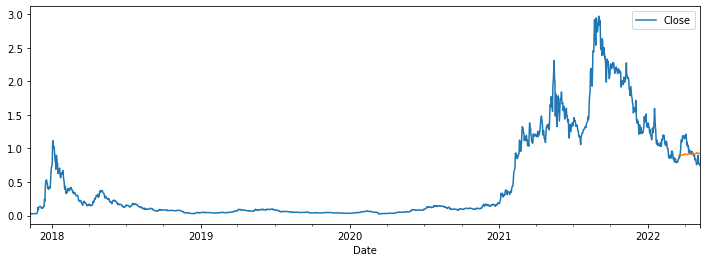

In [473]:
ada_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [474]:
forecast = model.forecast(50)

In [475]:
test_values = ada_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

0.9025372755851305 0.8770920038223267 0.025445271762803867
0.9100183441805347 0.916782021522522 -0.00676367734198724
0.9142987838621036 0.9764400124549866 -0.06214122859288296
0.910725489177494 1.1074819564819336 -0.19675646730443963
0.9080593073803431 1.130010962486267 -0.22195165510592396
0.9029291924361685 1.0978879928588867 -0.19495880042271818
0.8995205979254149 1.1505939960479736 -0.2510733981225587
0.9031847109615891 1.182147979736328 -0.27896326877473876
0.902876599721931 1.1701840162277222 -0.26730741650579115
0.903036291502463 1.191112041473389 -0.2880757499709259
0.9079679450448784 1.1903849840164185 -0.28241703897154
0.9154490136402827 1.1418509483337402 -0.22640193469345749
0.9197294533218515 1.165424942970276 -0.24569548964842458
0.9161561586372419 1.1560070514678955 -0.23985089283065364
0.9134899768400911 1.1859409809112549 -0.27245100407116374
0.9083598618959164 1.2129449844360352 -0.3045851225401187
0.9049512673851628 1.170801043510437 -0.26584977612527416
0.9086153804

### ATOM

In [476]:
atom_s = atom_s.asfreq('d')

In [477]:
atom_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2019-03-14 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1152 non-null   float64
dtypes: float64(1)
memory usage: 18.0 KB


<AxesSubplot:xlabel='Date'>

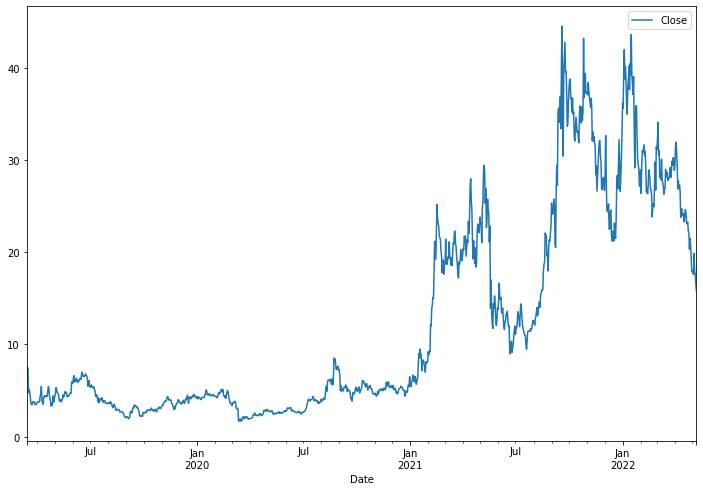

In [478]:
atom_s.plot(figsize=(12,8))

In [479]:
atom_train=atom_s.iloc[:-50]
atom_test=atom_s.iloc[-50:]

In [480]:
model = ExponentialSmoothing(atom_train['Close'],trend='mul',seasonal='mul',seasonal_periods=8).fit()

<AxesSubplot:xlabel='Date'>

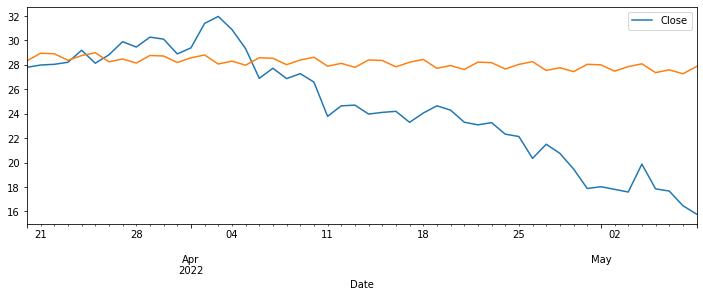

In [481]:
atom_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

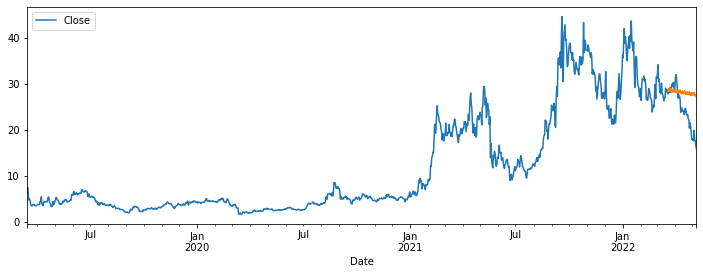

In [482]:
atom_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [483]:
forecast = model.forecast(50)

In [484]:
test_values = atom_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

28.32867397001625 27.794452667236328 0.5342213027799225
28.94977126267989 27.984760284423828 0.9650109782560605
28.90437479324406 28.044509887695312 0.8598649055487471
28.371719757799006 28.21002197265625 0.16169778514275635
28.75797821542391 29.19333839416504 -0.43536017874112787
28.99042902241545 28.131601333618164 0.8588276887972874
28.249571692556295 28.81896209716797 -0.5693904046116742
28.48116095677856 29.89373207092285 -1.412571114144292
28.148979907261587 29.455869674682617 -1.3068897674210298
28.766137463953015 30.26768112182617 -1.5015436578731531
28.721028952790007 30.10300636291504 -1.3819774101250317
28.19175264758369 28.895994186401367 -0.7042415388176764
28.57556099576833 29.387046813964844 -0.8114858181965126
28.806537323935235 31.389738082885746 -2.583200758950511
28.070379390301433 31.96029663085937 -3.8899172405579385
28.300499640625535 30.89144325256348 -2.590943611937945
27.97042567746287 29.325708389282227 -1.3552827118193562
28.58366848866218 26.897235870361328 

### AVAX

In [485]:
avax_s = avax_s.asfreq('d')

In [486]:
avax_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 665 entries, 2020-07-13 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   596 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


<AxesSubplot:xlabel='Date'>

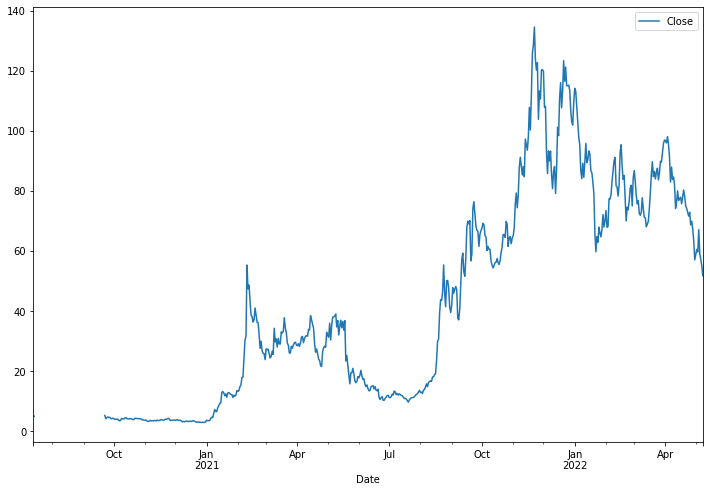

In [487]:
avax_s.plot(figsize=(12,8))

In [488]:
avax_train=avax_s.iloc[2:-50]
avax_train = avax_train.dropna()
avax_test=avax_s.iloc[-50:]

In [489]:
model = ExponentialSmoothing(avax_train['Close'],trend='add',seasonal='add',seasonal_periods=11).fit()

<AxesSubplot:xlabel='Date'>

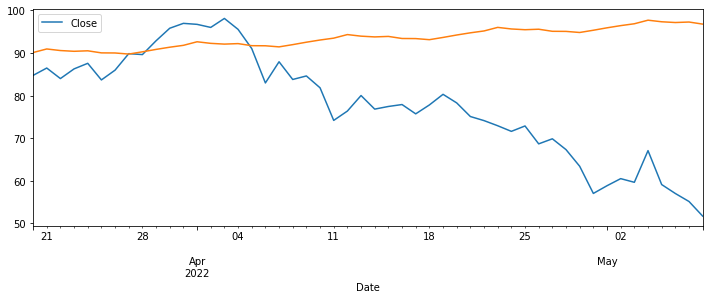

In [490]:
avax_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

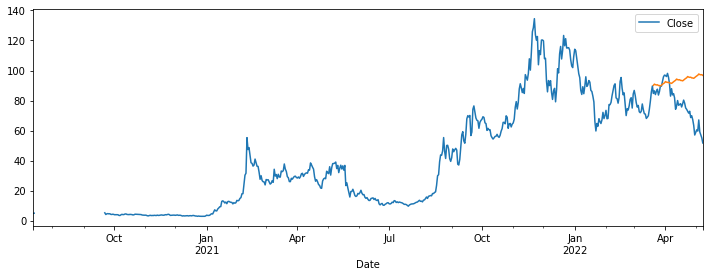

In [491]:
avax_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [492]:
forecast = model.forecast(50)

In [493]:
test_values = avax_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

90.08454016367848 84.72430419921875 5.360235964459733
90.92133639873272 86.44969940185547 4.471636996877251
90.55068755455807 83.9814453125 6.569242242058067
90.37436920554171 86.25101470947266 4.123354496069055
90.4902678428174 87.55538940429688 2.9348784385205278
90.00351938546537 83.66136932373047 6.342150061734898
89.98136037968871 85.95565032958984 4.025710050098866
89.72587713618684 89.82484436035156 -0.09896722416472414
90.25051366983998 89.60455322265625 0.6459604471837253
90.82049805692469 92.84088897705078 -2.02039092012609
91.33358947489862 95.7799835205078 -4.446394045609182
91.77127740857199 96.9246597290039 -5.153382320431916
92.60807364362623 96.69318389892578 -4.085110255299554
92.23742479945156 95.9732666015625 -3.73584180211094
92.0611064504352 98.0777816772461 -6.016675226810889
92.17700508771091 95.5202178955078 -3.3432128077968883
91.69025663035887 91.0210952758789 0.6691613544799679
91.66809762458222 82.9559097290039 8.71218789557831
91.41261438108035 87.919708251

### AXS

In [494]:
axs_s = axs_s.asfreq('d')

In [495]:
axs_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 551 entries, 2020-11-04 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   551 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


<AxesSubplot:xlabel='Date'>

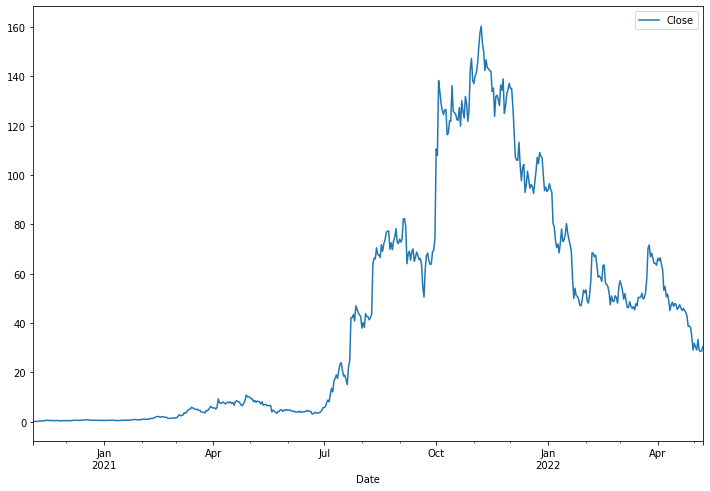

In [496]:
axs_s.plot(figsize=(12,8))

In [497]:
axs_train=axs_s.iloc[:-50]
axs_test=axs_s.iloc[-50:]

In [498]:
model = ExponentialSmoothing(axs_train['Close'],trend='add',seasonal='add',seasonal_periods=10).fit()

<AxesSubplot:xlabel='Date'>

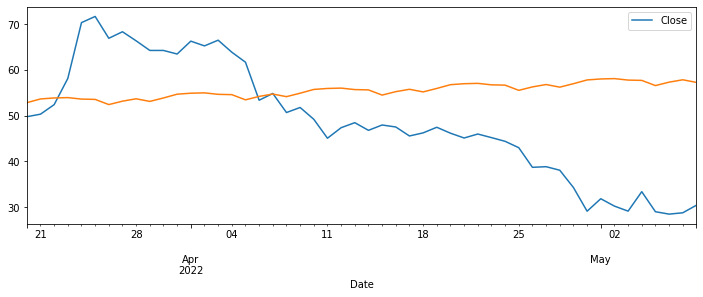

In [499]:
axs_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

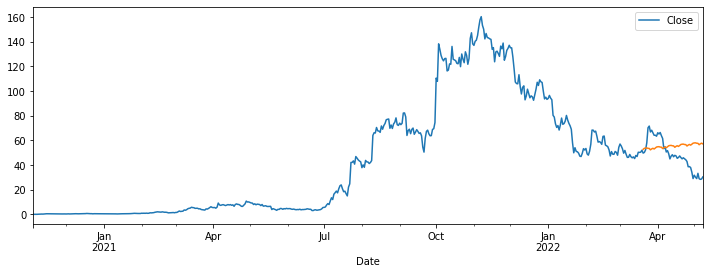

In [500]:
axs_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [501]:
forecast = model.forecast(50)

In [502]:
test_values = axs_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

52.80918624181503 49.746543884277344 3.0626423575376833
53.63060106223841 50.302127838134766 3.3284732241036465
53.845591665732925 52.3872184753418 1.4583731903911286
53.921043316123296 58.11574935913086 -4.194706043007564
53.598873102071025 70.30863952636719 -16.709766424296163
53.5308079596387 71.65794372558594 -18.127135765947237
52.398418662254194 66.88520812988281 -14.486789467628618
53.14515324645907 68.31414031982422 -15.168987073365152
53.66503874998626 66.32603454589844 -12.660995795912179
53.09188792613186 64.2308578491211 -11.138969922989233
53.8472082711156 64.22624969482422 -10.379041423708621
54.66862309153898 63.446510314941406 -8.777887223402423
54.88361369503349 66.25862884521484 -11.375015150181355
54.95906534542386 65.22318267822266 -10.264117332798797
54.636895131371595 66.46807861328125 -11.831183481909655
54.56882998893927 63.84390258789063 -9.275072598951361
53.43644069155476 61.6590576171875 -8.222616925632742
54.18317527575963 53.34918975830078 0.83398551745884

### BTC

In [503]:
btc_s = btc_s.asfreq('d')

In [504]:
btc_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-05-09 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


<AxesSubplot:xlabel='Date'>

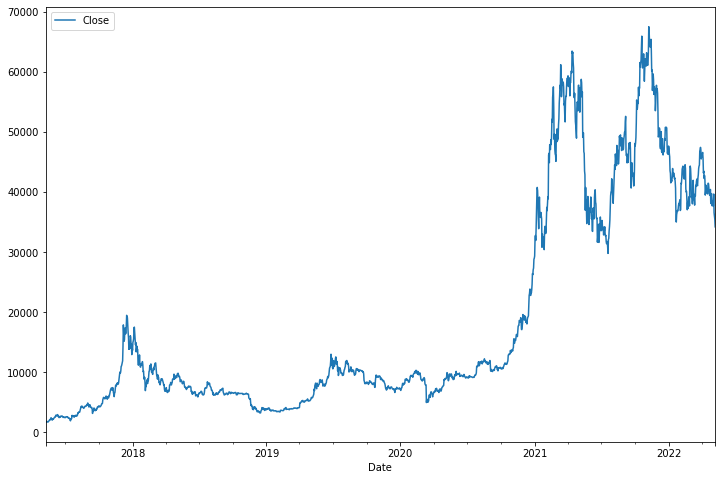

In [505]:
btc_s.plot(figsize=(12,8))

In [506]:
btc_train=btc_s.iloc[:-50]
btc_test=btc_s.iloc[-50:]

In [507]:
model = ExponentialSmoothing(btc_train['Close'],trend='add',seasonal='add',seasonal_periods=7).fit()

<AxesSubplot:xlabel='Date'>

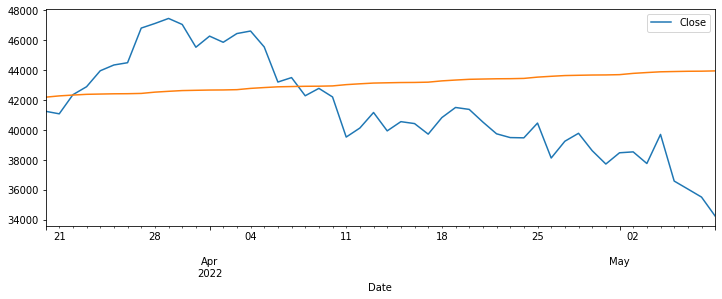

In [508]:
btc_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

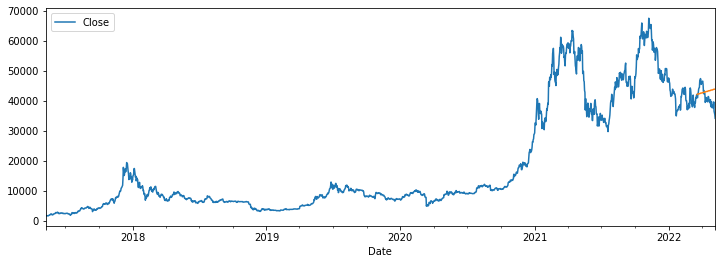

In [509]:
btc_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [510]:
forecast = model.forecast(50)

In [511]:
test_values = btc_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

42192.748157932234 41247.82421875 944.9239391822339
42278.46479854472 41077.99609375 1200.4687047947227
42333.99272204111 42358.80859375 -24.815871708888153
42383.45549242678 42892.95703125 -509.50153882322047
42402.032121894 43960.93359375 -1558.9014718559993
42419.09530346324 44348.73046875 -1929.6351652867597
42425.2518925845 44500.828125 -2075.5762324155003
42444.16380392483 46820.4921875 -4376.328383575172
42529.88044453731 47128.00390625 -4598.12346171269
42585.408368033706 47465.73046875 -4880.322100716294
42634.87113841937 47062.6640625 -4427.792924080633
42653.447767886595 45538.67578125 -2885.228013363405
42670.51094945583 46281.64453125 -3611.1335817941726
42676.667538577094 45868.94921875 -3192.281680172906
42695.579449917415 46453.56640625 -3757.9869563325847
42781.296090529904 46622.67578125 -3841.379690720096
42836.82401402629 45555.9921875 -2719.1681734737067
42886.28678441196 43206.73828125 -320.451496838039
42904.86341387918 43503.84765625 -598.9842423708178
42921.926

### ETH

In [512]:
eth_s = eth_s.asfreq('d')

In [513]:
eth_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642 entries, 2017-11-09 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1642 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


<AxesSubplot:xlabel='Date'>

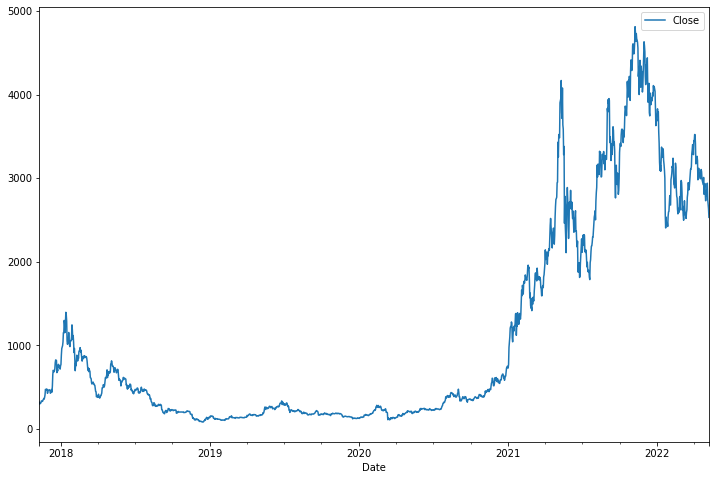

In [514]:
eth_s.plot(figsize=(12,8))

In [515]:
eth_train=eth_s.iloc[:-50]
eth_test=eth_s.iloc[-50:]

In [516]:
model = ExponentialSmoothing(eth_train['Close'],trend='add',seasonal='add',seasonal_periods=10).fit()

<AxesSubplot:xlabel='Date'>

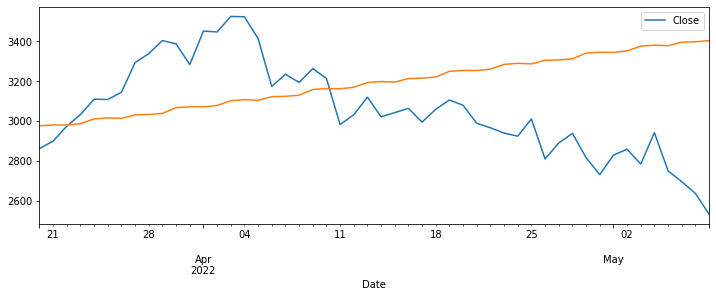

In [517]:
eth_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

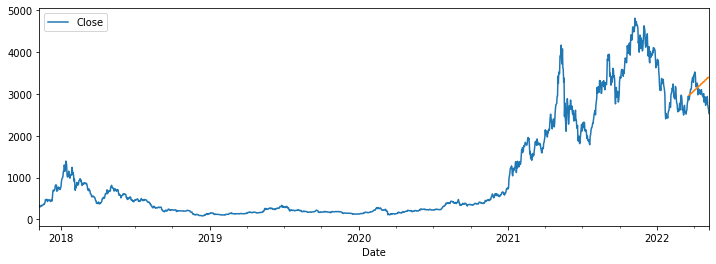

In [518]:
eth_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [519]:
forecast = model.forecast(50)

In [520]:
test_values = eth_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

2974.6187925147055 2860.459228515625 114.15956399908055
2979.1641448375913 2897.9765625 81.18758233759127
2978.3635422890484 2973.131103515625 5.232438773423382
2985.554293717791 3031.067138671875 -45.5128449540839
3009.3878531728615 3108.06201171875 -98.67415854588853
3014.603604617659 3106.67138671875 -92.06778210109087
3011.7213462026384 3143.178955078125 -131.45760887548659
3029.4434198617128 3291.57763671875 -262.13421685703725
3031.4928745927564 3336.634521484375 -305.1416468916186
3037.055007869915 3401.98779296875 -364.9327850988352
3065.714423397131 3385.157958984375 -319.4435355872438
3070.259775720017 3281.642822265625 -211.38304654560807
3069.459173171474 3449.55224609375 -380.09307292227595
3076.6499246002168 3445.059326171875 -368.40940157165824
3100.483484055287 3522.83349609375 -422.35001203846286
3105.699235500085 3521.2412109375 -415.5419754374152
3102.816977085064 3411.79248046875 -308.9755033836859
3120.5390507441384 3171.69189453125 -51.15284378711158
3122.58850547

### LINK

In [521]:
link_s = link_s.asfreq('d')

In [522]:
link_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642 entries, 2017-11-09 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1642 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB


<AxesSubplot:xlabel='Date'>

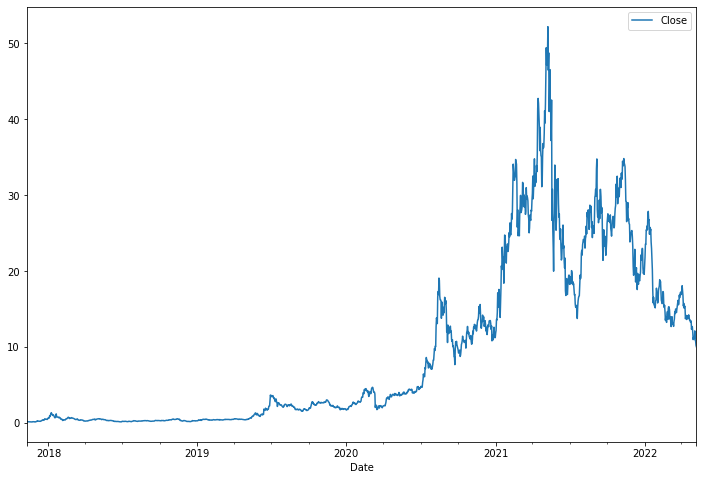

In [523]:
link_s.plot(figsize=(12,8))

In [524]:
link_train=link_s.iloc[:-50]
link_test=link_s.iloc[-50:]

In [525]:
model = ExponentialSmoothing(link_train['Close'],trend='add',seasonal='add',seasonal_periods=11).fit()

<AxesSubplot:xlabel='Date'>

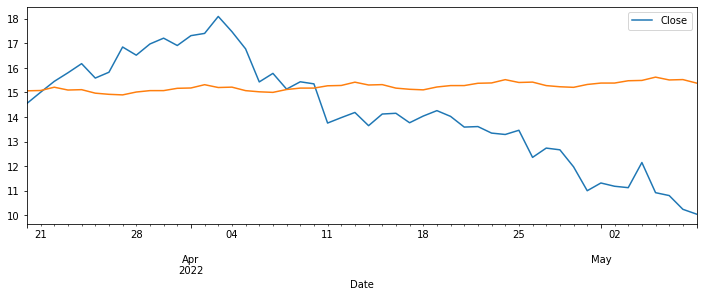

In [526]:
link_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

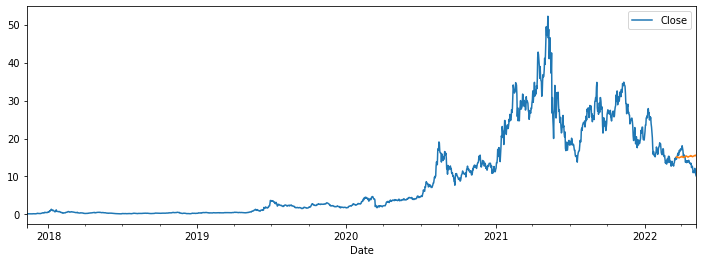

In [527]:
link_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [528]:
forecast = model.forecast(50)

In [529]:
test_values = link_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

15.06503594826238 14.552144050598145 0.512891897664236
15.078112539034283 15.007802963256836 0.07030957577744701
15.212206549260383 15.450860977172852 -0.2386544279124685
15.097434267623646 15.800262451171877 -0.7028281835482311
15.112456367165393 16.171621322631836 -1.0591649554664428
14.970097808965386 15.584914207458496 -0.6148163984931099
14.922644347951135 15.821913719177246 -0.8992693712261115
14.89940570736203 16.84952735900879 -1.950121651646759
15.015999350694633 16.517032623291016 -1.5010332725963824
15.073301507587127 16.973129272460938 -1.8998277648738107
15.07383087594647 17.209745407104492 -2.135914531158022
15.16764084376609 16.910993576049805 -1.7433527322837143
15.180717434537993 17.312368392944336 -2.131650958406343
15.314811444764095 17.403167724609375 -2.0883562798452804
15.200039163127355 18.09421730041504 -2.8941781372876836
15.215061262669103 17.474639892578125 -2.259578629909022
15.072702704469096 16.77373504638672 -1.7010323419176228
15.025249243454844 15.42779

### LUNA1

In [530]:
luna1_s = luna1_s.asfreq('d')

In [531]:
luna1_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018 entries, 2019-07-26 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1018 non-null   float64
dtypes: float64(1)
memory usage: 15.9 KB


<AxesSubplot:xlabel='Date'>

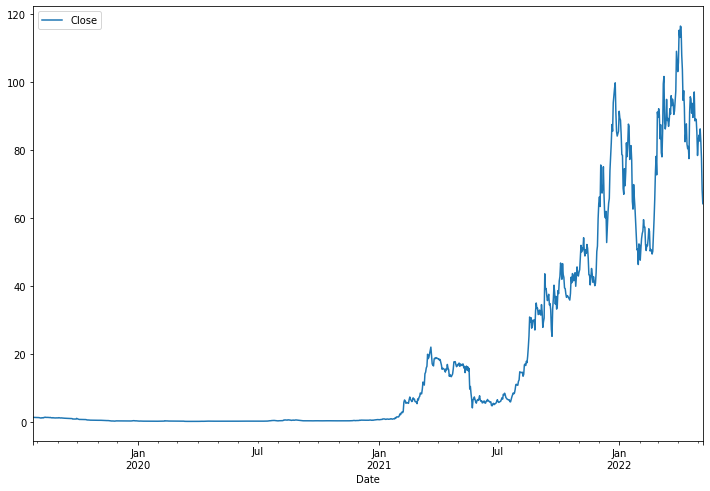

In [532]:
luna1_s.plot(figsize=(12,8))

In [533]:
luna1_train=luna1_s.iloc[:-50]
luna1_test=luna1_s.iloc[-50:]

In [534]:
model = ExponentialSmoothing(luna1_train['Close'],trend='mul',seasonal='mul',seasonal_periods=11).fit()

<AxesSubplot:xlabel='Date'>

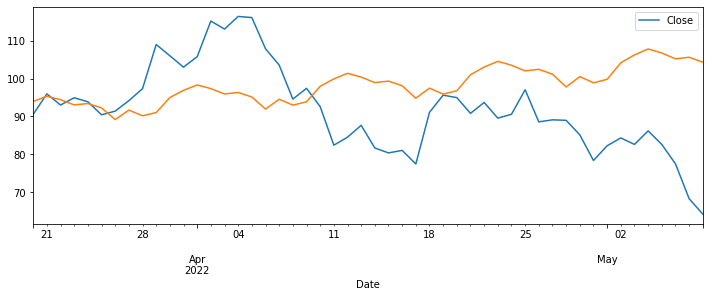

In [535]:
luna1_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

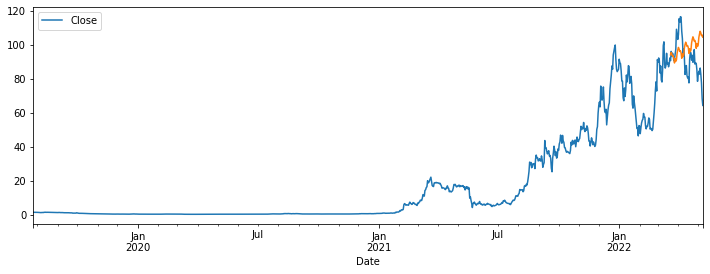

In [536]:
luna1_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [537]:
forecast = model.forecast(50)

In [538]:
test_values = luna1_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

93.95034798588354 90.53227996826172 3.4180680176218203
95.33123242617654 95.94874572753906 -0.6175133013625214
94.39303953714389 93.00252532958984 1.3905142075540482
93.0266334028806 94.92491912841795 -1.8982857255373489
93.40413785368354 93.8620147705078 -0.45787691682426157
92.24222144074876 90.4188995361328 1.823321904615966
89.15077276933908 91.3879165649414 -2.2371437956023215
91.66035773628965 94.15154266357422 -2.4911849272845643
90.1604906968444 97.3284683227539 -7.167977625909501
91.00271181453876 108.9884262084961 -17.985714393957338
94.97946323185019 106.01579284667967 -11.036329614829484
96.88457316763747 103.01138305664062 -6.126809889003155
98.30858491916098 105.7753677368164 -7.466782817655428
97.34109071023589 115.19041442871094 -17.84932371847505
95.93200944625131 113.06985473632812 -17.13784529007681
96.32130398713389 116.40892028808594 -20.08761630095205
95.12309899761568 116.11331176757812 -20.99021276996244
91.93509925711244 107.87109375 -15.93599449288756
94.52306

### MATIC

In [539]:
matic_s = matic_s.asfreq('d')

In [540]:
matic_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1107 entries, 2019-04-28 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1107 non-null   float64
dtypes: float64(1)
memory usage: 17.3 KB


<AxesSubplot:xlabel='Date'>

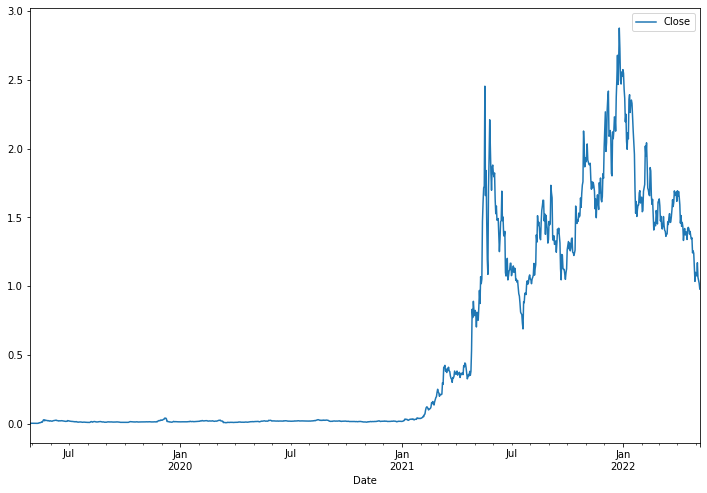

In [541]:
matic_s.plot(figsize=(12,8))

In [542]:
matic_train=matic_s.iloc[:-50]
matic_test=matic_s.iloc[-50:]

In [543]:
model = ExponentialSmoothing(matic_train['Close'],trend='add',seasonal='add',seasonal_periods=7).fit()

<AxesSubplot:xlabel='Date'>

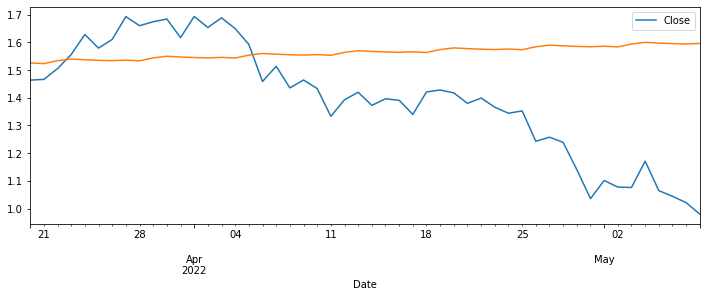

In [544]:
matic_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

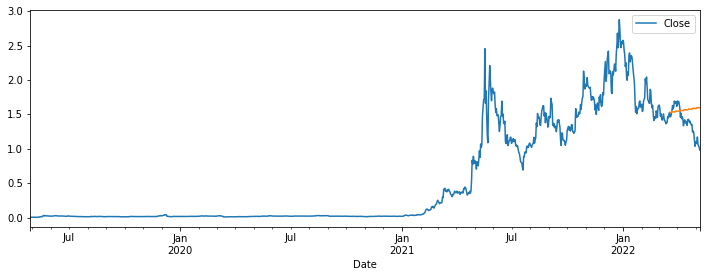

In [545]:
matic_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [546]:
forecast = model.forecast(50)

In [547]:
test_values = matic_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

1.5259707059677612 1.4639190435409546 0.0620516624268066
1.523512127632849 1.466493010520935 0.057019117111913875
1.5340206076161298 1.5054479837417605 0.02857262387436932
1.5400154988102683 1.5563030242919922 -0.016287525481723852
1.5373538993391782 1.6287649869918823 -0.09141108765270411
1.5354338160355874 1.5795730352401731 -0.044139219204585745
1.5341534508189096 1.6108030080795288 -0.07664955726061917
1.536023409136632 1.6934809684753418 -0.15745755933870975
1.5335648308017196 1.6603870391845703 -0.12682220838285074
1.5440733107850007 1.6747870445251465 -0.13071373374014583
1.550068201979139 1.6846189498901367 -0.13455074791099775
1.547406602508049 1.617285966873169 -0.06987936436511988
1.545486519204458 1.6939140558242798 -0.14842753661982178
1.5442061539877803 1.654024958610535 -0.10981880462275462
1.5460761123055027 1.6888099908828735 -0.14273387857737085
1.5436175339705902 1.6499179601669312 -0.10630042619634095
1.5541260139538713 1.592921018600464 -0.0387950046465928
1.560120

### SOL

In [548]:
sol_s = sol_s.asfreq('d')

In [549]:
sol_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 759 entries, 2020-04-10 to 2022-05-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   759 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


<AxesSubplot:xlabel='Date'>

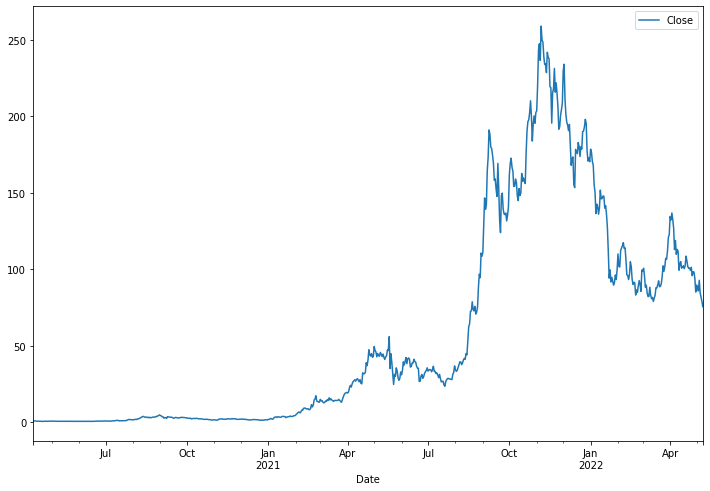

In [550]:
sol_s.plot(figsize=(12,8))

In [551]:
sol_train=sol_s.iloc[:-50]
sol_test=sol_s.iloc[-50:]

In [552]:
model = ExponentialSmoothing(sol_train['Close'],trend='mul',seasonal='mul',seasonal_periods=10).fit()

<AxesSubplot:xlabel='Date'>

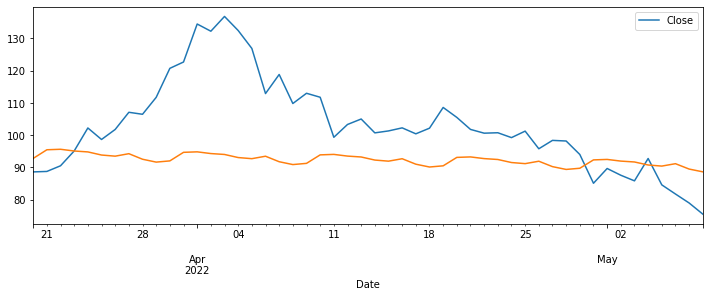

In [553]:
sol_test.plot(figsize=(12,4))
model.forecast(50).plot()

<AxesSubplot:xlabel='Date'>

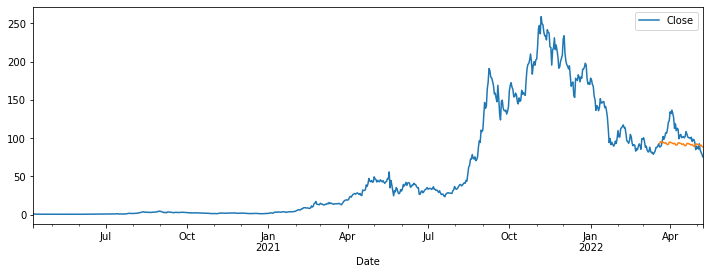

In [554]:
sol_s.plot(figsize=(12,4))
model.forecast(50).plot()

In [555]:
forecast = model.forecast(50)

In [556]:
test_values = sol_test['Close'].tolist()
for index in range(len(forecast)):
  difference = forecast[index] - test_values[index]
  print(forecast[index], test_values[index], difference)
print('')
print('Mean Squared error is:')
print(mean_squared_error(test_values, forecast,squared=False))

92.79626109589476 88.61486053466797 4.181400561226795
95.47375285489336 88.7572021484375 6.7165507064558625
95.62447962140456 90.51296997070312 5.111509650701436
95.08904451532018 95.1026840209961 -0.013639505675911323
94.80656511025589 102.22369384765624 -7.417128737400347
93.84035923617421 98.6581039428711 -4.817744706696885
93.49029883802639 101.7641830444336 -8.273884206407203
94.25760154852021 107.08422088623048 -12.82661933771027
92.53707715007282 106.46525573730467 -13.928178587231855
91.64884507307147 111.71031188964844 -20.061466816576967
92.02380690949632 120.6994857788086 -28.67567886931228
94.67901070458493 122.66146087646484 -27.98245017187992
94.82848279207761 134.43093872070312 -39.60245592862552
94.29750475230556 132.19886779785156 -37.901363045546006
94.01737676093441 136.77532958984375 -42.75795282890934
93.05921377310204 132.41262817382812 -39.35341440072608
92.71206734602212 126.86223602294922 -34.150168676927095
93.47298287901593 112.88338470458984 -19.410401825573